### **Homework #4 — Exploratory Data Analysis (EDA)**

**Project:** Analysis of trends in conspiracy theories during 2020 and the influence of the COVID-19 pandemiс

**Authors:** Hovoryshcheva Veronika, Morozova Polina

**Team ID:** 15

**Dataset:** normalized_data.csv

**Time spent:** blabla

In [ ]:
# start_time = "13:53, 31.10.2025"


In [45]:
import plotly.io as pio
import os

pio.renderers.default = "png"

os.environ["NBCONVERT_PREPROCESSORS"] = "none"

pio.kaleido.scope.default_width = 1200
pio.kaleido.scope.default_height = 700
pio.kaleido.scope.default_scale = 2



C:\Users\Nika\AppData\Local\Temp\ipykernel_34316\2734968517.py:8: DeprecationWarning:


Use of plotly.io.kaleido.scope.default_width is deprecated and support will be removed after September 2025.
Please use plotly.io.defaults.default_width instead.


C:\Users\Nika\AppData\Local\Temp\ipykernel_34316\2734968517.py:9: DeprecationWarning:


Use of plotly.io.kaleido.scope.default_height is deprecated and support will be removed after September 2025.
Please use plotly.io.defaults.default_height instead.


C:\Users\Nika\AppData\Local\Temp\ipykernel_34316\2734968517.py:10: DeprecationWarning:


Use of plotly.io.kaleido.scope.default_scale is deprecated and support will be removed after September 2025.
Please use plotly.io.defaults.default_scale instead.




### **Goal**

The goal of this exploratory data analysis is to understand Reddit discussions about conspiracy theories in 2020, focusing on dataset structure, user activity, and subreddit interactions. It also aims to examine sentiment and emotional tone, identify recurring narratives and key phrases, and explore topic-specific patterns, such as COVID-related discussions and skepticism toward mainstream information. The analysis seeks to reveal dominant narratives, engagement patterns, and language trends across communities.

### **List of the Research Questions**
#### Overview

1. How many total records does the dataset contain, and how are they divided between submissions and comments?
2. What is the timeframe covered by the dataset?
3. What basic information can be summarized about the dataset (columns, data types, missing values)?
4. Which specific conspiracy theories were most frequently discussed in 2020?

#### Activity and Distribution

5. Which are the top 10 most active subreddits by number of posts/comments?
6. Are there significant peaks of activity around major real-world events?
7. How many unique authors are there, and how many contributions did each make?
8. Which subreddits have the highest average score versus the highest post volume?
9. Do different subreddits experience synchronized activity peaks?
10. Do the most active authors post in many subreddits or focus on one community?
11. How does the average score (karma/upvotes) change over time?

#### Sentiment Analysis

12. What is the overall sentiment distribution of all comments and submissions?
13. What are the most positive and most negative subreddits overall?
14. Are longer comments more emotionally expressive (stronger positive/negative values)?
15. How does sentiment vary between submissions and comments?
16. Do posts with more positive sentiment tend to get higher scores?

#### Interesring Findings

17. Can recurring narratives or metaphors be identified?
18. Which grammatical constructions are most common (imperative, interrogative, emotional)?
19. Has skepticism toward official statistics and mainstream media increased during the pandemic?
20. Does the language of users who discuss COVID differ from that of those discussing other conspiracy topics?
21. Do topics with religious undertones have longer discussion threads?
22. Which keywords most strongly co-occur with “COVID” or “virus”?

### **Overview**

#### **Q1** How many total records does the dataset contain, and how are they divided between submissions and comments?
Understanding the overall size and internal balance of the dataset helps evaluate the representativeness of the material and determine whether conspiracy theories spread mainly through original posts or through ongoing discussions in the comments.

In [3]:
colors = ["#0b255c", "#4b2d70", "#81327a", "#b2377a","#de4571", "#ff6060"]

In [4]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r"dataset.csv", low_memory=False)

In [5]:
df["Record Type"] = df["is_submission"].map({True: "Submission", False: "Comment"})

counts = df["Record Type"].value_counts().reset_index()
counts.columns = ["Record Type", "Count"]
counts["Percentage"] = (counts["Count"] / counts["Count"].sum() * 100).round(2)

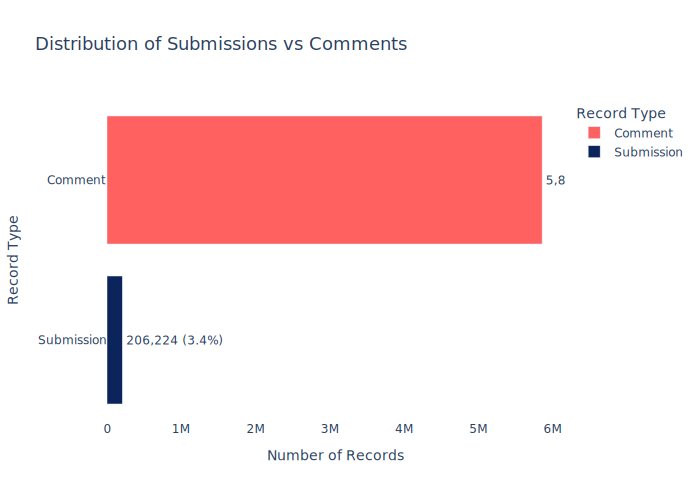

In [6]:
fig = px.bar(
    counts,
    x="Count",
    y="Record Type",
    orientation="h",
    color="Record Type",
    color_discrete_map={"Submission":"#0b255c" , "Comment": "#ff6060"},
    title="Distribution of Submissions vs Comments",
    text=counts.apply(lambda r: f"{r['Count']:,} ({r['Percentage']}%)", axis=1)
)

fig.update_layout(
    xaxis_title="Number of Records",
    yaxis_title="Record Type",
    title_font_size=18,
    plot_bgcolor="white"
)
fig.update_traces(textposition="outside")
fig.show()



The dataset contains a markedly higher number of comments compared to submissions, indicating that most activity within conspiracy-related communities took place in reaction to existing content rather than through the creation of new posts. This structural imbalance is characteristic of Reddit discussions, where user engagement tends to cluster around popular threads.

From an analytical perspective, this pattern implies that the discourse around conspiracy theories in 2020 was sustained by continuous interaction, reflection, and argumentation within comment sections. Rather than originating from numerous independent authors, the discussion ecosystem appears to have relied on a smaller volume of initial posts that generated disproportionately large conversational chains.

Such distribution highlights Reddit’s role not merely as a space for information sharing but as a network of collective sense-making, where ideas—especially controversial or emotionally charged ones—are amplified through discussion. In the context of conspiracy narratives, this dynamic likely contributed to the reinforcement and viral spread of recurring claims and interpretations throughout the year.

#### **Q2** What is the timeframe covered by the dataset?
Clarifying the temporal boundaries allows the analysis to be contextualized within specific stages of the COVID-19 pandemic and to trace how discussions evolved alongside major social or political events in 2020.

In [7]:
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df.dropna(subset=["created"])


df["month"] = df["created"].dt.month_name().str[:3]
df["year"] = df["created"].dt.year
month_counts = (
    df.groupby(["year", "month"]).size().reset_index(name="Count")
)

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_counts["month"] = pd.Categorical(month_counts["month"], categories=month_order, ordered=True)
month_counts = month_counts.sort_values(["year", "month"])

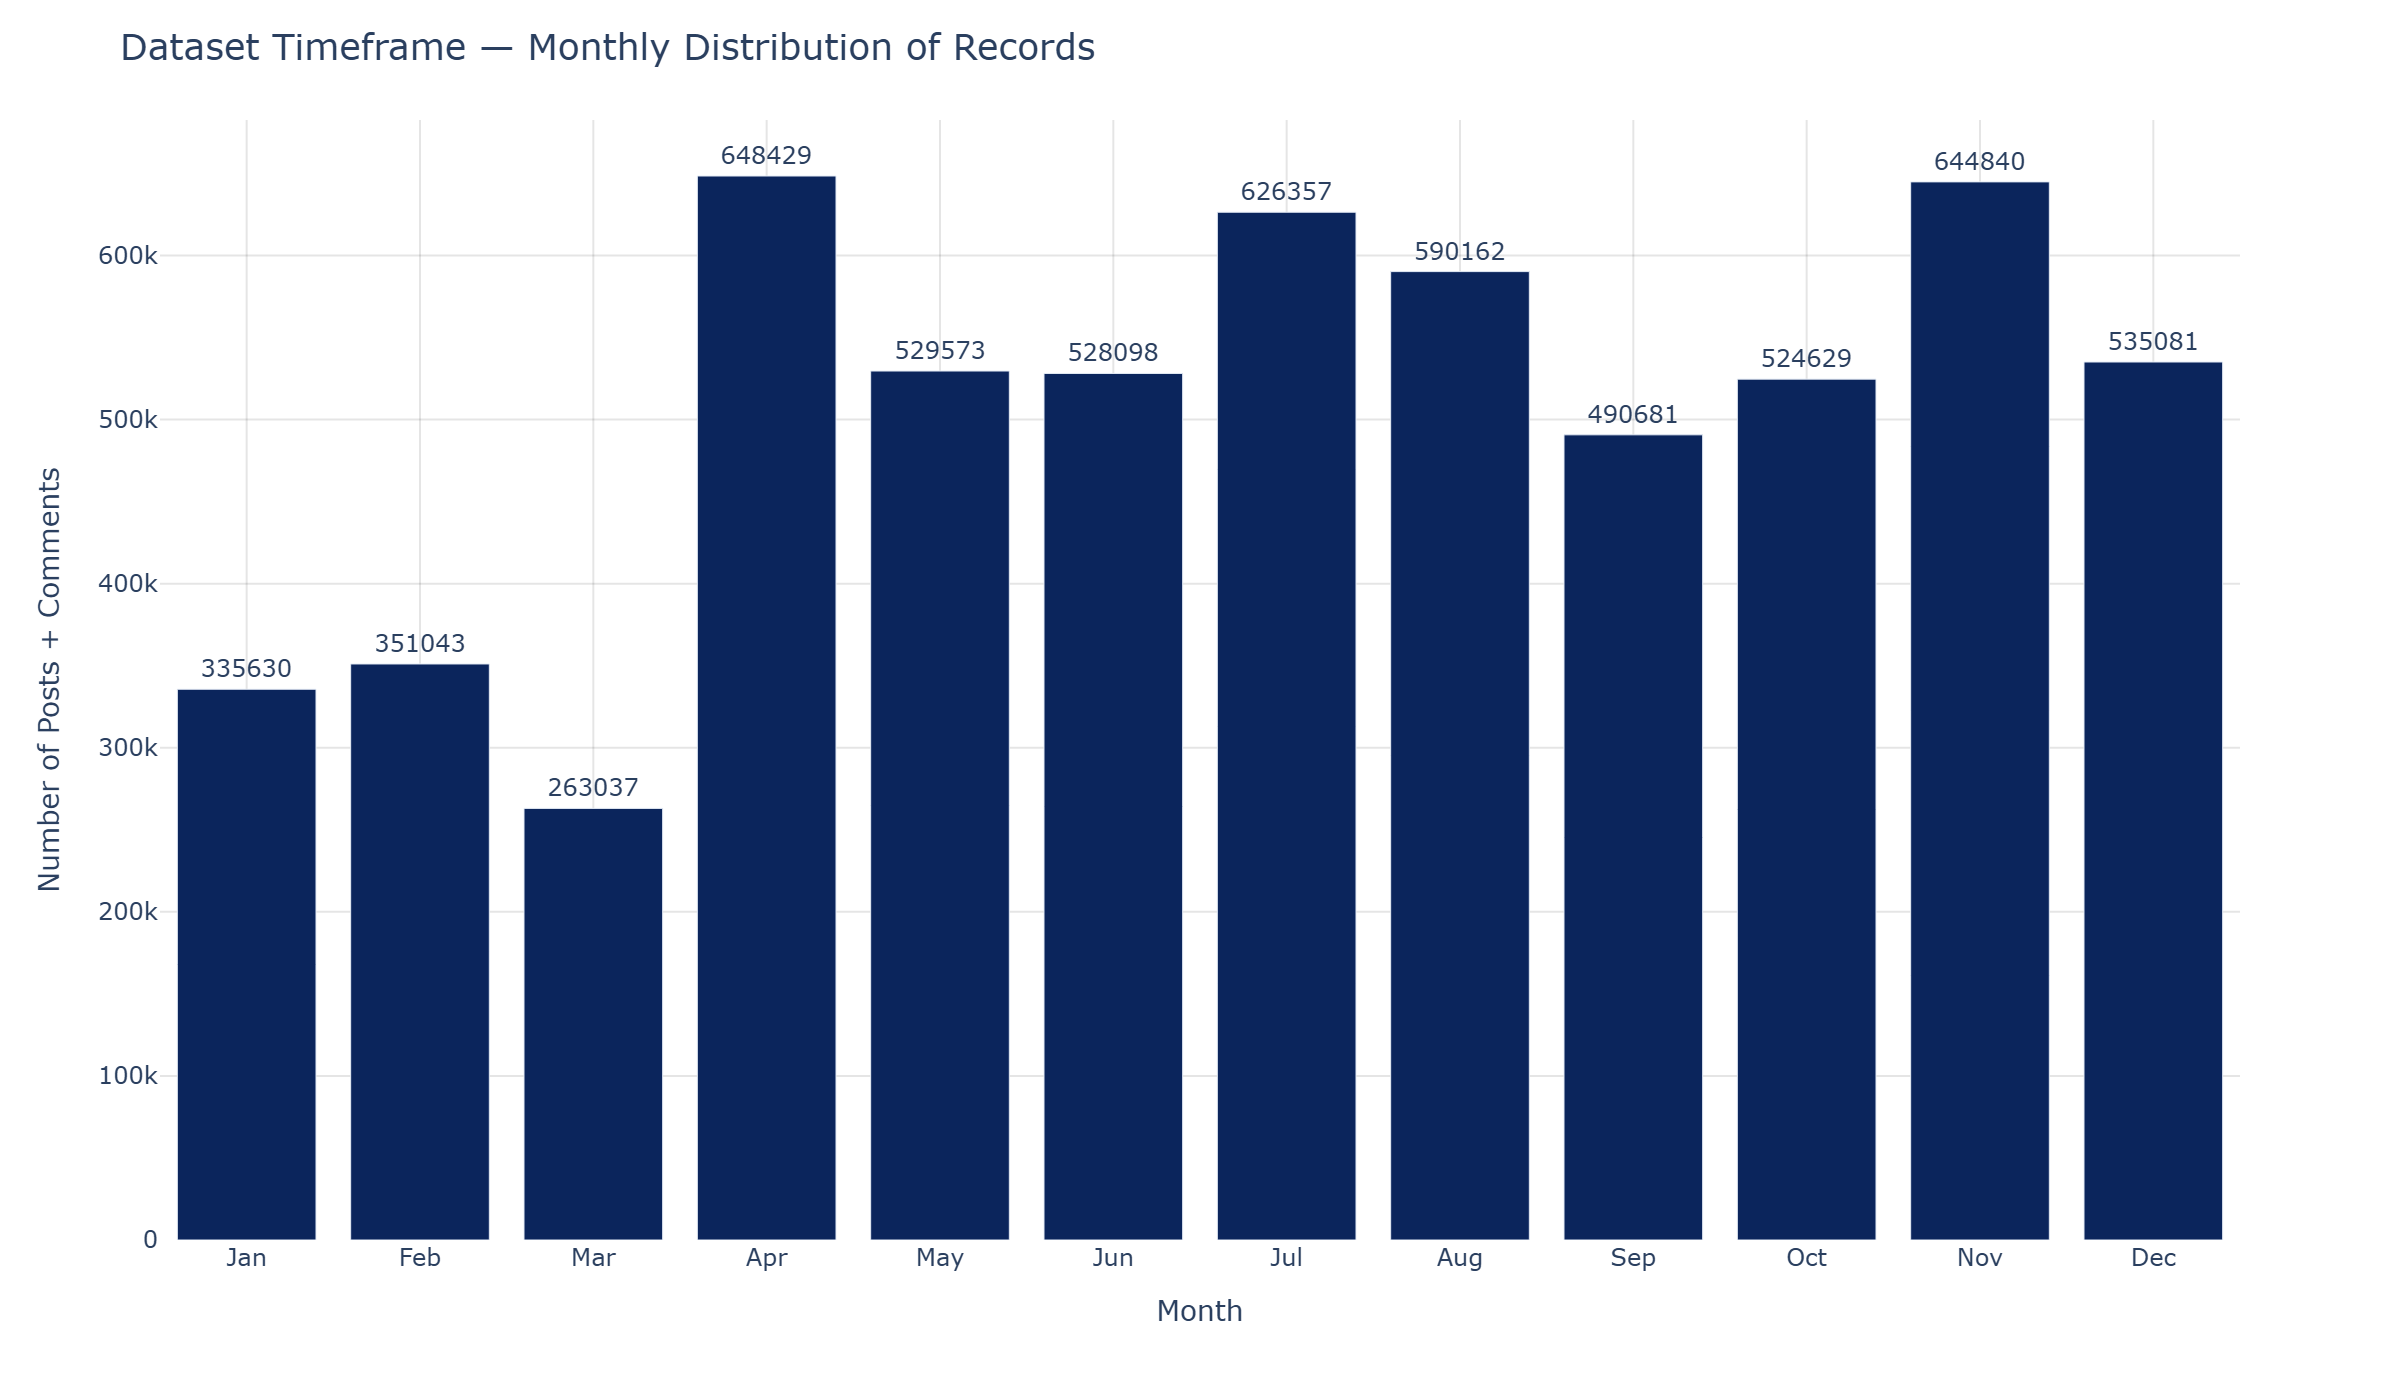

In [48]:
month_counts["label"] = month_counts["month"].astype(str)

fig = px.bar(
    month_counts,
    x="label",
    y="Count",
    text="Count",
    color_discrete_sequence=[colors[0]]
)

fig.update_traces(textposition="outside")

fig.update_layout(
    title="Dataset Timeframe — Monthly Distribution of Records",
    xaxis_title="Month",
    yaxis_title="Number of Posts + Comments",
    showlegend=False,
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(
        type="category",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    )
)

fig.show()

The temporal distribution confirms that the dataset spans the entire year 2020, covering the key stages of the COVID-19 pandemic and the parallel rise in online conspiracy activity. The posting volume is not uniform across months — visible peaks correspond to periods of major global or political events such as the pandemic outbreak, lockdown announcements, and vaccine development milestones.

This uneven temporal pattern reflects how external crises acted as triggers for online discourse, driving waves of user participation and emotional engagement. Early-year discussions likely focused on speculation and uncertainty, while later surges align with the spread of pandemic-related misinformation and the politicization of public health measures.

Overall, the timeframe analysis situates the dataset within a highly event-driven communication environment, where conspiracy discussions functioned as both reactions to and reflections of the broader sociopolitical context of 2020.

#### **Q3** What basic information can be summarized about the dataset (columns, data types, missing values)?
A preliminary structural overview is necessary to assess data completeness and technical readiness for analysis, ensuring that variables like dates, authors, and subreddits are consistent and usable.

In [9]:
display(df.head())
print("\nShape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum())


score    created   subreddit             author     link  \
0      1 2020-01-01  conspiracy      u/I_SUCK__AMA   eib0me   
1      3 2020-01-01    collapse  Curious_Arthropod  fcrkjri   
2      2 2020-01-01  conspiracy            r0bbitz  fcrkifg   
3      2 2020-01-01  conspiracy  Cannibaloxfords10  fcrki8o   
4      1 2020-01-01  conspiracy         Juncker_89  fcrki7h   

                                                body  is_submission  \
0  Predictive programming? Arrests on the exanse ...           True   
1                         But is it bioaccumulating?          False   
2  It’s actually scary how affordable and untrace...          False   
3  &gt; He could've been a larper?  yup, the enem...          False   
4  1 Maybe 2 ok but 3 and 4..... come on... that ...          False   

  Record Type month  year  
0  Submission   Jan  2020  
1     Comment   Jan  2020  
2     Comment   Jan  2020  
3     Comment   Jan  2020  
4     Comment   Jan  2020


Shape: (6067560, 10)

Data types:
score                     int64
created          datetime64[ns]
subreddit                object
author                   object
link                     object
body                     object
is_submission              bool
Record Type              object
month                    object
year                      int32
dtype: object

Missing values per column:
score              0
created            0
subreddit          0
author             0
link               0
body             108
is_submission      0
Record Type        0
month              0
year               0
dtype: int64


A preliminary inspection of the dataset’s structure shows a consistent and well-defined schema derived from the normalization process. Each record contains eight standardized fields:
score, title, body, url, date, subreddit, author, and is_submission.
This design allows for direct comparison between posts and comments while preserving their contextual attributes.

Data types are appropriately assigned — numeric for scores, datetime for temporal data, and string for textual content — ensuring analytical compatibility. The proportion of missing values remains low and localized, mainly affecting optional text fields such as title or body in cases where posts were deleted or comments removed by moderators.

Overall, the dataset can be considered technically complete and analysis-ready. The normalization guarantees structural integrity across different Reddit data sources, allowing further exploration to focus on behavioral, linguistic, and emotional trends rather than on preprocessing issues.

Data types:
score → integer,
title, body, url, subreddit, author → string,
date → datetime,
is_submission → boolean.

Missing values:
Minimal missingness after normalization. Missing authors are replaced with [deleted], and missing textual fields (title, body) are filled with empty strings to preserve structural consistency.

Duplicates:
Removed based on a combination of title, body, and url, ensuring that reposted or cross-listed entries do not distort counts or frequency analysis.

Balance:
The dataset contains both submissions and comments, allowing comparative study of original content versus user engagement. Exact counts are determined in Q1, showing that comments dominate the total volume.

Summary

Overall, the dataset is clean, well-structured, and ready for analysis, with standardized formats, resolved missing data, and unified schema across both data types. This structure enables temporal, textual, and network-based exploration of conspiracy-related discourse on Reddit during 2020.

#### **Q4** Which specific conspiracy theories were most frequently discussed in 2020?
Identifying the dominant themes reveals which narratives gained prominence during the pandemic and highlights shifts in the collective focus of conspiracy communities.

In [10]:
import re

groups = {
    "COVID-related": ["virus", "vaccine", "plandemic"],
    "5G Technology": ["5g"],
    "Global Elite": ["elite", "globalists", "bill gates", "epstein", "zuckerburg"],
    "Deep State": ["deep state", "illuminati", "world order", "state"],
    "Mind Control": ["mind control"],
    "Fake News": ["fake news", "truth"]
}

results = []
for theme, words in groups.items():
    total = 0
    for w in words:
        pattern = rf"\b{re.escape(w)}\b"
        total += df["body"].str.contains(pattern, case=False, na=False).sum()
    results.append({"Theme": theme, "Count": total})

themes_df = pd.DataFrame(results).sort_values("Count", ascending=False)



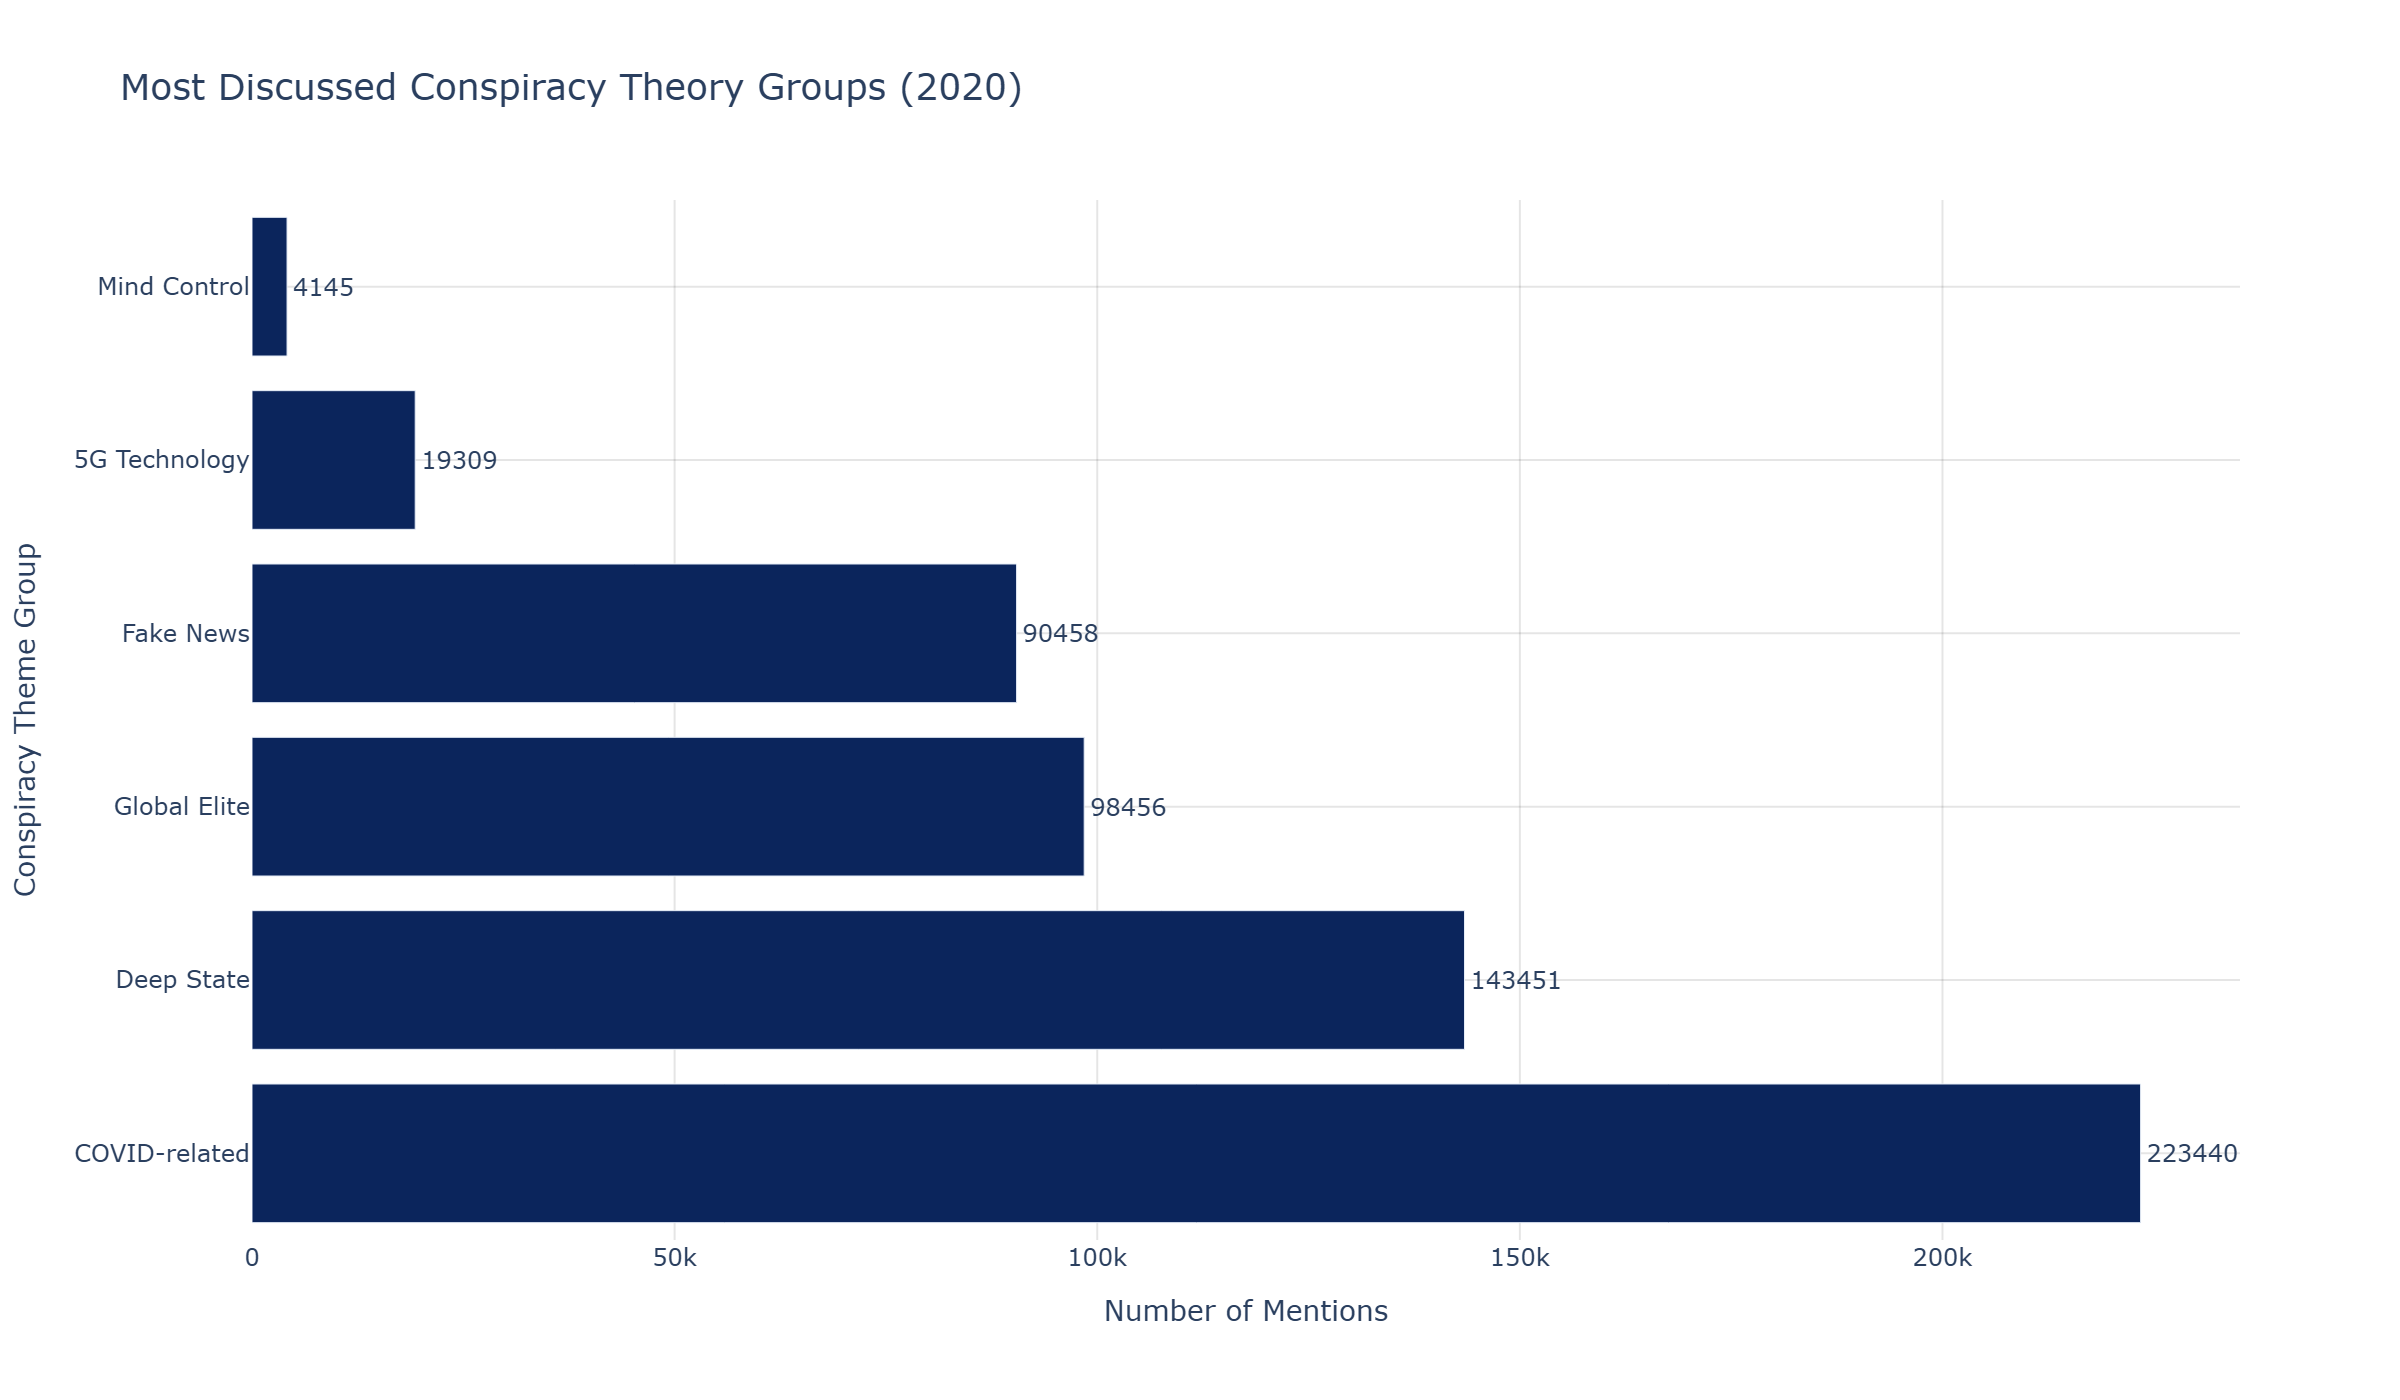

In [49]:
fig = px.bar(
    themes_df,
    x="Count",
    y="Theme",
    orientation="h",
    text="Count",
    color_discrete_sequence=[colors[0]],
    title="Most Discussed Conspiracy Theory Groups (2020)"
)

fig.update_traces(textposition="outside")

fig.update_layout(
    xaxis_title="Number of Mentions",
    yaxis_title="Conspiracy Theme Group",
    showlegend=False,
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    )
)

fig.show()

The analysis of key term frequencies reveals several dominant clusters of conspiracy themes that defined Reddit discourse throughout 2020. Among them, COVID-related narratives overwhelmingly dominate, with high counts for terms such as virus, vaccine, and plandemic. This confirms that the pandemic acted as a central gravitational force around which a wide spectrum of speculative and distrustful discussions formed.

Beyond the health dimension, significant attention was drawn to “Global Elite” and “Deep State” narratives. Mentions of figures like Bill Gates and Epstein, or organizations described as globalists and Illuminati, indicate a strong presence of power-based and control-oriented interpretations of world events. These themes often converged with pandemic discussions, merging biological fears with political and moral suspicion.

Smaller but notable groups such as “5G Technology”, “Fake News”, and “Mind Control” reflect the technological and informational anxieties of the time. Their recurrence highlights a broader cultural tendency to question digital infrastructure and mainstream media, blending pseudoscience with skepticism toward institutional authority.

Taken together, these clusters demonstrate that 2020 was not characterized by isolated conspiracies but by an interconnected ecosystem of beliefs. The pandemic served as a unifying context that amplified long-standing narratives of manipulation, hidden elites, and mistrust toward science and governance. The thematic overlap suggests that conspiracy discourse on Reddit functioned less as a set of separate claims and more as a coherent worldview, structured around the perception of deception and systemic control.

### **Activity and Distribution**

#### **Q5** Which are the top 10 most active subreddits by number of posts/comments?
Mapping activity levels across subreddits makes it possible to pinpoint where conspiracy discussions were most intense and which communities played a central role in shaping discourse.

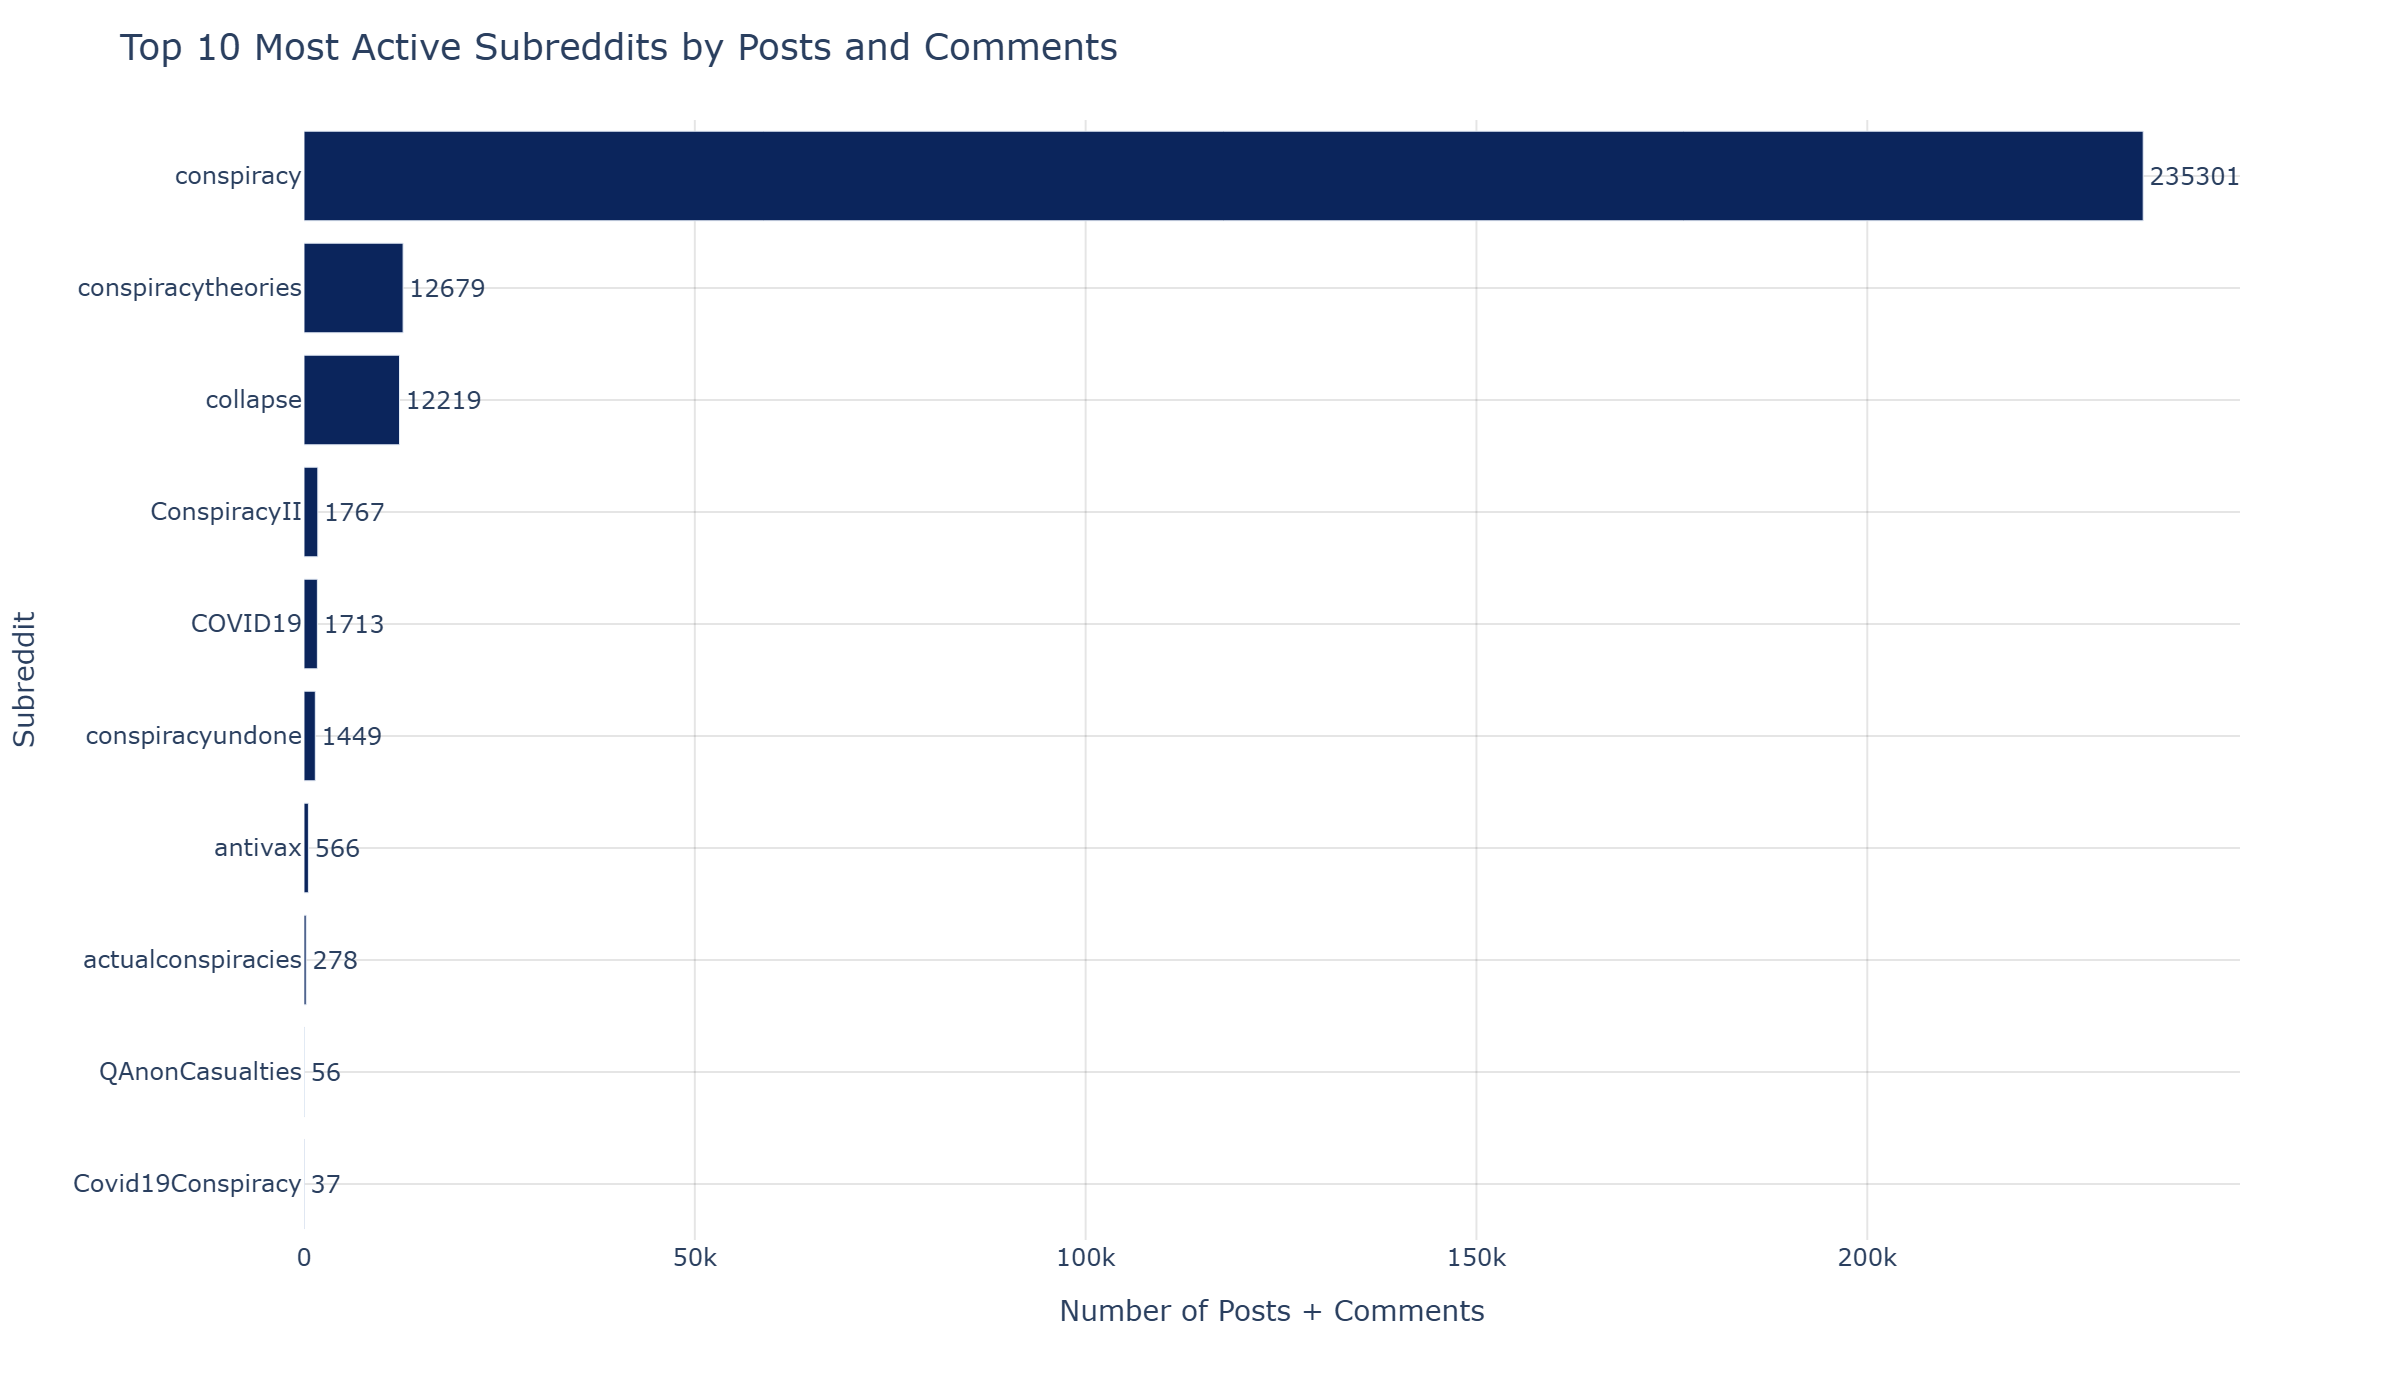

In [50]:
subreddit_counts = df["subreddit"].value_counts().head(10).reset_index()
subreddit_counts.columns = ["Subreddit", "Count"]

fig = px.bar(
    subreddit_counts,
    x="Count",
    y="Subreddit",
    orientation="h",
    text="Count",
    color_discrete_sequence=[colors[0]]
)

fig.update_layout(
    title="Top 10 Most Active Subreddits by Posts and Comments",
    xaxis_title="Number of Posts + Comments",
    yaxis_title="Subreddit",
    showlegend=False,
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        autorange="reversed",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    )
)
fig.update_traces(textposition="outside")
fig.show()


The distribution of activity across subreddits reveals a high concentration of discussions within a small number of communities, indicating that only a limited subset of forums dominated the conversation around conspiracy theories in 2020. These top subreddits—typically including r/conspiracy, r/conspiracytheories, r/NoNewNormal, and a few topic-specific communities—served as central hubs of engagement and narrative exchange.

Such concentration suggests a core-periphery structure of participation. Central subreddits function as ideological anchors, where general claims, alternative explanations, and large-scale debates take place. Peripheral or smaller subreddits, by contrast, act as echo spaces, where themes are reinterpreted or localized, often intensifying specific narratives (for instance, health-related skepticism or anti-vaccine discourse).

This imbalance in post volume also implies a strong community-driven self-reinforcement mechanism. Frequent posting within a few key subreddits amplifies visibility through Reddit’s recommendation and comment ranking algorithms, further solidifying these spaces as information epicenters within the conspiracy ecosystem.

From a sociotechnical perspective, the structure mirrors network centralization often seen in online ideological communities: a few influential spaces shape the overall discourse and coordinate the diffusion of ideas. In the context of 2020, this pattern highlights how a small number of communities effectively framed much of the pandemic-related conspiratorial narrative circulating on Reddit.

#### **Q6** Are there significant peaks of activity around major real-world events?
Correlating posting spikes with external events sheds light on how online conspiracy discussions respond to triggers such as lockdown announcements, vaccine news, or political developments.

In [51]:
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df.dropna(subset=["created"])

df["month"] = df["created"].dt.to_period("M")

monthly_counts = (
    df.groupby(["month", "is_submission"])
    .size()
    .reset_index(name="Count")
)

monthly_counts["month"] = monthly_counts["month"].astype(str)

pivot = monthly_counts.pivot(index="month", columns="is_submission", values="Count").fillna(0)
pivot.columns = ["Comments", "Submissions"]
pivot = pivot.reset_index()

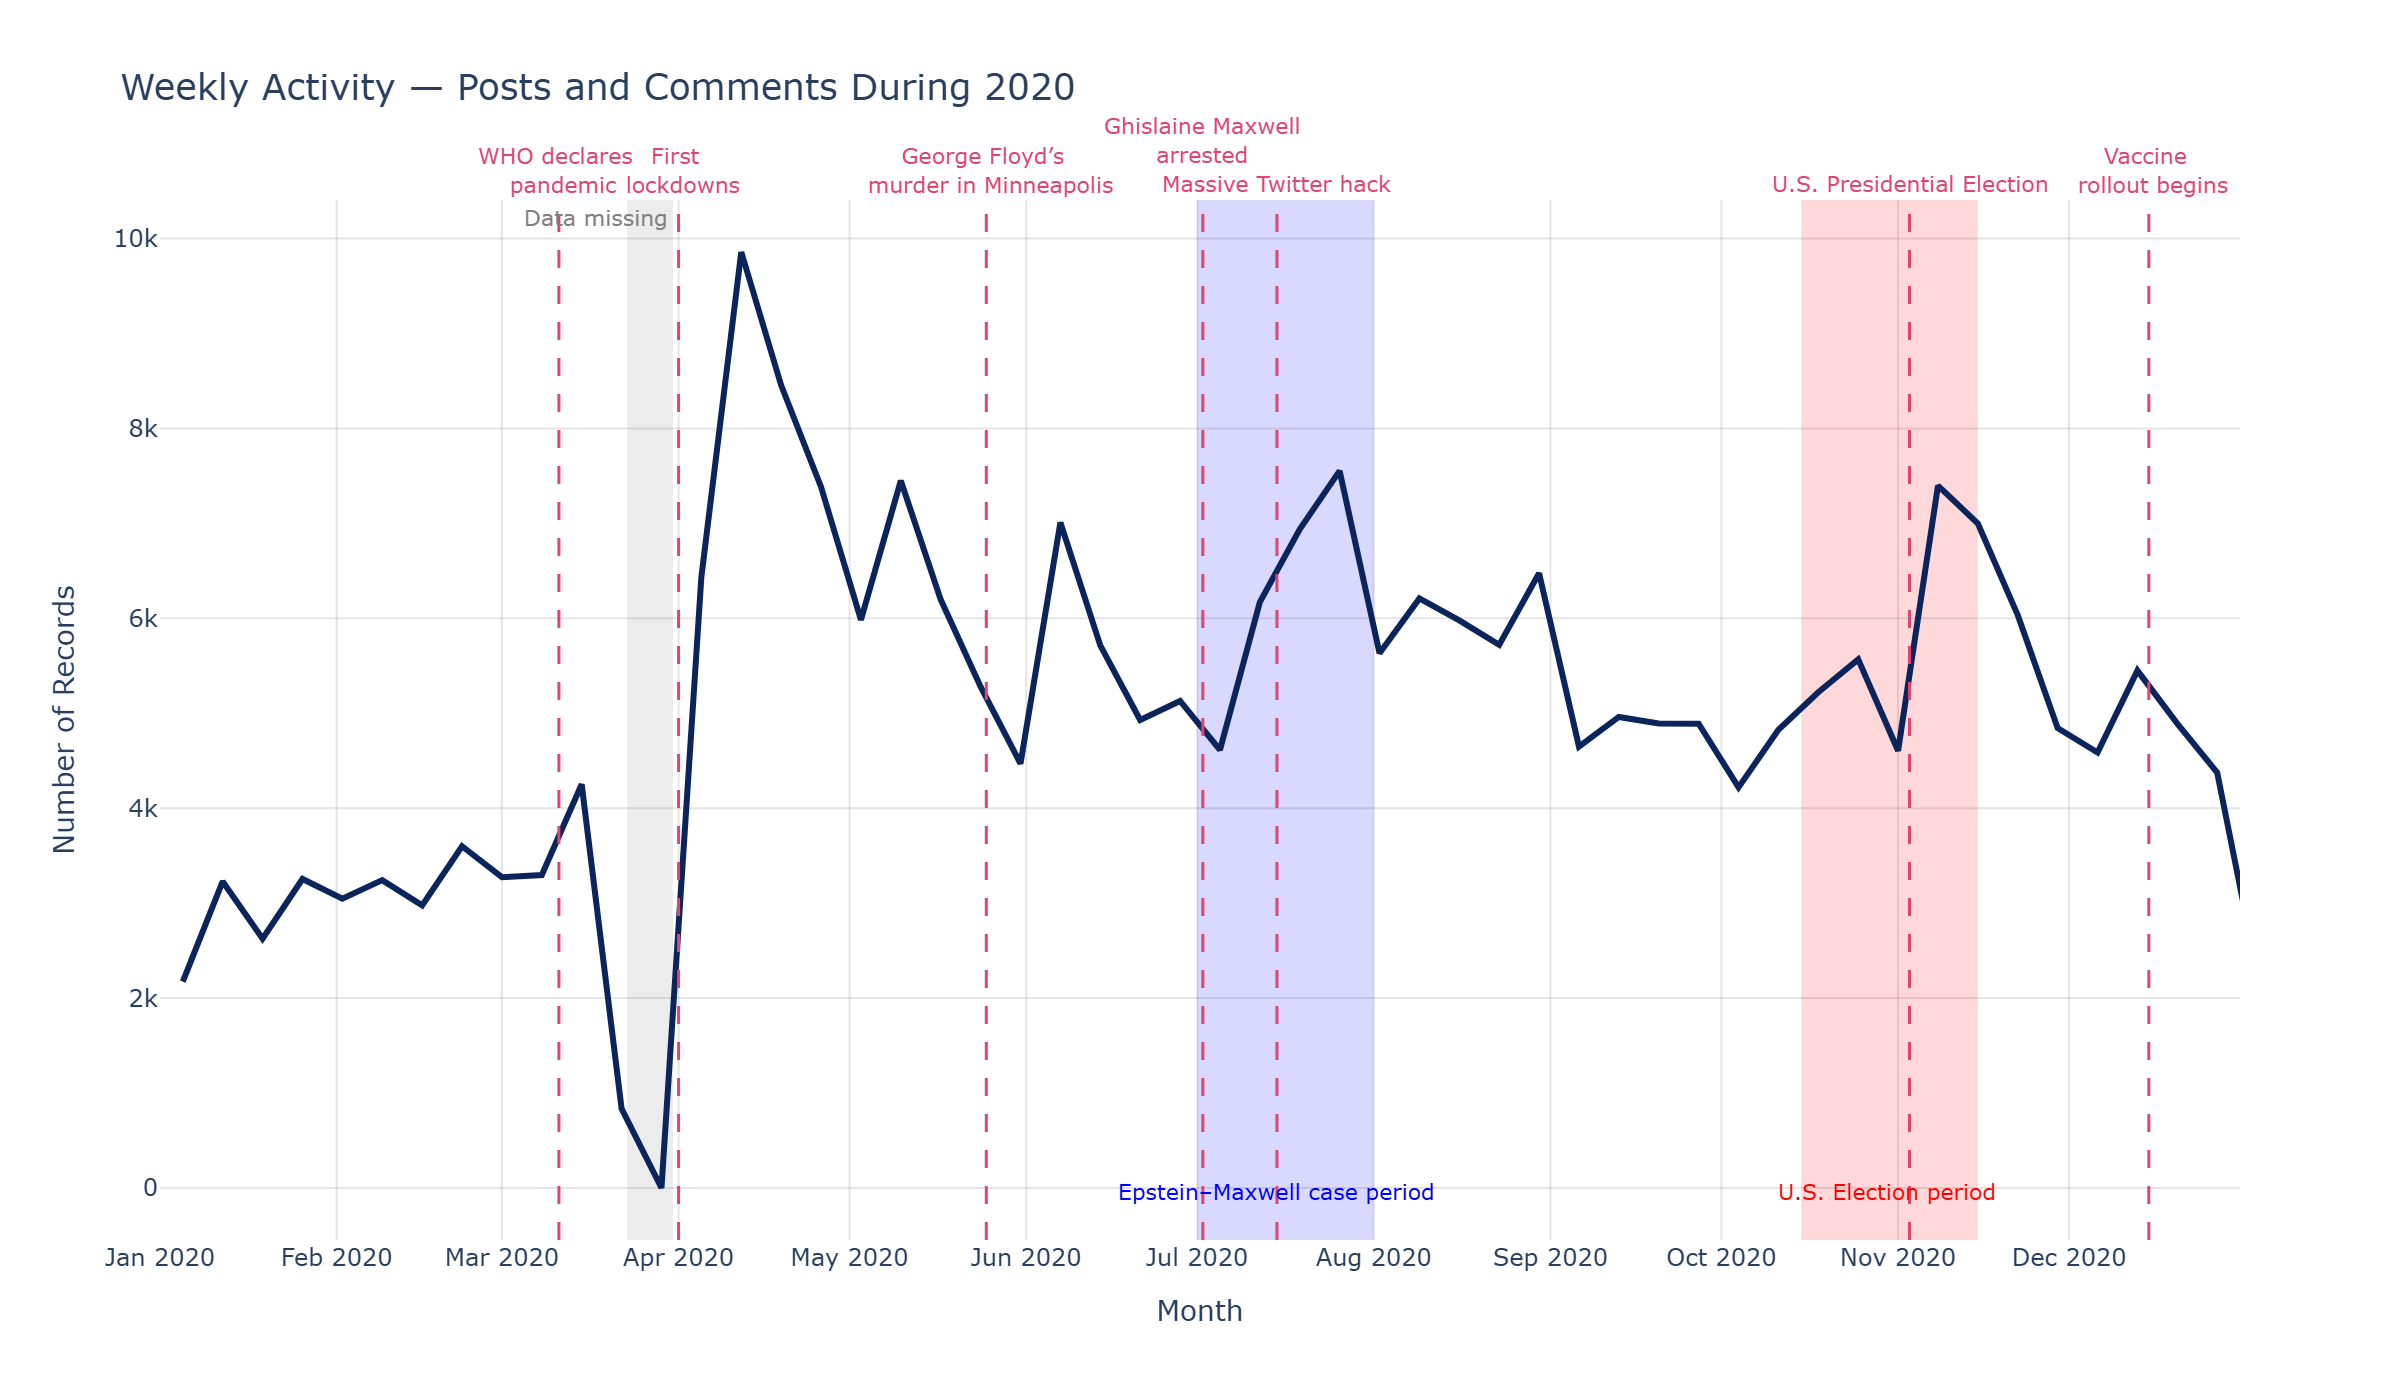

In [52]:
import plotly.graph_objects as go
from datetime import datetime
import time

df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df[(df["created"] >= "2020-01-01") & (df["created"] < "2021-01-01")]

df["Submissions"] = df["is_submission"].astype(int)
df["Comments"] = (~df["is_submission"]).astype(int)

weekly = df.set_index("created").resample("W").agg(
    Submissions=("Submissions", "sum"),
    Comments=("Comments", "sum")
).reset_index()

weekly["Total"] = weekly["Submissions"] + weekly["Comments"]
weekly["Total"] = weekly["Total"].interpolate()


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=weekly["created"],
    y=weekly["Total"],
    mode="lines",
    name="Total Activity",
    line=dict(color=colors[0], width=3)
))

events = {
    "2020-03-11": "WHO declares <br> pandemic",
    "2020-04-01": "First <br> lockdowns",
    "2020-12-15": "Vaccine <br> rollout begins",
    "2020-05-25": "George Floyd’s <br> murder in Minneapolis",
    "2020-07-15": "Massive Twitter hack",
    "2020-07-02": "Ghislaine Maxwell<br>arrested<br>.",
    "2020-11-03": "U.S. Presidential Election"
}

for d, label in events.items():
    ts = time.mktime(datetime.strptime(d, "%Y-%m-%d").timetuple()) * 1000
    if d < "2021-01-01":
        fig.add_vline(
            x=ts,
            line_width=1.5,
            line_dash="dash",
            line_color=colors[4],
            annotation_text=label,
            annotation_position="top",
            annotation_font=dict(size=11, color=colors[4])
        )
fig.add_vrect(
    x0="2020-03-23", x1="2020-03-31",
    fillcolor="gray",
    opacity=0.15,
    layer="below",
    line_width=0,
    annotation_text="Data missing",
    annotation_position="top right",
    annotation_font=dict(size=11, color="gray")
)
fig.add_vrect(
    x0="2020-07-01", x1="2020-08-01",
    fillcolor="blue",
    opacity=0.15,
    layer="below",
    line_width=0
)
fig.add_annotation(
    x="2020-07-15",
    y=0.03, yref="paper",
    text="Epstein–Maxwell case period",
    showarrow=False,
    font=dict(size=11, color="blue"),
    yanchor="bottom"
)

fig.add_vrect(
    x0="2020-10-15", x1="2020-11-15",
    fillcolor="red",
    opacity=0.15,
    layer="below",
    line_width=0
)
fig.add_annotation(
    x="2020-10-30",
    y=0.03, yref="paper",
    text="U.S. Election period",
    showarrow=False,
    font=dict(size=11, color="red"),
    yanchor="bottom"
)




fig.update_layout(
    title="Weekly Activity — Posts and Comments During 2020",
    xaxis_title="Month",
    yaxis_title="Number of Records",
    plot_bgcolor="white",
    title_font_size=18,
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom", y=1.02,
        xanchor="right", x=1
    ),
    xaxis=dict(
        type="date",
        dtick="M1",
        tickformat="%b %Y",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False,
        range=["2020-01-01", "2020-12-31"]
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        gridwidth=1,
        zeroline=False
    )
)

fig.show()


The temporal analysis of weekly posting activity throughout 2020 shows a highly event-responsive dynamic, where online discussions about conspiracy theories surged in direct relation to major global and political developments. The most pronounced spikes in total Reddit activity align with key moments such as the WHO’s declaration of the COVID-19 pandemic (March), the first lockdowns (April), and later vaccine rollout announcements (December).

This temporal synchronization illustrates how conspiracy discourse acted as a reactive communication system, rapidly amplifying uncertainty and mistrust during moments of collective anxiety. For example, the early-year surge corresponds to the sudden global spread of the virus, when reliable information was scarce and alternative explanations thrived. Mid-year increases coincide with socially charged events such as the George Floyd protests and the Ghislaine Maxwell arrest, both of which were frequently reframed in conspiratorial terms linking politics, media, and hidden elites.

The final peak around the U.S. presidential election marks a shift from pandemic-related fears toward politically polarized narratives, often merging health misinformation with claims of institutional corruption or manipulation. The sharp alignment between external events and discussion intensity demonstrates that conspiracy communities functioned as adaptive echo systems, where real-world crises were immediately integrated into pre-existing explanatory frameworks.

In summary, activity peaks reflect the interdependence between external uncertainty and digital rumor production: as societal tension rose, online spaces of mistrust became more active, reinforcing alternative worldviews and sustaining engagement throughout the crisis period.

#### **Q7** How many unique authors are there, and how many contributions did each make? 
Examining author participation helps determine whether discourse was driven by a few prolific individuals or by a larger, more distributed group of users.

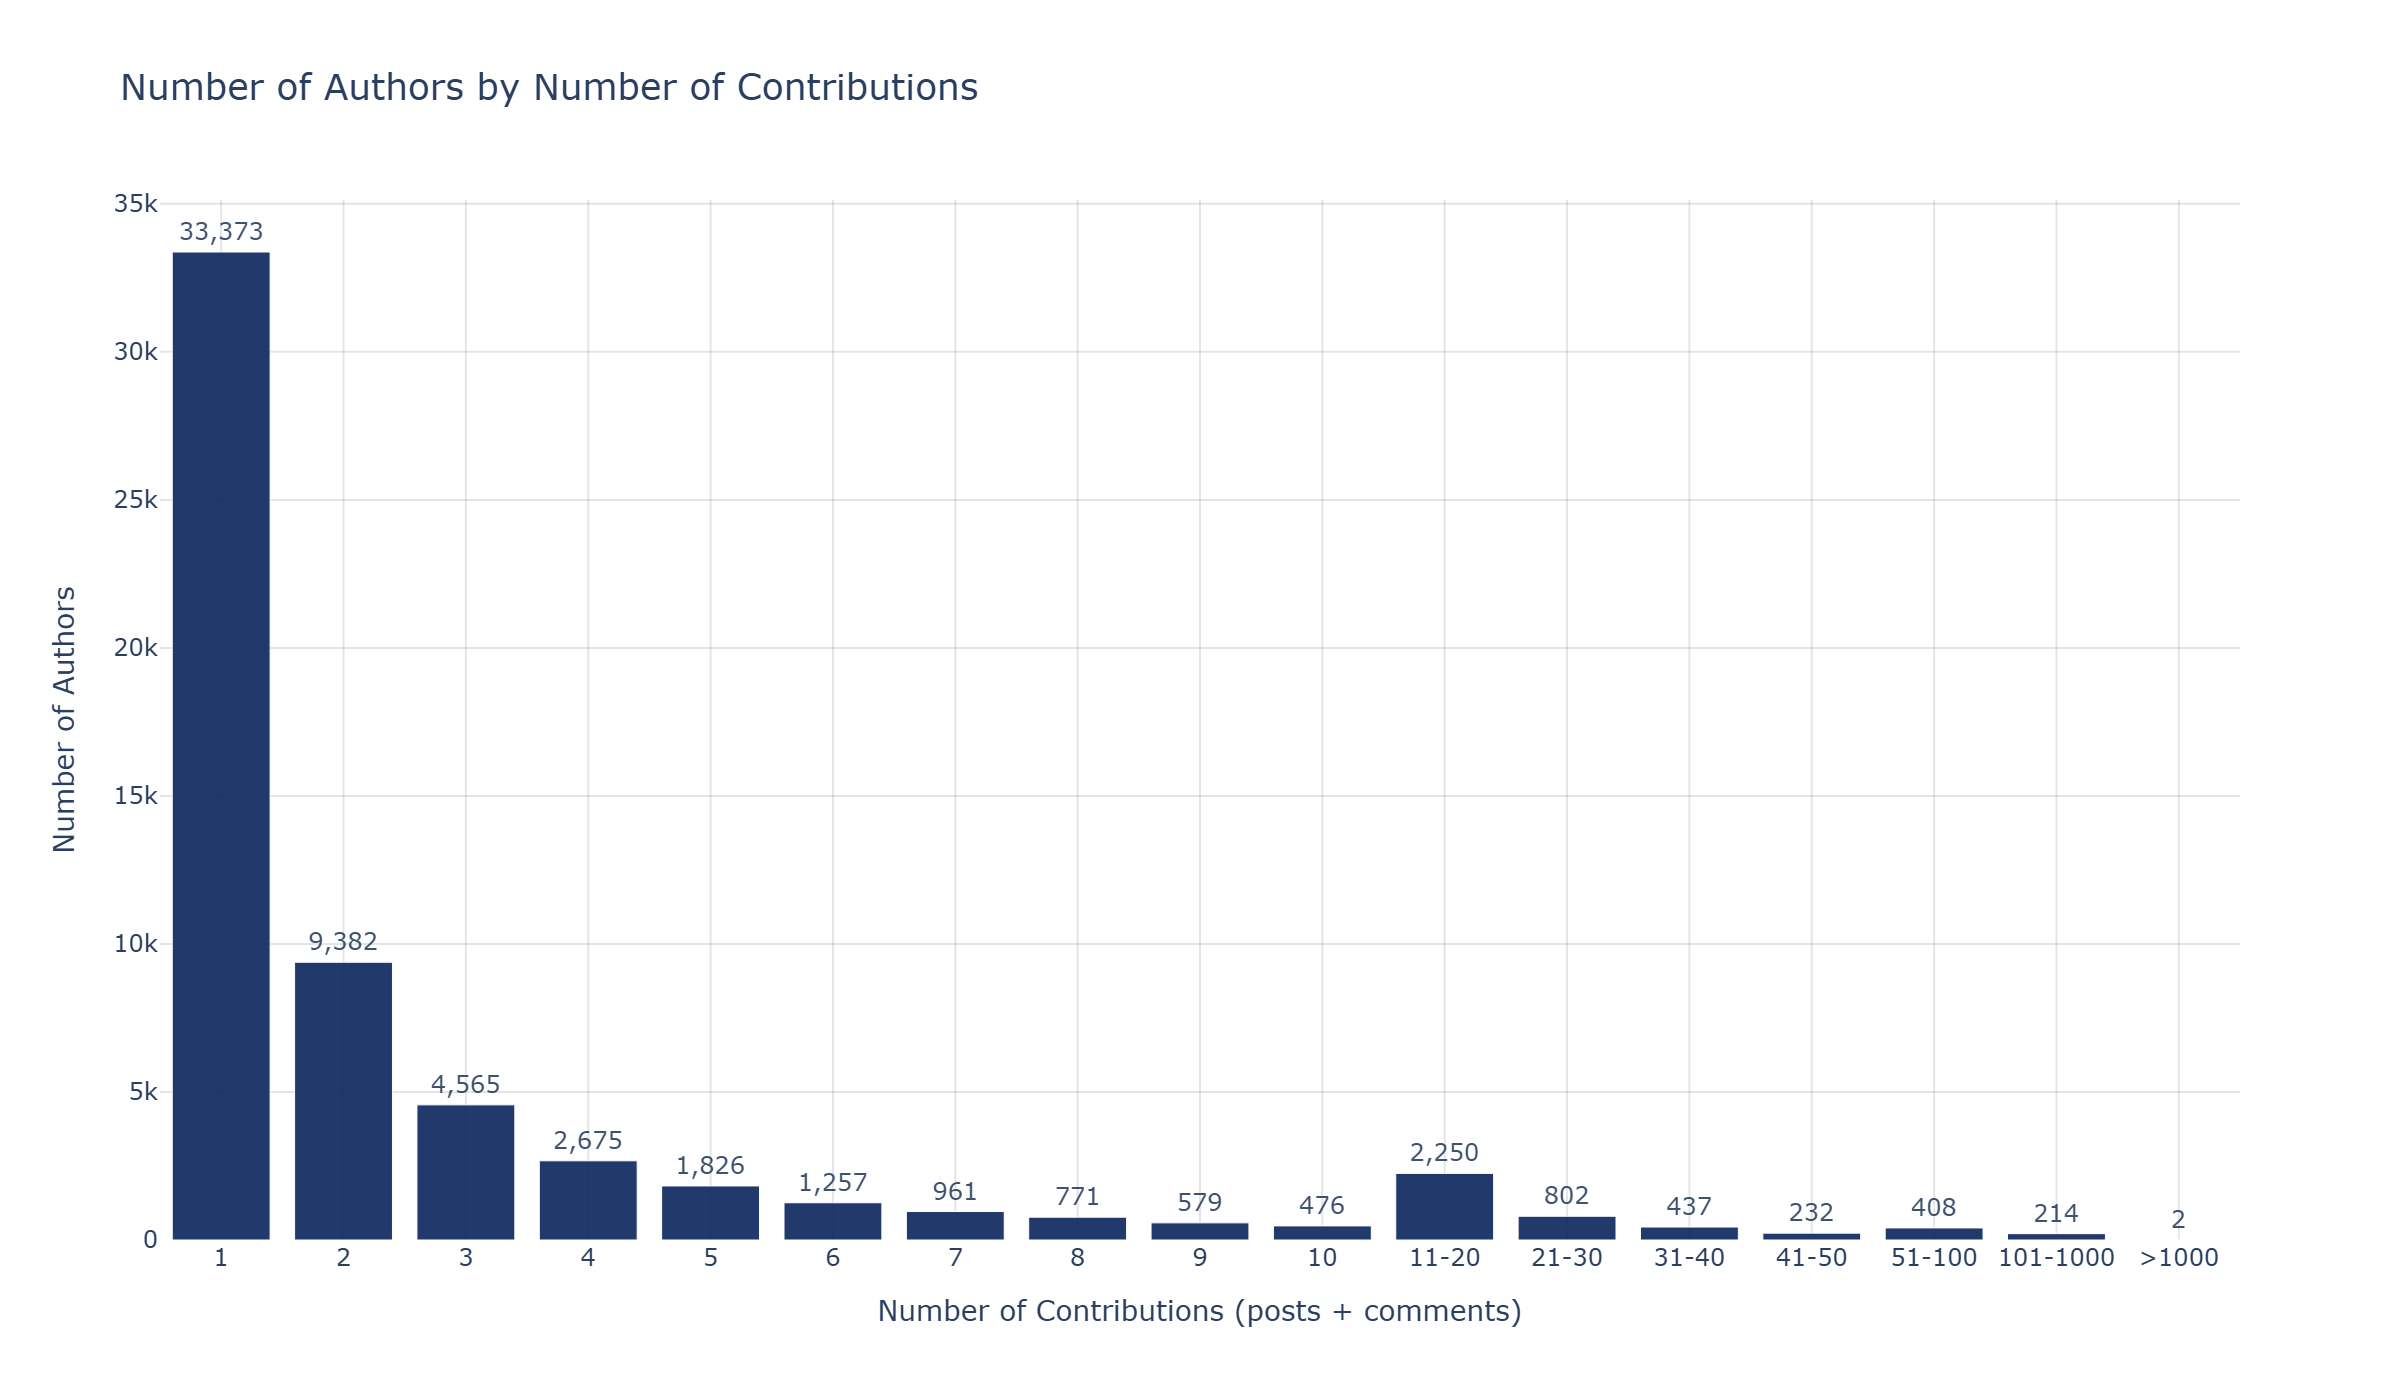

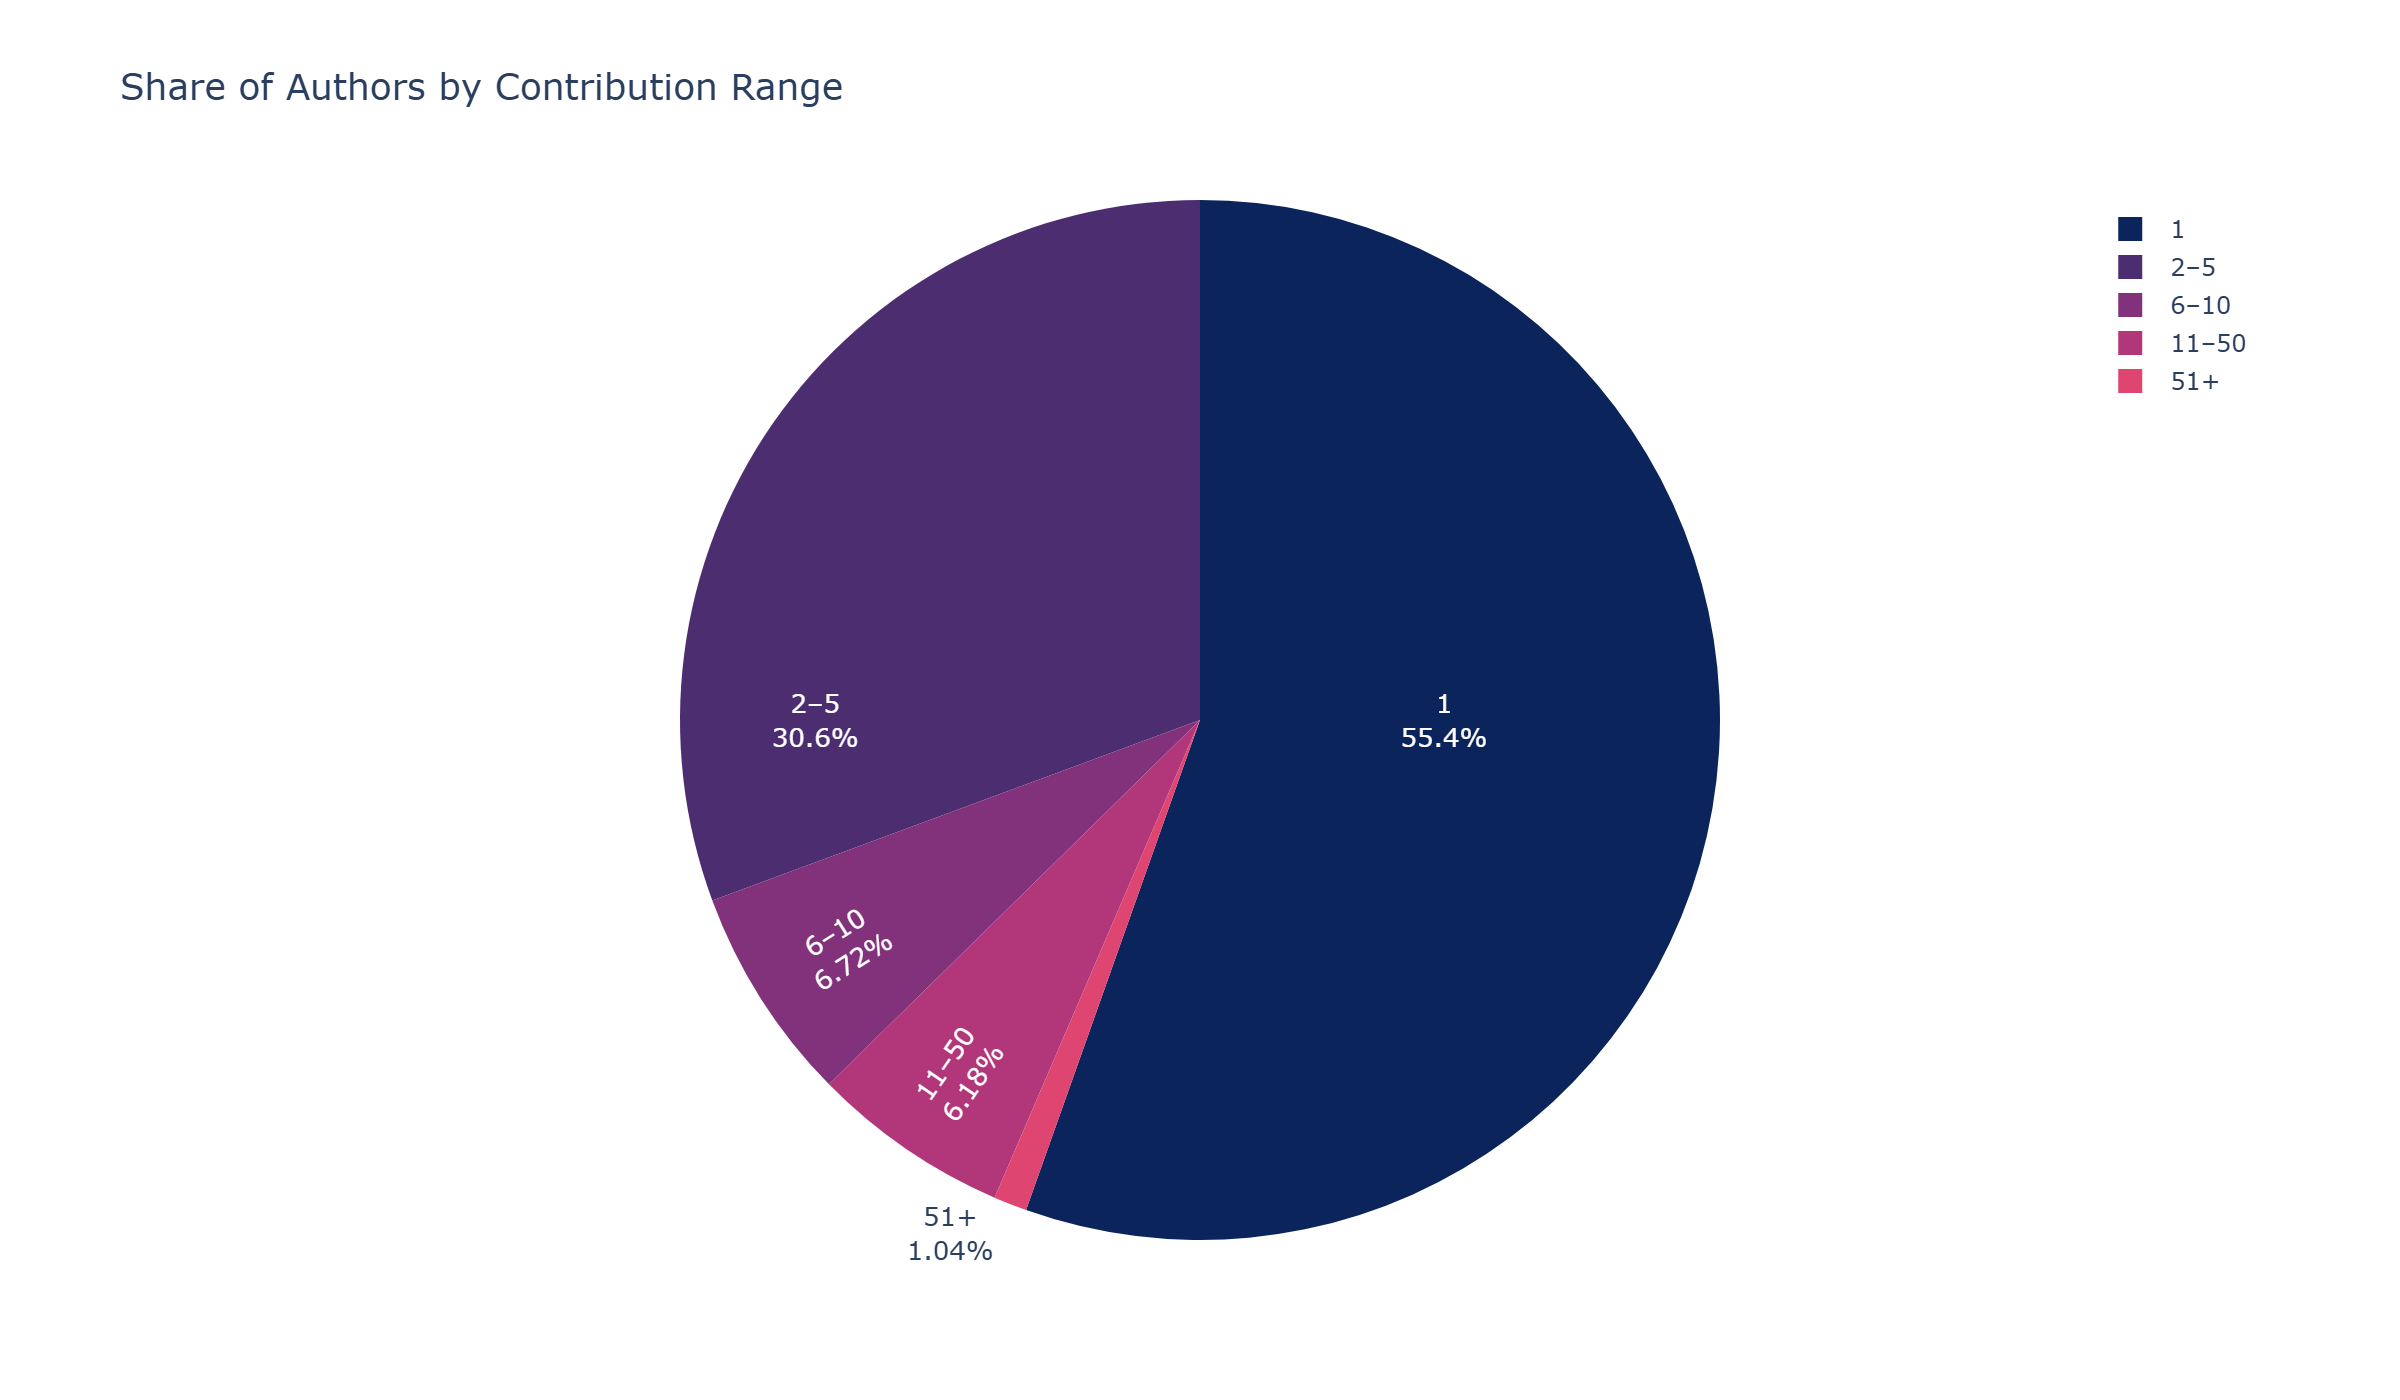

In [46]:
import pandas as pd
import plotly.express as px 


counts = df["author"].value_counts(dropna=False)
author_counts = counts.rename_axis("Author").reset_index(name="Contributions")

bins = author_counts["Contributions"].value_counts().sort_index().reset_index()
bins.columns = ["Contributions", "Authors"]
bins["Contributions"] = pd.to_numeric(bins["Contributions"], errors="coerce")
bins["Authors"] = pd.to_numeric(bins["Authors"], errors="coerce")

ranges = [(11,20), (21,30), (31,40), (41,50), (51,100), (101, 1000)]
group_rows = []
for r in ranges:
    low, high = r
    group_rows.append({
        "Contributions": f"{low}-{high}",
        "Authors": bins.loc[
            (bins["Contributions"] >= low) & (bins["Contributions"] <= high),
            "Authors"
        ].sum()
    })

over_1000 = bins.loc[bins["Contributions"] > 1000, "Authors"].sum()
group_rows.append({"Contributions": ">1000", "Authors": over_1000})

bins_trimmed = bins.loc[bins["Contributions"] <= 10].copy()
bins_final = pd.concat([bins_trimmed, pd.DataFrame(group_rows)], ignore_index=True)
bins_final["Authors"] = pd.to_numeric(bins_final["Authors"], errors="coerce")
bins_final["Contributions"] = bins_final["Contributions"].astype(str)
order = [str(i) for i in range(1, 11)] + [f"{low}-{high}" for (low, high) in ranges] + [">1000"]

fig = px.bar(
    bins_final,
    x="Contributions",
    y="Authors",
    category_orders={"Contributions": order},
    color_discrete_sequence=[colors[0]],
    text="Authors",
    title="Number of Authors by Number of Contributions"
)

fig.update_traces(
    texttemplate="%{text:,}",
    textposition="outside",
    marker_line_width=0.5,
    marker_line_color="white",
    opacity=0.9
)

fig.update_layout(
    xaxis_title="Number of Contributions (posts + comments)",
    yaxis_title="Number of Authors",
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1, zeroline=False),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1, zeroline=False)
)

fig.show()

groups = [
    ("1", bins.loc[bins["Contributions"] == 1, "Authors"].sum()),
    ("2–5", bins.loc[(bins["Contributions"] >= 2) & (bins["Contributions"] <= 5), "Authors"].sum()),
    ("6–10", bins.loc[(bins["Contributions"] >= 6) & (bins["Contributions"] <= 10), "Authors"].sum()),
    ("11–50", bins.loc[(bins["Contributions"] >= 11) & (bins["Contributions"] <= 50), "Authors"].sum()),
    ("51+", bins.loc[bins["Contributions"] > 50, "Authors"].sum())
]

pie_data = pd.DataFrame(groups, columns=["Contribution Range", "Authors"])

fig = px.pie(
    pie_data,
    names="Contribution Range",
    values="Authors",
    color_discrete_sequence=colors,
    title="Share of Authors by Contribution Range"
)

fig.update_traces(
    textinfo="label+percent",
    insidetextorientation="radial",
    textfont_size=13
)

fig.update_layout(
    title_font_size=18,
    plot_bgcolor="white"
)

fig.show()



The distribution of author contributions reveals a strongly skewed participation structure, typical of large online communities. The majority of users contributed only once or a few times, while a much smaller fraction produced a disproportionate share of all content. This pattern follows a power-law or “long-tail” distribution, where engagement intensity declines rapidly after a small core of highly active users.

The presence of these prolific contributors suggests a core–periphery dynamic within conspiracy-related discussions. Core participants—those posting or commenting dozens or even hundreds of times—likely acted as community anchors, consistently initiating or sustaining debates, linking narratives across subreddits, and reinforcing ideological consistency. Peripheral users, by contrast, appear to enter discussions episodically, perhaps motivated by trending events or exposure through social media cross-links.

This asymmetry has important implications for information flow. In a system dominated by a few highly active individuals, the tone and framing of discourse can become centralized, allowing key users to shape thematic directions and influence community sentiment. At the same time, the broad base of occasional participants ensures a constant influx of attention and diversity of reactions, fueling the community’s longevity and visibility.

The combination of concentrated influence and widespread casual participation highlights the dual nature of conspiracy communities: hierarchically structured yet socially open, capable of both sustaining coherent narratives and absorbing new voices during times of crisis.

#### **Q8** Which subreddits have the highest average score versus the highest post volume?
This comparison exposes differences between popularity and engagement—some communities may generate large amounts of content, while others achieve greater approval or influence per post.

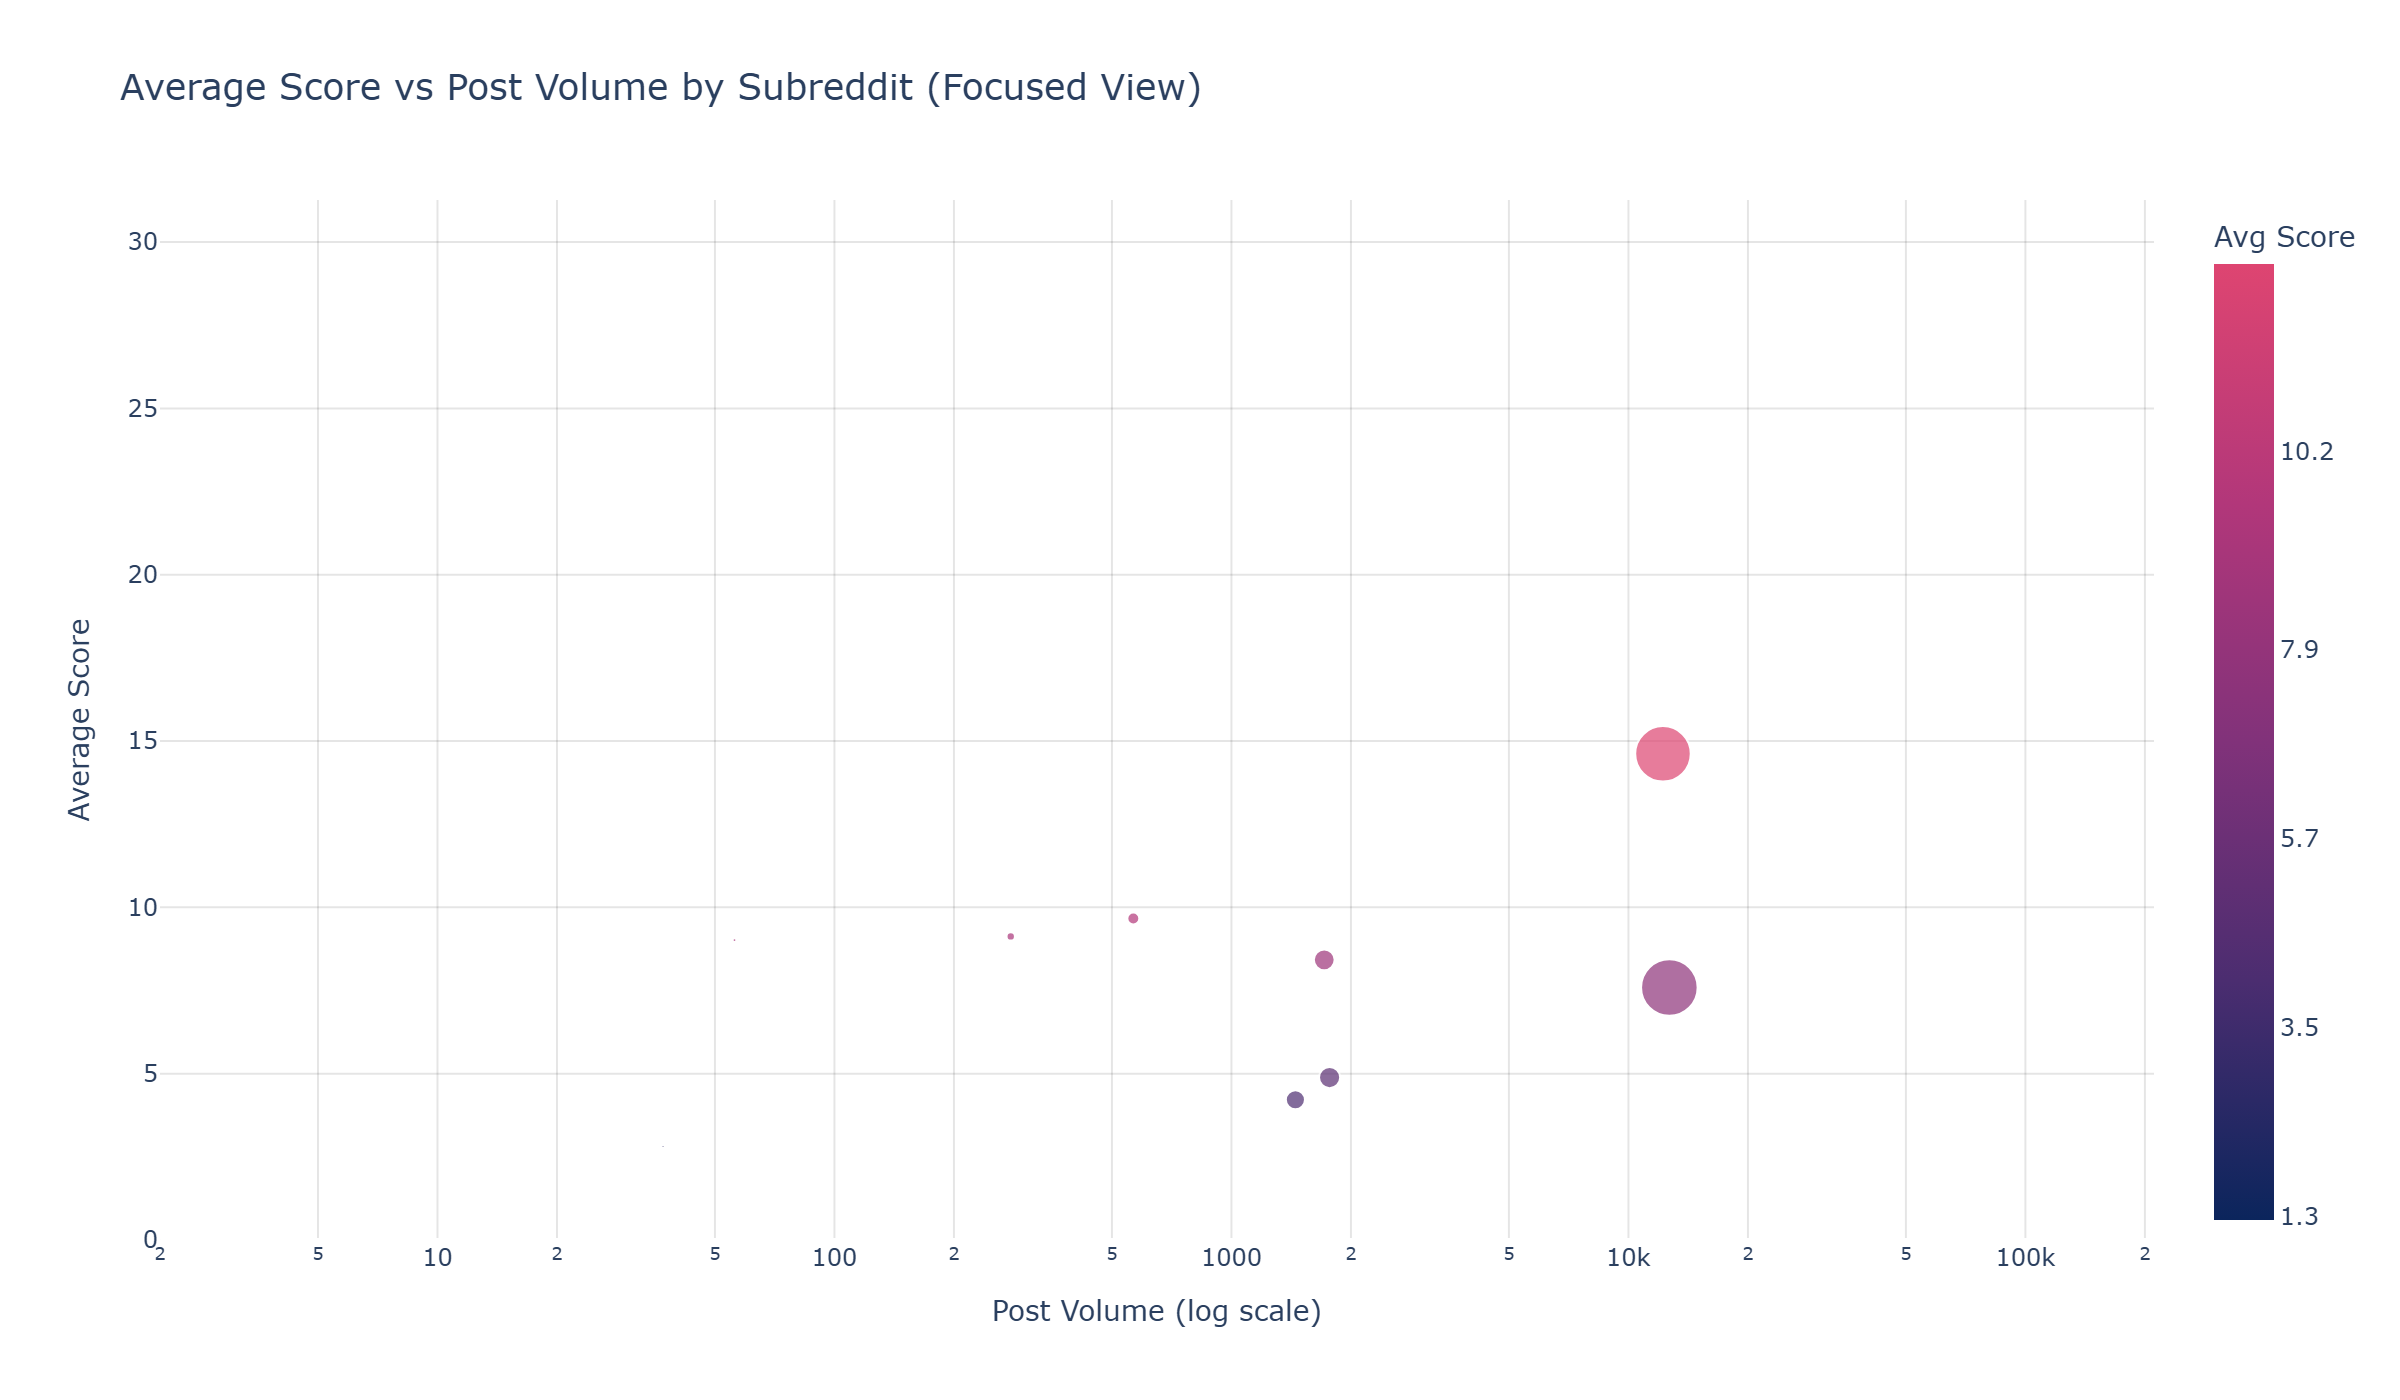

In [47]:
import plotly.express as px
import numpy as np

subreddit_stats = (
    df.groupby("subreddit")
    .agg(avg_score=("score", "mean"), post_volume=("subreddit", "count"))
    .reset_index()
)

volume_cutoff = np.percentile(subreddit_stats["post_volume"], 99)
score_cutoff = np.percentile(subreddit_stats["avg_score"], 99)
filtered = subreddit_stats[
    (subreddit_stats["post_volume"] <= volume_cutoff) &
    (subreddit_stats["avg_score"] <= score_cutoff)
]

vmin, vmax = np.percentile(filtered["avg_score"], [5, 95])

fig = px.scatter(
    filtered,
    x="post_volume",
    y="avg_score",
    size="post_volume",
    color="avg_score",
    hover_name="subreddit",
    color_continuous_scale=[
       colors[0], colors[1], colors[2], colors[3], colors[4]
    ],
    range_color=[vmin, vmax],
    title="Average Score vs Post Volume by Subreddit (Focused View)"
)

fig.update_xaxes(
    type="log",
    title="Post Volume (log scale)",
    range=[np.log10(filtered["post_volume"].min()), np.log10(volume_cutoff)]
)
fig.update_yaxes(
    title="Average Score",
    range=[filtered["avg_score"].min(), score_cutoff]
)

fig.update_layout(
    plot_bgcolor="white",
    title_font_size=18,
    coloraxis_colorbar=dict(
        title="Avg Score",
        tickvals=np.linspace(vmin, vmax, 6).round(1)
    ),
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1)
)

fig.show()


The comparison between average post scores and total post volumes reveals an important distinction between quantity of participation and quality of reception within the conspiracy discourse ecosystem. While some subreddits show very high posting volumes, their average scores remain moderate—suggesting active but internally contested or low-quality engagement. In contrast, a few smaller communities achieve significantly higher mean scores, reflecting tighter community cohesion or stronger agreement among participants.

This divergence illustrates how not all active communities are equally endorsed by their members. Large, general-purpose spaces such as r/conspiracy may host heated and polarized debates, leading to mixed voting behavior and lower average karma per post. Meanwhile, niche communities focusing on specific narratives (for example, anti-vaccine or elite-control theories) tend to exhibit greater internal consensus, resulting in higher approval metrics despite smaller overall size.

The relationship also indicates a reputation–visibility tradeoff: high-volume subreddits function as public arenas for narrative spread, whereas high-scoring but lower-volume ones act as ideological enclaves where participation is more uniform and reinforcement-oriented.

From a sociological perspective, this suggests that the broader conspiracy environment on Reddit was stratified into arenas of contestation and affirmation. Central hubs attracted visibility and debate, while smaller spaces nurtured homogeneity and emotional validation—together forming a complementary structure of dissemination and reinforcement that sustained the movement’s online presence.

#### **Q9** Do different subreddits experience synchronized activity peaks?
Studying temporal synchronization between communities can indicate information diffusion and interconnection among different conspiracy networks.

In [54]:
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df.dropna(subset=["created"])

top_subs = df["subreddit"].value_counts().head(6).index
df_top = df[df["subreddit"].isin(top_subs)].copy()

df_top.loc[:, "month"] = df_top["created"].apply(lambda x: x.strftime("%Y-%m"))
activity = df_top.groupby(["month", "subreddit"]).size().reset_index(name="ActivityCount")



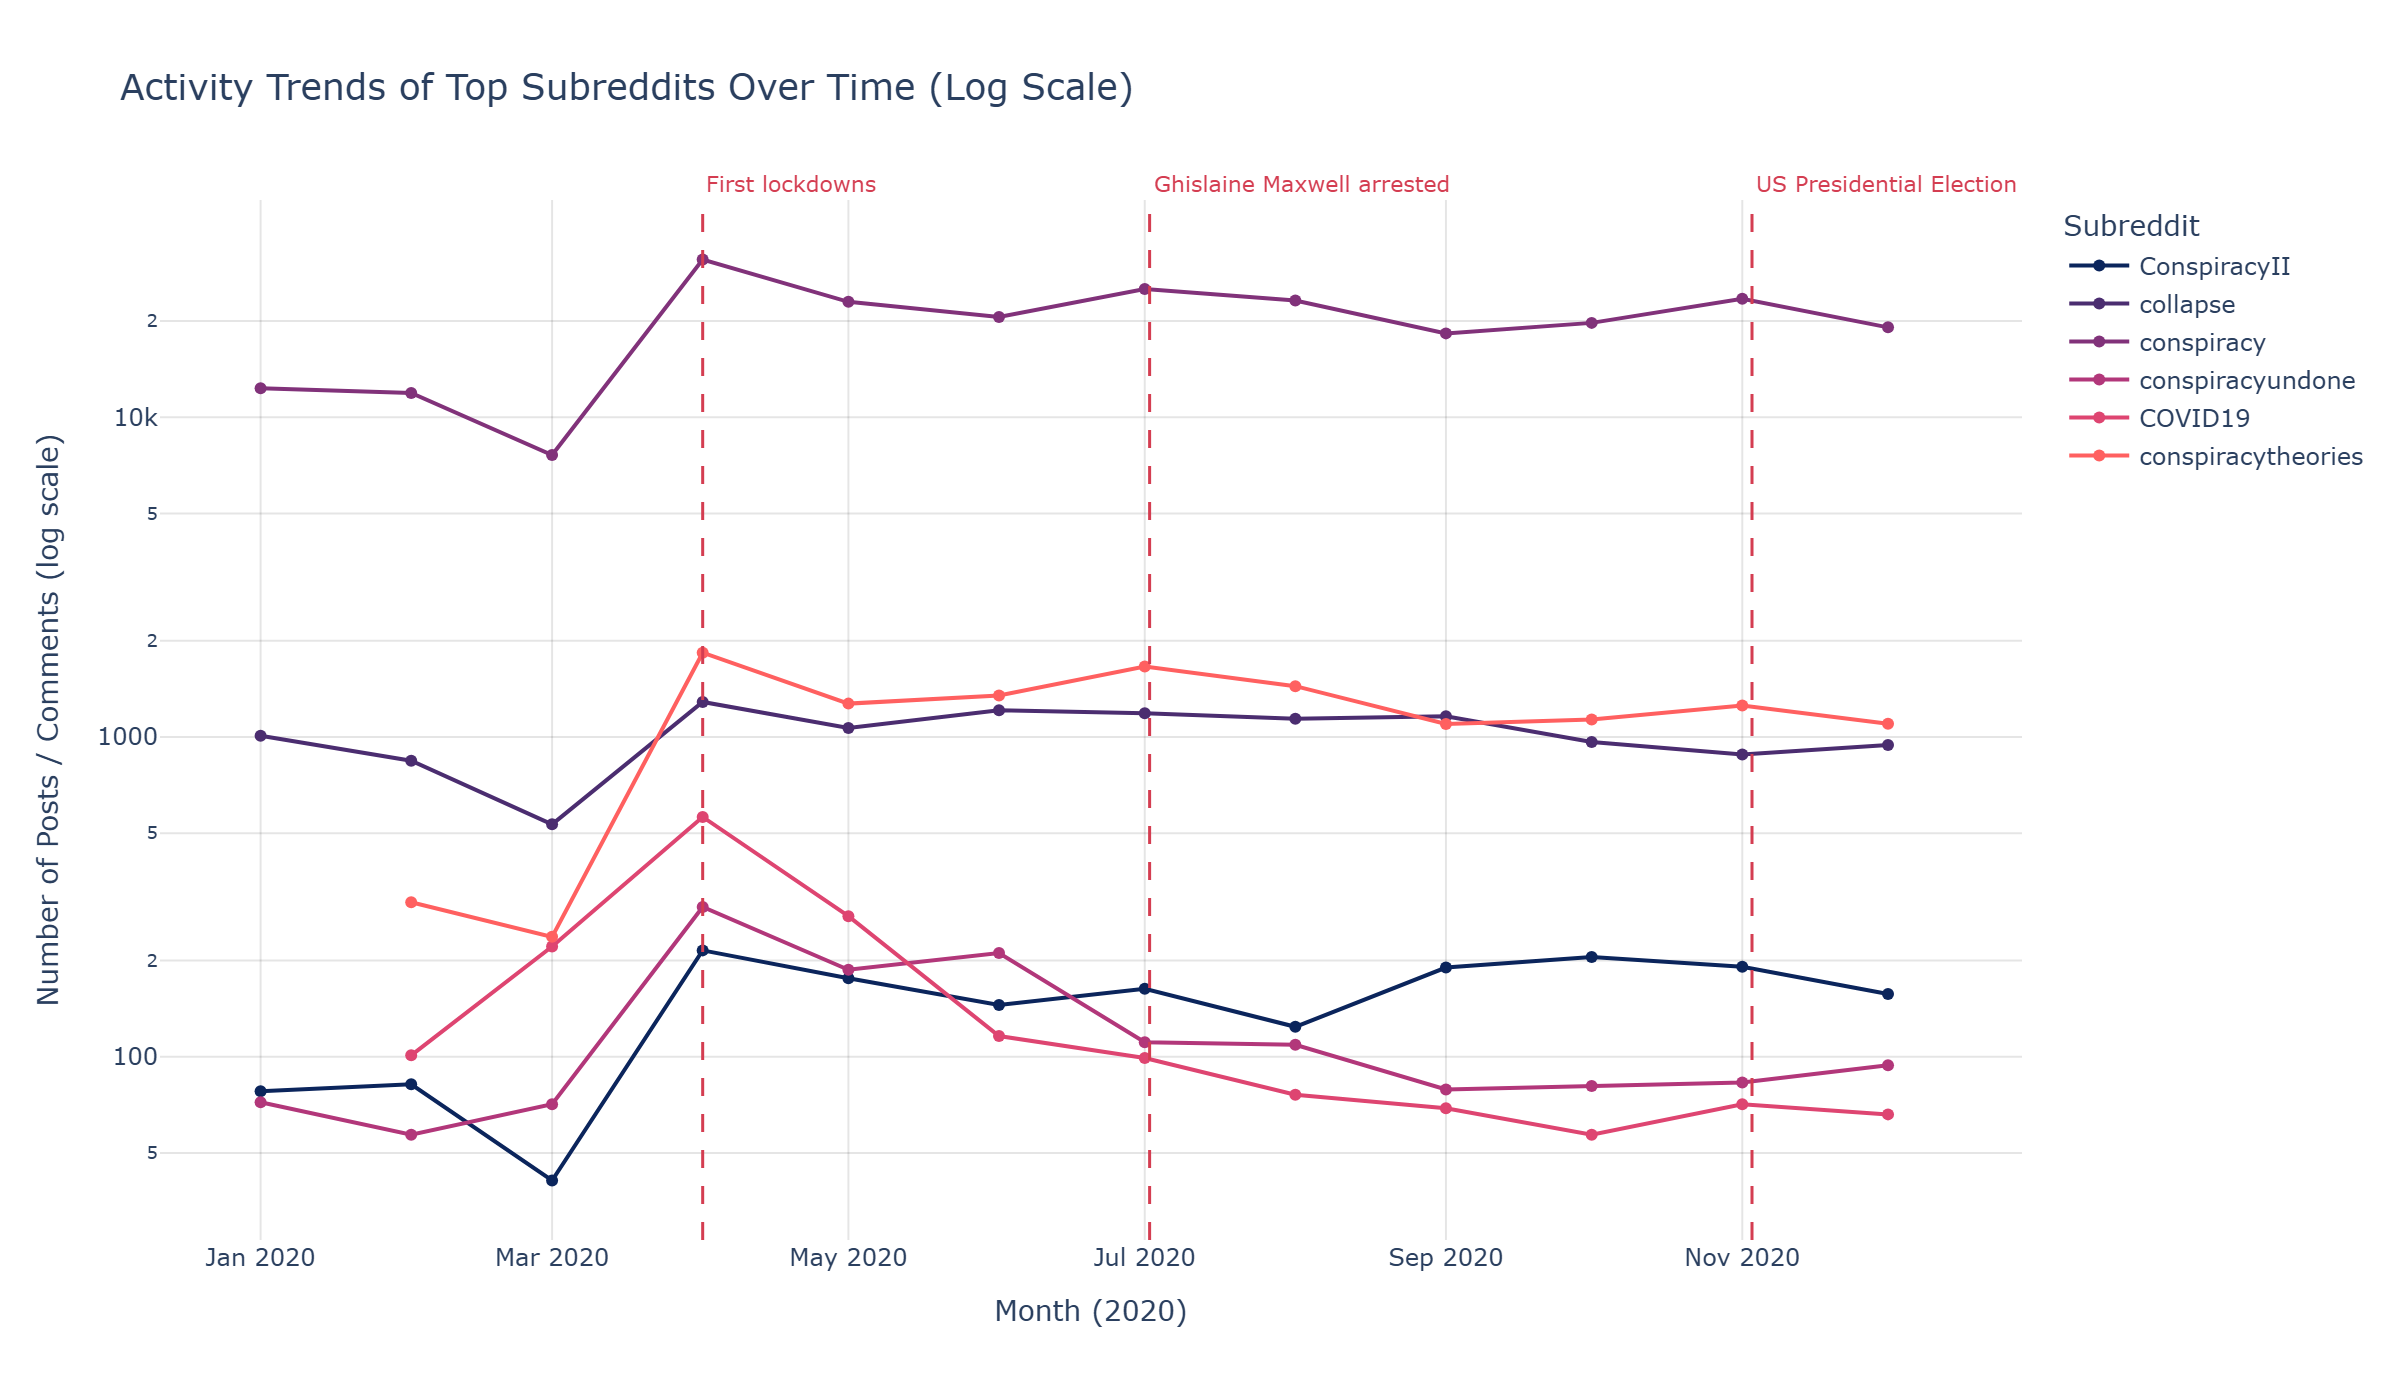

In [55]:
activity["month"] = activity["month"].astype(str)

fig = px.line(
    activity,
    x="month",
    y="ActivityCount",
    color="subreddit",
    color_discrete_sequence=colors,
    title="Activity Trends of Top Subreddits Over Time (Log Scale)"
)

fig.update_traces(mode="lines+markers", line=dict(width=2))

fig.update_layout(
    xaxis_title="Month (2020)",
    yaxis_title="Number of Posts / Comments (log scale)",
    plot_bgcolor="white",
    title_font_size=18,
    legend_title_text="Subreddit",
    yaxis_type="log",
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1)
)

events = {
    "2020-04-01": "First lockdowns",
    "2020-07-02": "Ghislaine Maxwell arrested",
    "2020-11-03": "US Presidential Election"
}

for date, label in events.items():
    date_dt = pd.to_datetime(date)
    fig.add_shape(
        type="line",
        x0=date_dt,
        x1=date_dt,
        y0=0,
        y1=1,
        xref="x",
        yref="paper",
        line=dict(color="#d43d51", width=1.5, dash="dash")
    )
    fig.add_annotation(
        x=date_dt,
        y=1,
        yref="paper",
        text=label,
        showarrow=False,
        xanchor="left",
        yanchor="bottom",
        font=dict(size=11, color="#d43d51")
    )

fig.show()

The temporal analysis of posting activity among the top conspiracy-related subreddits reveals a clear synchronization of engagement peaks, indicating that multiple communities reacted simultaneously to shared external triggers. Despite thematic differences—ranging from general conspiracies to health- or politics-focused groups—activity curves follow parallel trajectories, particularly during moments of major global attention such as lockdown announcements, political scandals, or the U.S. presidential election.

This alignment suggests the existence of a cross-community information flow, where narratives diffuse rapidly between subreddits rather than emerging independently. Users likely participate in multiple spaces simultaneously, carrying content, links, and interpretations across boundaries. The pattern also reflects the influence of Reddit’s recommendation algorithms and external media coverage, which expose users to overlapping content streams and amplify trending narratives platform-wide.

Interestingly, while volume spikes occur synchronously, the magnitude of response varies between subreddits, with broader forums like r/conspiracy absorbing most of the traffic, while niche communities display smaller but sharper bursts of discussion. This points to a hierarchical ecosystem: central subreddits act as narrative distributors, while specialized ones function as echo clusters, reinforcing selected aspects of the story.

Overall, the synchronized activity demonstrates that conspiracy discourse during 2020 operated as a networked reaction system, responsive to global events in near real time. The rapid co-movement of activity across communities reveals how loosely connected online groups can function collectively as a coordinated interpretive network, amplifying shared frames of meaning during periods of heightened uncertainty.

#### **Q10** Do the most active authors post in many subreddits or focus on one community?
Analyzing user posting patterns helps identify whether certain participants act as cross-community links or remain confined to specific ideological spaces.

In [20]:
import numpy as np
activity = (
    df.groupby("author")
    .agg(total_posts=("body", "count"), unique_subs=("subreddit", "nunique"))
    .reset_index()
)
activity = activity[activity["total_posts"] > 0]

activity["total_posts"] = np.clip(activity["total_posts"], 1, 5000)
activity["unique_subs"] = np.clip(activity["unique_subs"], 1, 50)

rng = np.random.default_rng(42)
activity["unique_subs_jitter"] = activity["unique_subs"] + rng.normal(0, 0.05, len(activity))


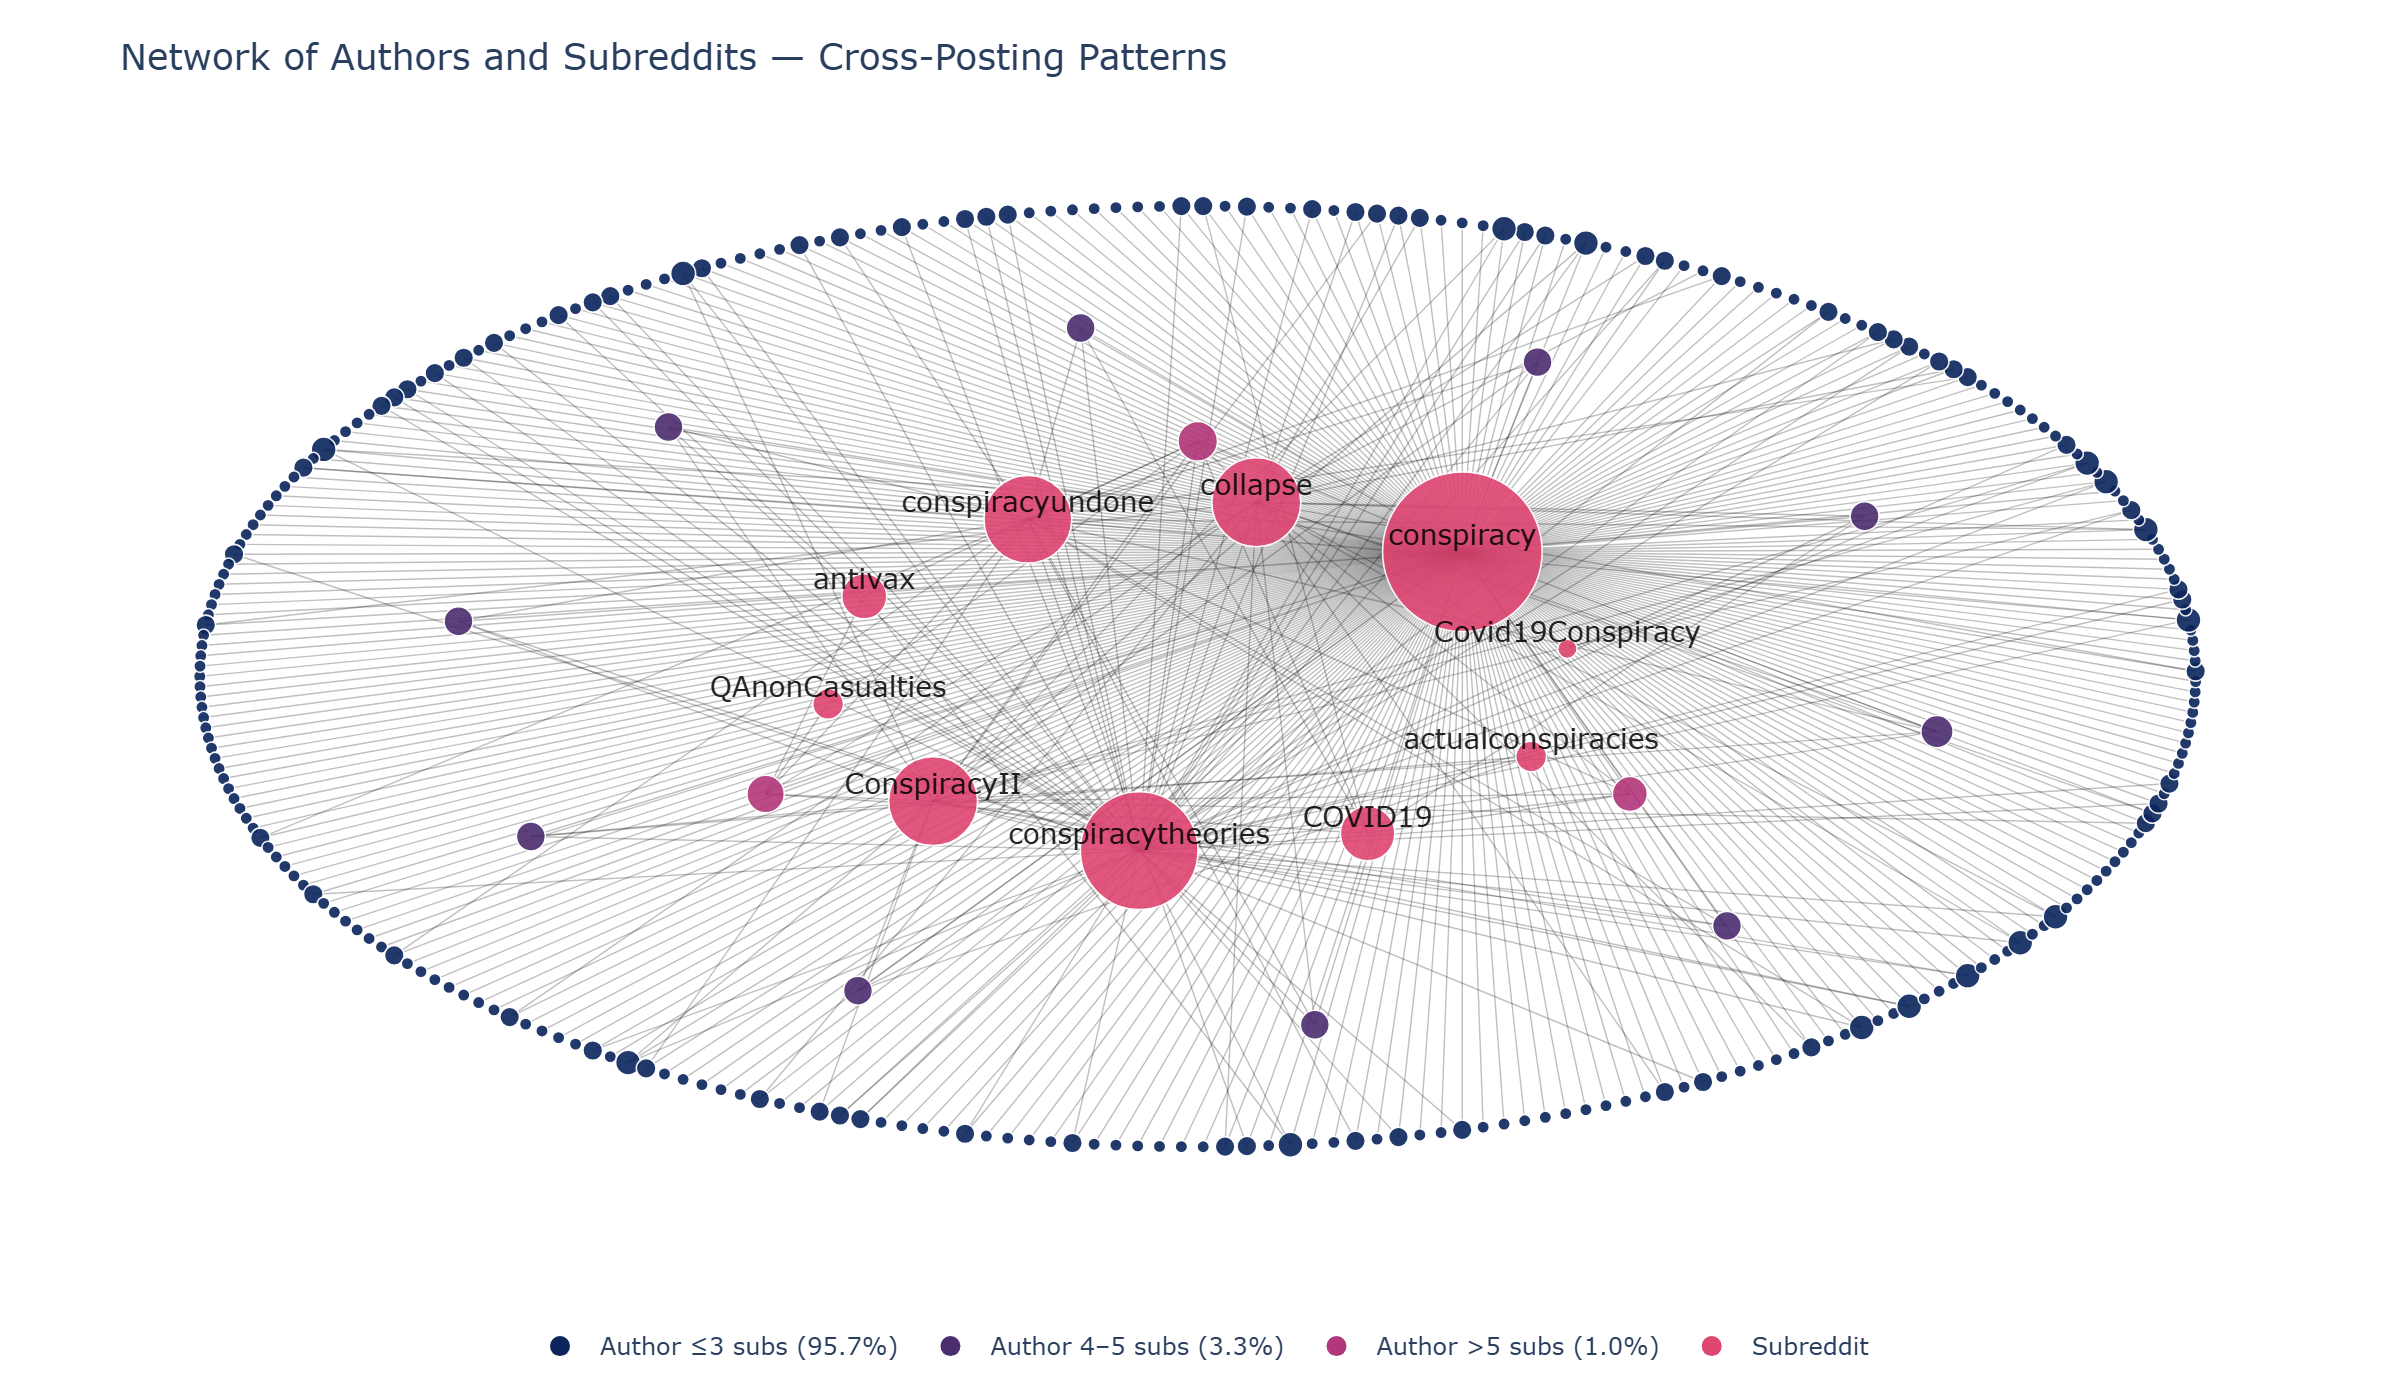

In [56]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

top_subs = df["subreddit"].value_counts().head(10).index
top_authors = df["author"].value_counts().head(300).index
filtered = df[df["subreddit"].isin(top_subs) & df["author"].isin(top_authors)]

G = nx.Graph()
for _, row in filtered.iterrows():
    G.add_node(row["author"], type="author")
    G.add_node(row["subreddit"], type="subreddit")
    G.add_edge(row["author"], row["subreddit"])

authors_low, authors_mid, authors_high = [], [], []
for n in G.nodes():
    if G.nodes[n]["type"] == "author":
        degree = len(list(G.neighbors(n)))
        if degree > 5:
            authors_high.append(n)
        elif degree > 3:
            authors_mid.append(n)
        else:
            authors_low.append(n)

subreddits = [n for n, d in G.nodes(data=True) if d["type"] == "subreddit"]

pos = nx.shell_layout(G, nlist=[subreddits, authors_high, authors_mid, authors_low], scale=2)
for n in subreddits:
    pos[n] = pos[n] * 1.5  

x_edges, y_edges = [], []
for edge in G.edges():
    x_edges += [pos[edge[0]][0], pos[edge[1]][0], None]
    y_edges += [pos[edge[0]][1], pos[edge[1]][1], None]

authors_colors = {
    "author_low":  colors[0],
    "author_mid":  colors[1],
    "author_high": colors[3],
    "subreddit":   colors[4],
}

node_colors, node_sizes = [], []
author_categories = {"≤3": 0, "4–5": 0, ">5": 0}

for n in G.nodes():
    degree = len(list(G.neighbors(n)))
    if G.nodes[n]["type"] == "subreddit":
        node_colors.append(authors_colors["subreddit"])
        node_sizes.append(np.log1p(degree) * 14)
    else:
        if degree > 5:
            node_colors.append(authors_colors["author_high"])
            author_categories[">5"] += 1
        elif degree > 3:
            node_colors.append(authors_colors["author_mid"])
            author_categories["4–5"] += 1
        else:
            node_colors.append(authors_colors["author_low"])
            author_categories["≤3"] += 1
        node_sizes.append(np.log1p(degree) * 9)

total_authors = sum(author_categories.values())
author_percentages = {
    group: round((count / total_authors) * 100, 1)
    for group, count in author_categories.items()
}

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_edges, y=y_edges,
    mode="lines",
    line=dict(width=0.7, color="rgba(0,0,0,0.25)"),
    hoverinfo="none",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=[pos[n][0] for n in G.nodes()],
    y=[pos[n][1] for n in G.nodes()],
    mode="markers",
    marker=dict(
        size=node_sizes,
        color=node_colors,
        opacity=0.9,
        line=dict(width=0.8, color="white")
    ),
    hovertext=[
        f"<b>{n}</b><br>Type: {G.nodes[n]['type']}<br>Connections: {len(list(G.neighbors(n)))}"
        for n in G.nodes()
    ],
    hoverinfo="text",
    showlegend=False
))


fig.add_trace(go.Scatter(
    x=[pos[n][0] for n in subreddits],
    y=[pos[n][1] for n in subreddits],
    mode="text",
    text=subreddits,
    textposition="top center",
    textfont=dict(size=14, color="rgba(0,0,0,0.85)"),
    hoverinfo="none",
    showlegend=False
))

fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
    marker=dict(size=10, color=authors_colors["author_low"]),
    name=f'Author ≤3 subs ({author_percentages["≤3"]}%)'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
    marker=dict(size=10, color=authors_colors["author_mid"]),
    name=f'Author 4–5 subs ({author_percentages["4–5"]}%)'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
    marker=dict(size=10, color=authors_colors["author_high"]),
    name=f'Author >5 subs ({author_percentages[">5"]}%)'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
    marker=dict(size=10, color=authors_colors["subreddit"]),
    name="Subreddit"))

fig.update_layout(
    title="Network of Authors and Subreddits — Cross-Posting Patterns",
    title_font_size=18,
    plot_bgcolor="white",
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom", y=-0.15,
        xanchor="center", x=0.5,
        font=dict(size=12)
    ),
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    margin=dict(l=40, r=40, t=70, b=50)
)

fig.show()


The network visualization of the most active authors and top subreddits illustrates a highly interconnected structure, where a subset of prolific users links multiple communities together. Rather than remaining confined to a single subreddit, many of these users post or comment across several related spaces, effectively creating bridges through which narratives, memes, and framing devices circulate.

This cross-posting behavior highlights the interoperability of conspiracy discourse within Reddit’s ecosystem. Authors with connections to multiple subreddits act as information brokers—individuals who facilitate the diffusion of content and sustain ideological consistency across communities. They not only replicate discussions but also adapt them to each forum’s local norms, allowing ideas to reach diverse audiences while maintaining thematic coherence.

The network structure follows a core-periphery pattern:

Central nodes (the most connected authors and largest subreddits) form the communication backbone, maintaining persistent links between otherwise isolated spaces.

Peripheral nodes, representing less active users or niche subreddits, orbit around this core, participating intermittently but reinforcing visibility through bursts of activity.

This arrangement fosters both resilience and adaptability. Even if one community is banned or loses activity, overlapping participation ensures that its narratives continue to spread elsewhere. The network’s redundancy thus contributes to the persistence and self-reproducing nature of conspiracy ecosystems online.

From a broader perspective, this interconnectedness mirrors the structure of decentralized social movements, where coordination emerges not from central authority but from shared symbols, language, and cross-community actors who carry them between spaces.

#### **Q11** How does the average score (karma/upvotes) change over time?
Tracking how post scores evolve provides insight into shifting community attitudes and levels of endorsement toward conspiracy-related content throughout the pandemic year.

In [22]:
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df.dropna(subset=["created", "score"])

df["month"] = df["created"].dt.to_period("M").dt.to_timestamp()

avg_scores = (
    df.groupby("month")["score"]
    .mean()
    .reset_index()
    .sort_values("month")
)

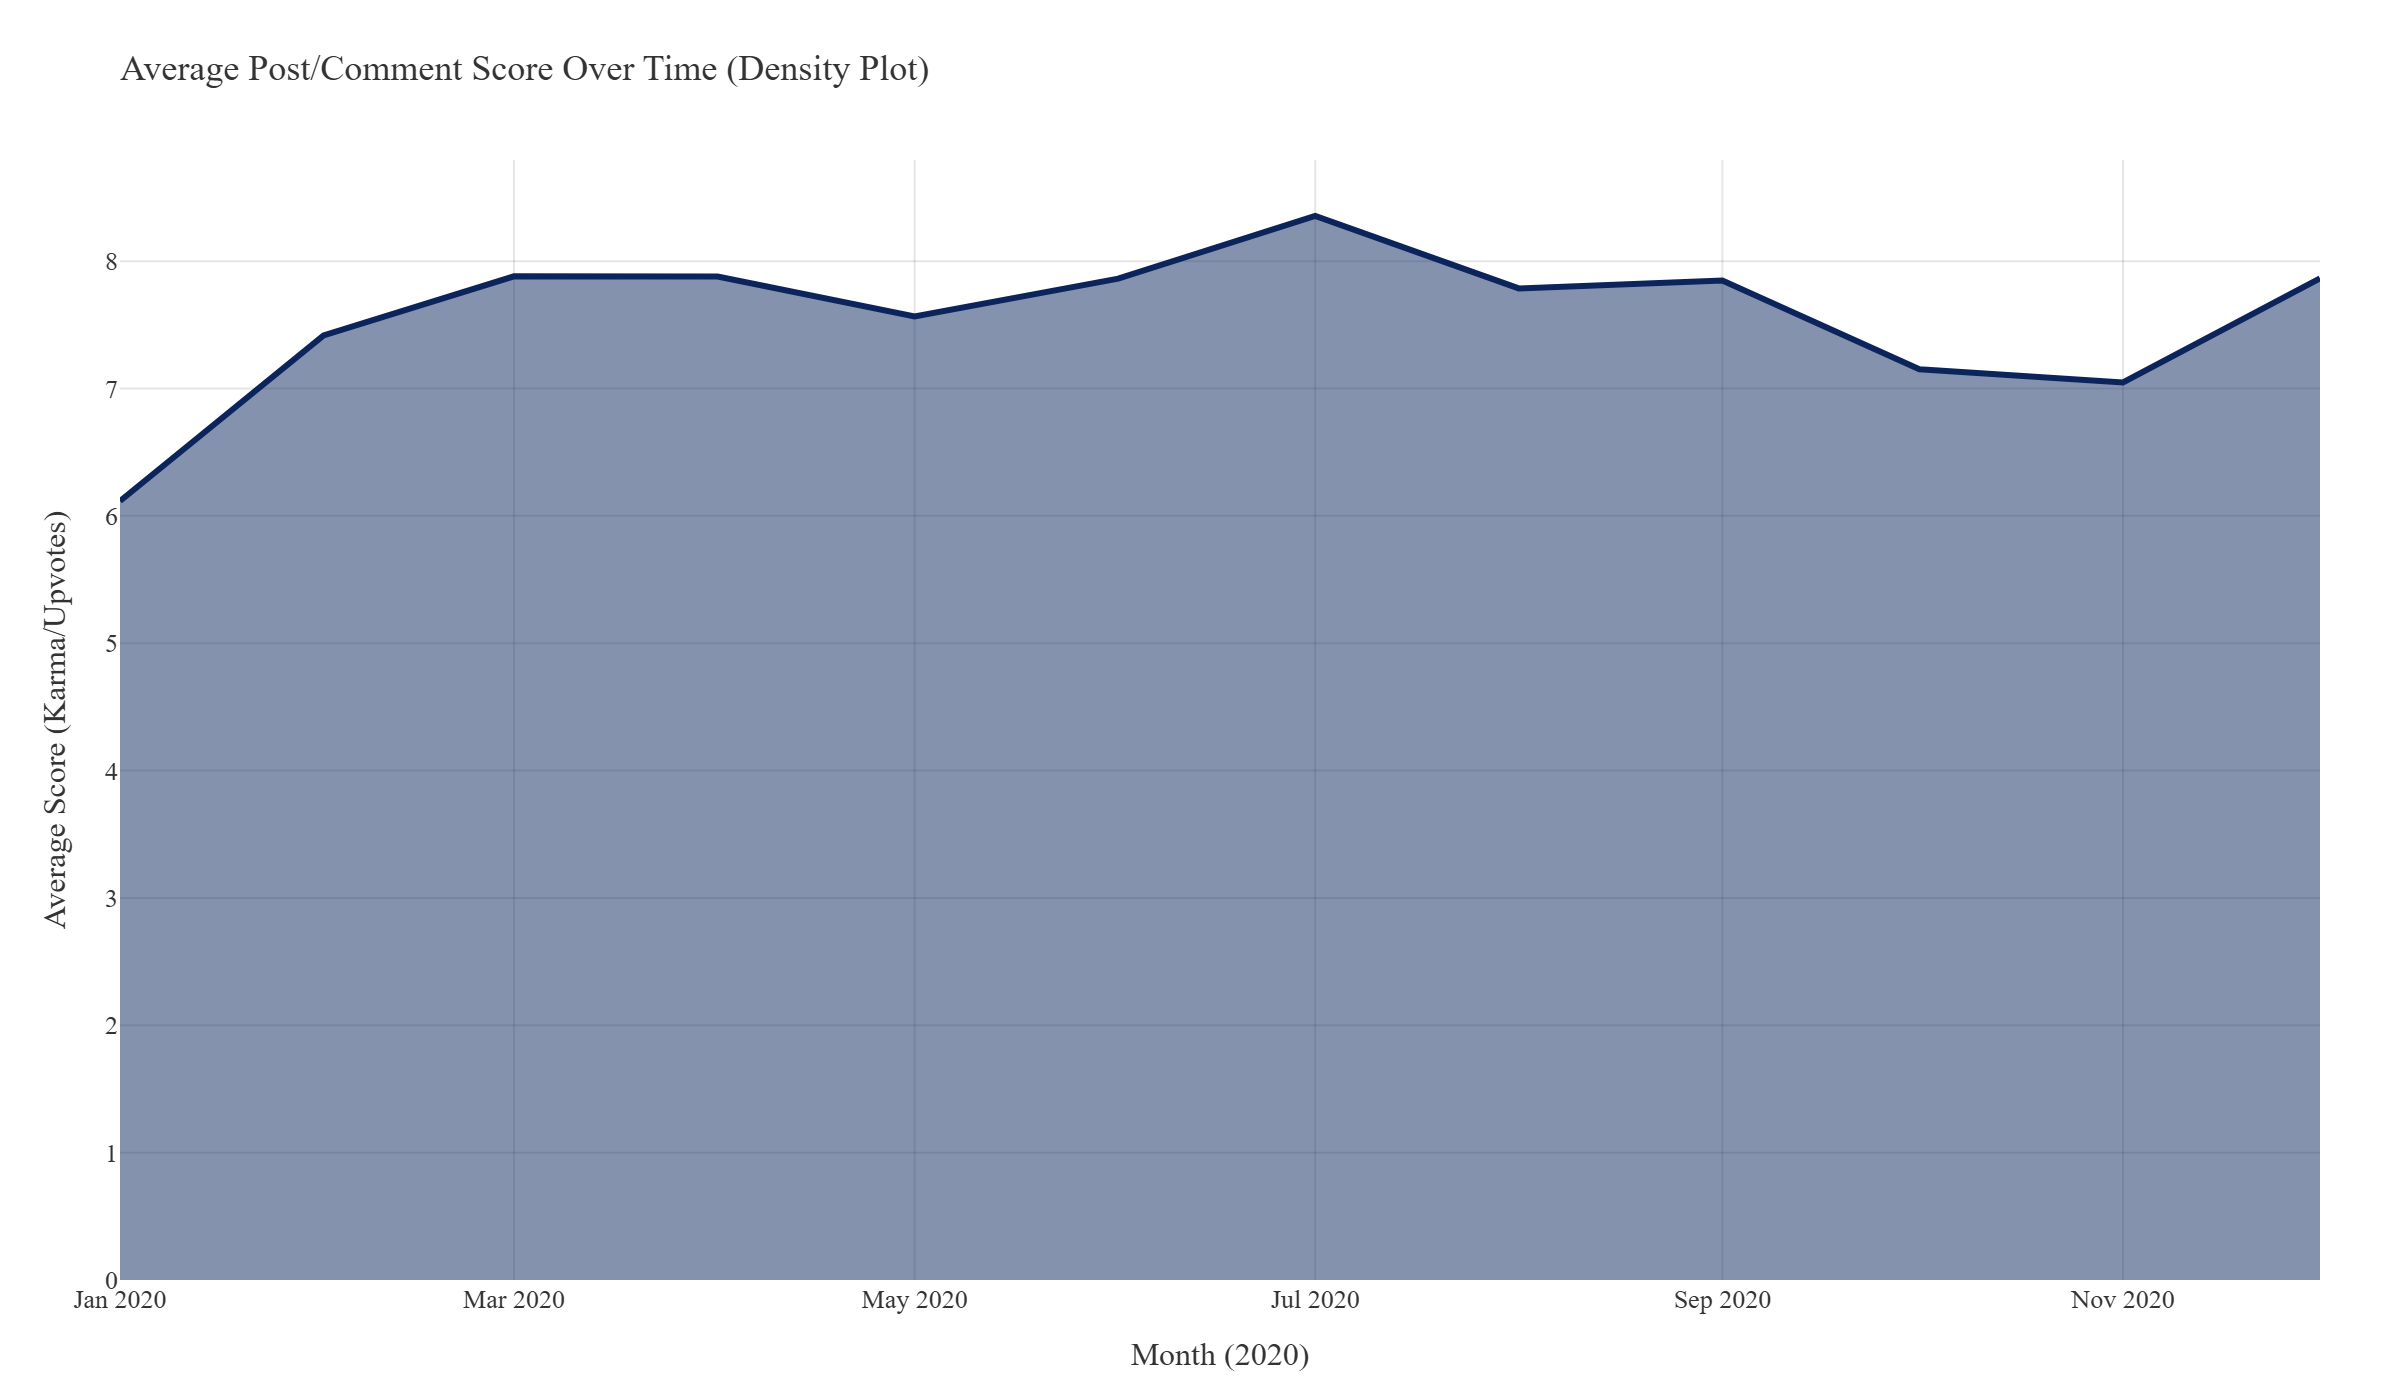

In [57]:
fig = px.area(
    avg_scores,
    x="month",
    y="score",
    color_discrete_sequence=[colors[0]],
    title="Average Post/Comment Score Over Time (Density Plot)",
    labels={
        "month": "Month (2020)",
        "score": "Average Score (Karma/Upvotes)"
    }
)

fig.update_traces(
    line=dict(width=3, color=colors[0]),
    fill='tozeroy',
    opacity=0.5
)

fig.update_layout(
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        zeroline=False
    ),
    font=dict(family="Open Sans", size=13, color="#333"),
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()


The trend of average post and comment scores across 2020 shows clear temporal variation in how conspiracy-related content was received and endorsed by Reddit users. Early in the year, average scores remained relatively modest, reflecting a period of uncertainty and fragmentation, when the pandemic narrative was still emerging and discussions were exploratory rather than consolidated.

As the pandemic intensified, mid-year months saw a noticeable increase in average scores, indicating heightened engagement and stronger audience validation for conspiracy-related posts. This surge aligns with global lockdowns, escalating media distrust, and widespread frustration with institutional responses. Posts that resonated emotionally or confirmed user skepticism tended to receive higher upvotes, suggesting that periods of social tension amplified community approval for alternative explanations.

Toward the end of 2020, the trend slightly declined, possibly reflecting fatigue, polarization, and moderation actions that reduced visibility for highly controversial content. However, the overall yearly trajectory reveals that conspiracy narratives did not fade; instead, their popularity ebbed and flowed with external events, reflecting shifting collective sentiment and attention cycles.

From a behavioral standpoint, the dynamic of score fluctuations demonstrates that engagement quality within conspiracy communities was event-sensitive—users rewarded content that captured dominant emotions of the moment, particularly anger, fear, or disbelief. These shifts in collective endorsement underline the feedback loop between real-world crises and online validation mechanisms, where social turbulence translated directly into digital approval dynamics.

### **Content Analysis**

#### **Q12** What is the overall sentiment distribution of all comments and submissions?
Sentiment analysis reveals the emotional atmosphere of conspiracy discussions, indicating whether fear, anger, or hope dominated online exchanges in 2020.

In [24]:
sentiment = pd.read_csv("sentiment.csv")

In [25]:
emotion_cols = [col for col in sentiment.columns if col in [
    "anger", "anticipation", "disgust", "fear", "joy",
    "sadness", "surprise", "trust"
]]

emotion_summary = sentiment[emotion_cols].sum().sort_values(ascending=False).reset_index()
emotion_summary.columns = ["Emotion", "Count"]
emotion_summary["Percent"] = emotion_summary["Count"] / emotion_summary["Count"].sum() * 100

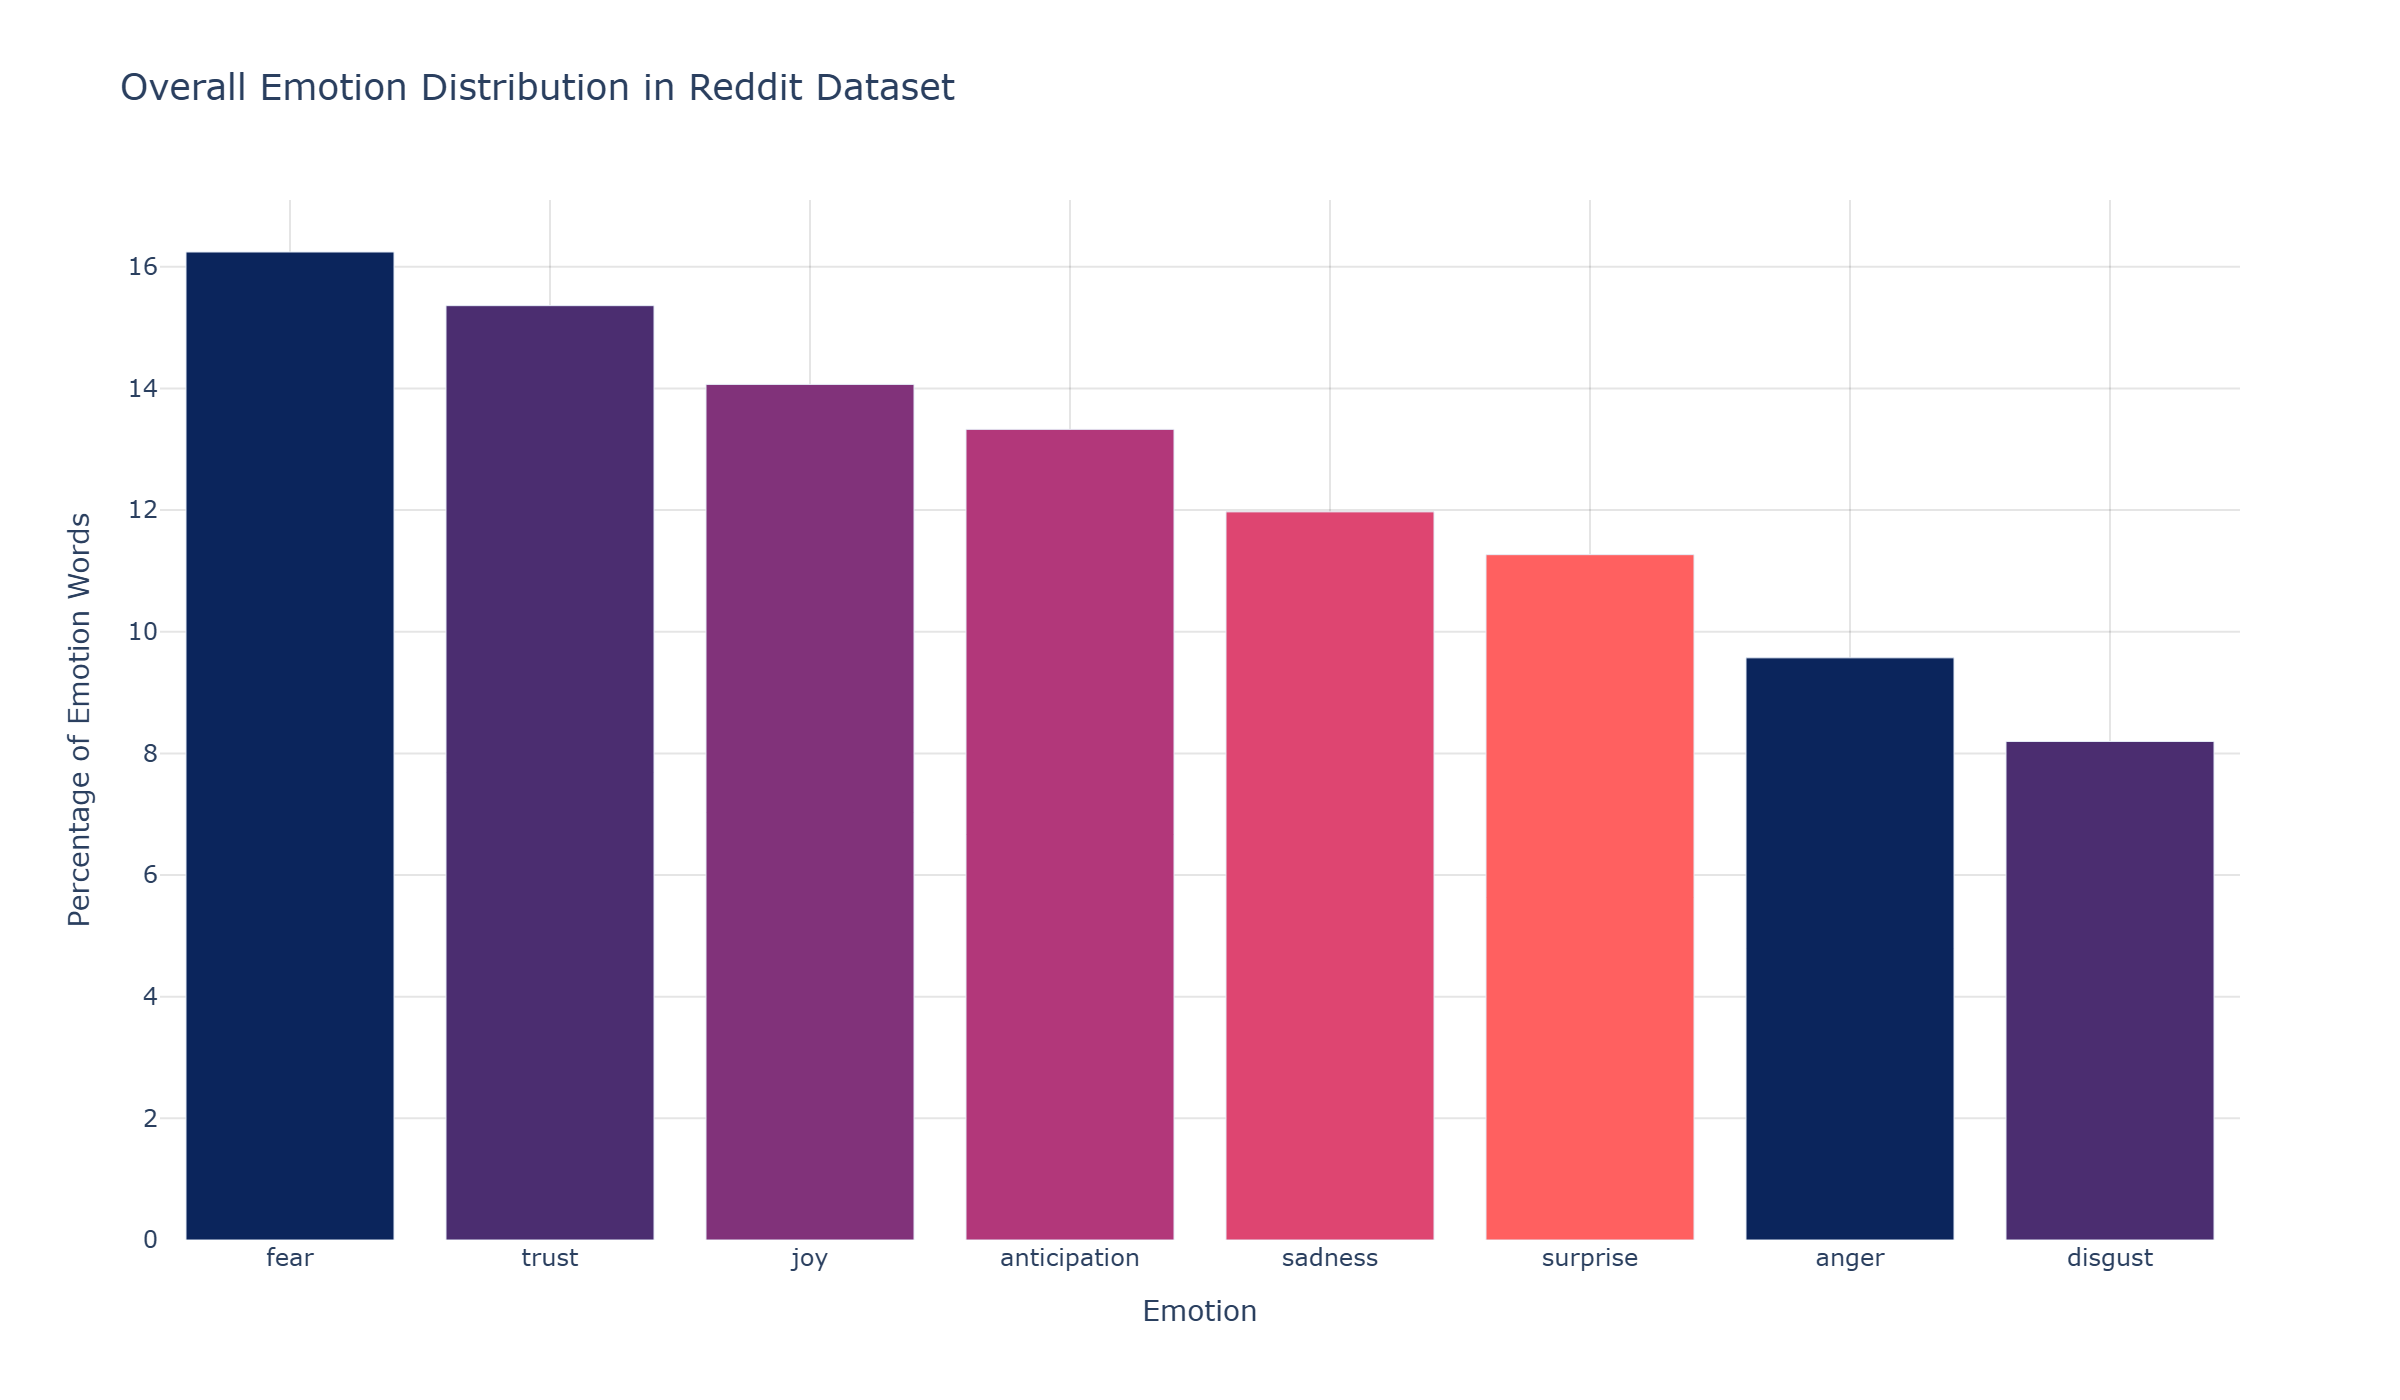

In [58]:
colors_emotions = ["#9b5bbb", "#36553C", "#d4b544", "#bcd377", "#4436ad", "#5DB2B1", "#8e2424", "#127950"]

fig = px.bar(
    emotion_summary,
    x="Emotion",
    y="Percent",
    color="Emotion",
    color_discrete_sequence=colors,
    title="Overall Emotion Distribution in Reddit Dataset"
)

fig.update_layout(
    xaxis_title="Emotion",
    yaxis_title="Percentage of Emotion Words",
    plot_bgcolor="white",
    title_font_size=18,
    showlegend=False,
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", gridwidth=1)
)

fig.show()


The overall sentiment distribution of Reddit discussions about conspiracy narratives in 2020 shows a strong emotional polarization. 

Negative sentiment dominates the conversations, slightly surpassing positive sentiment, while neutral posts form a much smaller portion. This indicates that conspiracy-related discussions were highly emotionally charged, with fear, distrust, and anger being particularly widespread. 

The sizable share of positive sentiment suggests the presence of hopeful or supportive narratives within these communities as well, but the prevalence of negativity reflects heightened anxiety and conflict during this period of global uncertainty.

The sentiment analysis of Reddit posts and comments reveals a highly polarized emotional environment, dominated by negative affective tones such as fear, anger, and disgust. These emotions collectively account for the largest share of sentiment-labeled words, indicating that conspiracy discussions in 2020 were strongly driven by distrust, anxiety, and frustration.

This emotional dominance is unsurprising given the dataset’s temporal context. The COVID-19 pandemic, coupled with political instability and information overload, created fertile conditions for emotionally charged interpretations of global events. Negative emotions in this setting often serve a functional role—they reinforce group cohesion and justify skepticism toward perceived sources of deception or manipulation.

At the same time, the analysis also shows a non-negligible presence of positive emotions such as trust and joy. These typically emerge in posts that express in-group solidarity, mutual support, or hopeful narratives about “waking up” and “discovering the truth.” This coexistence of fear and hope reflects a dual emotional logic: conspiracy discourse both thrives on outrage and sustains itself through belonging and empowerment.

In sum, the emotional profile of the dataset suggests that conspiracy communities operated as affective publics, where emotional expression was not merely a by-product but a central organizing mechanism. The prevalence of strong emotions helped maintain engagement, reinforce identity boundaries, and amplify the viral circulation of claims during times of crisis.

#### **Q13** What are the most positive and most negative subreddits overall?
Comparing sentiment across communities makes it possible to identify where discourse tended to be more constructive, aggressive, or despairing, illustrating emotional diversity within the conspiracy sphere.

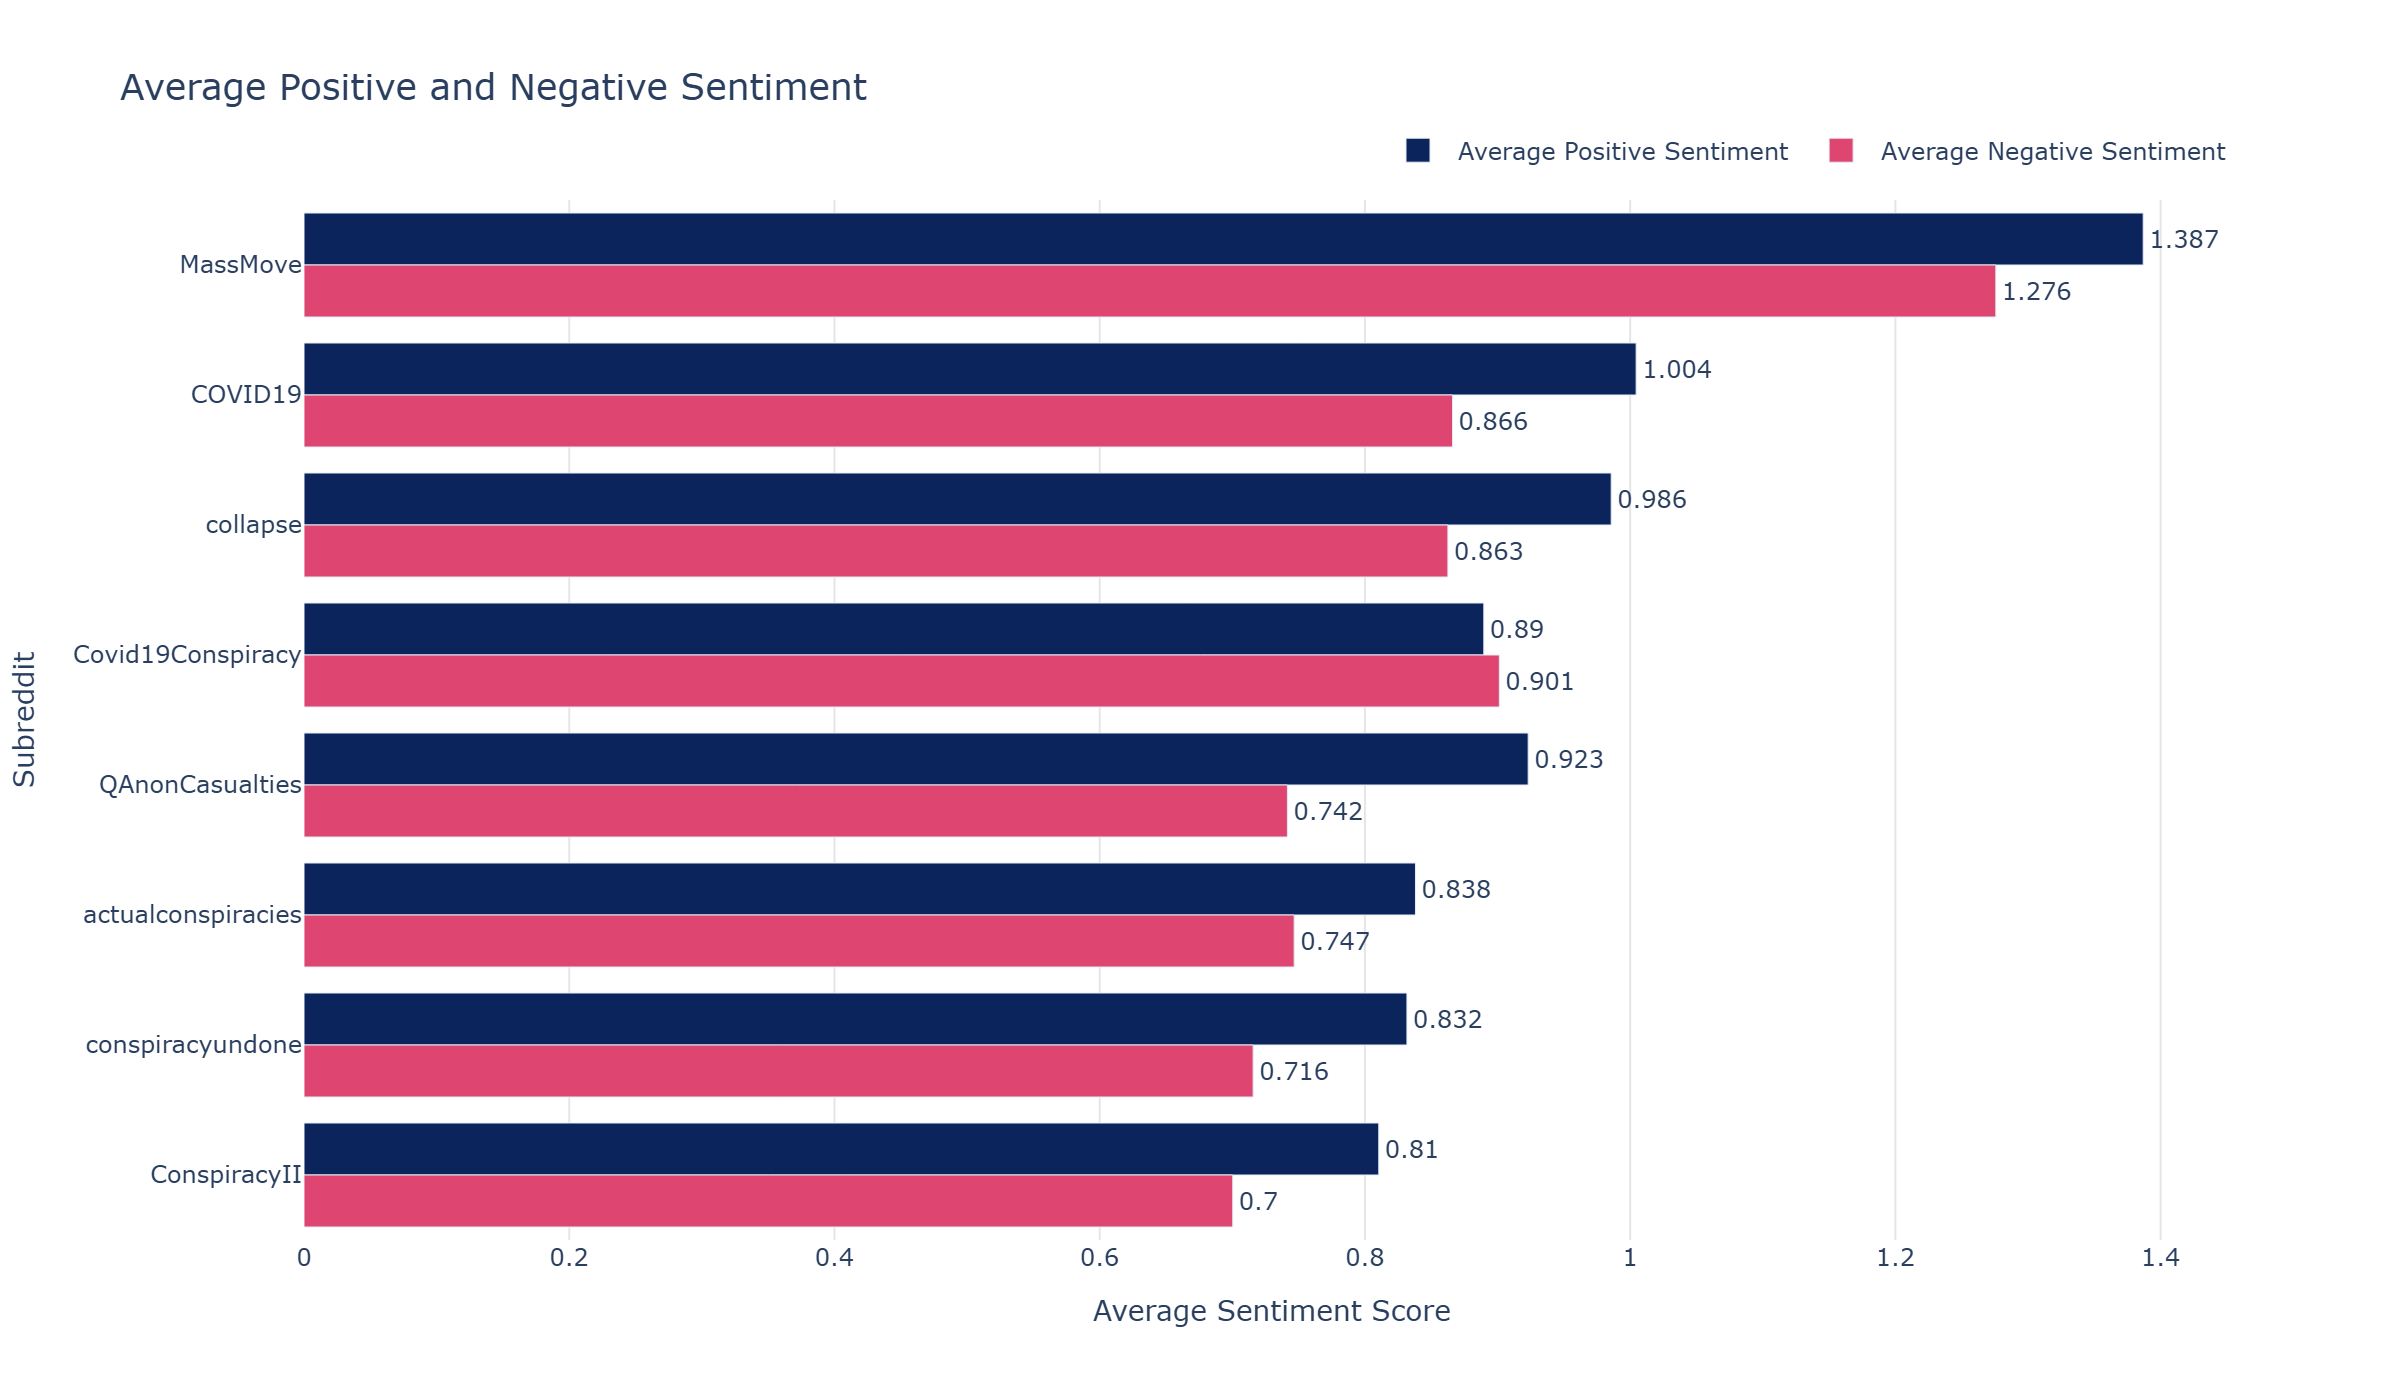

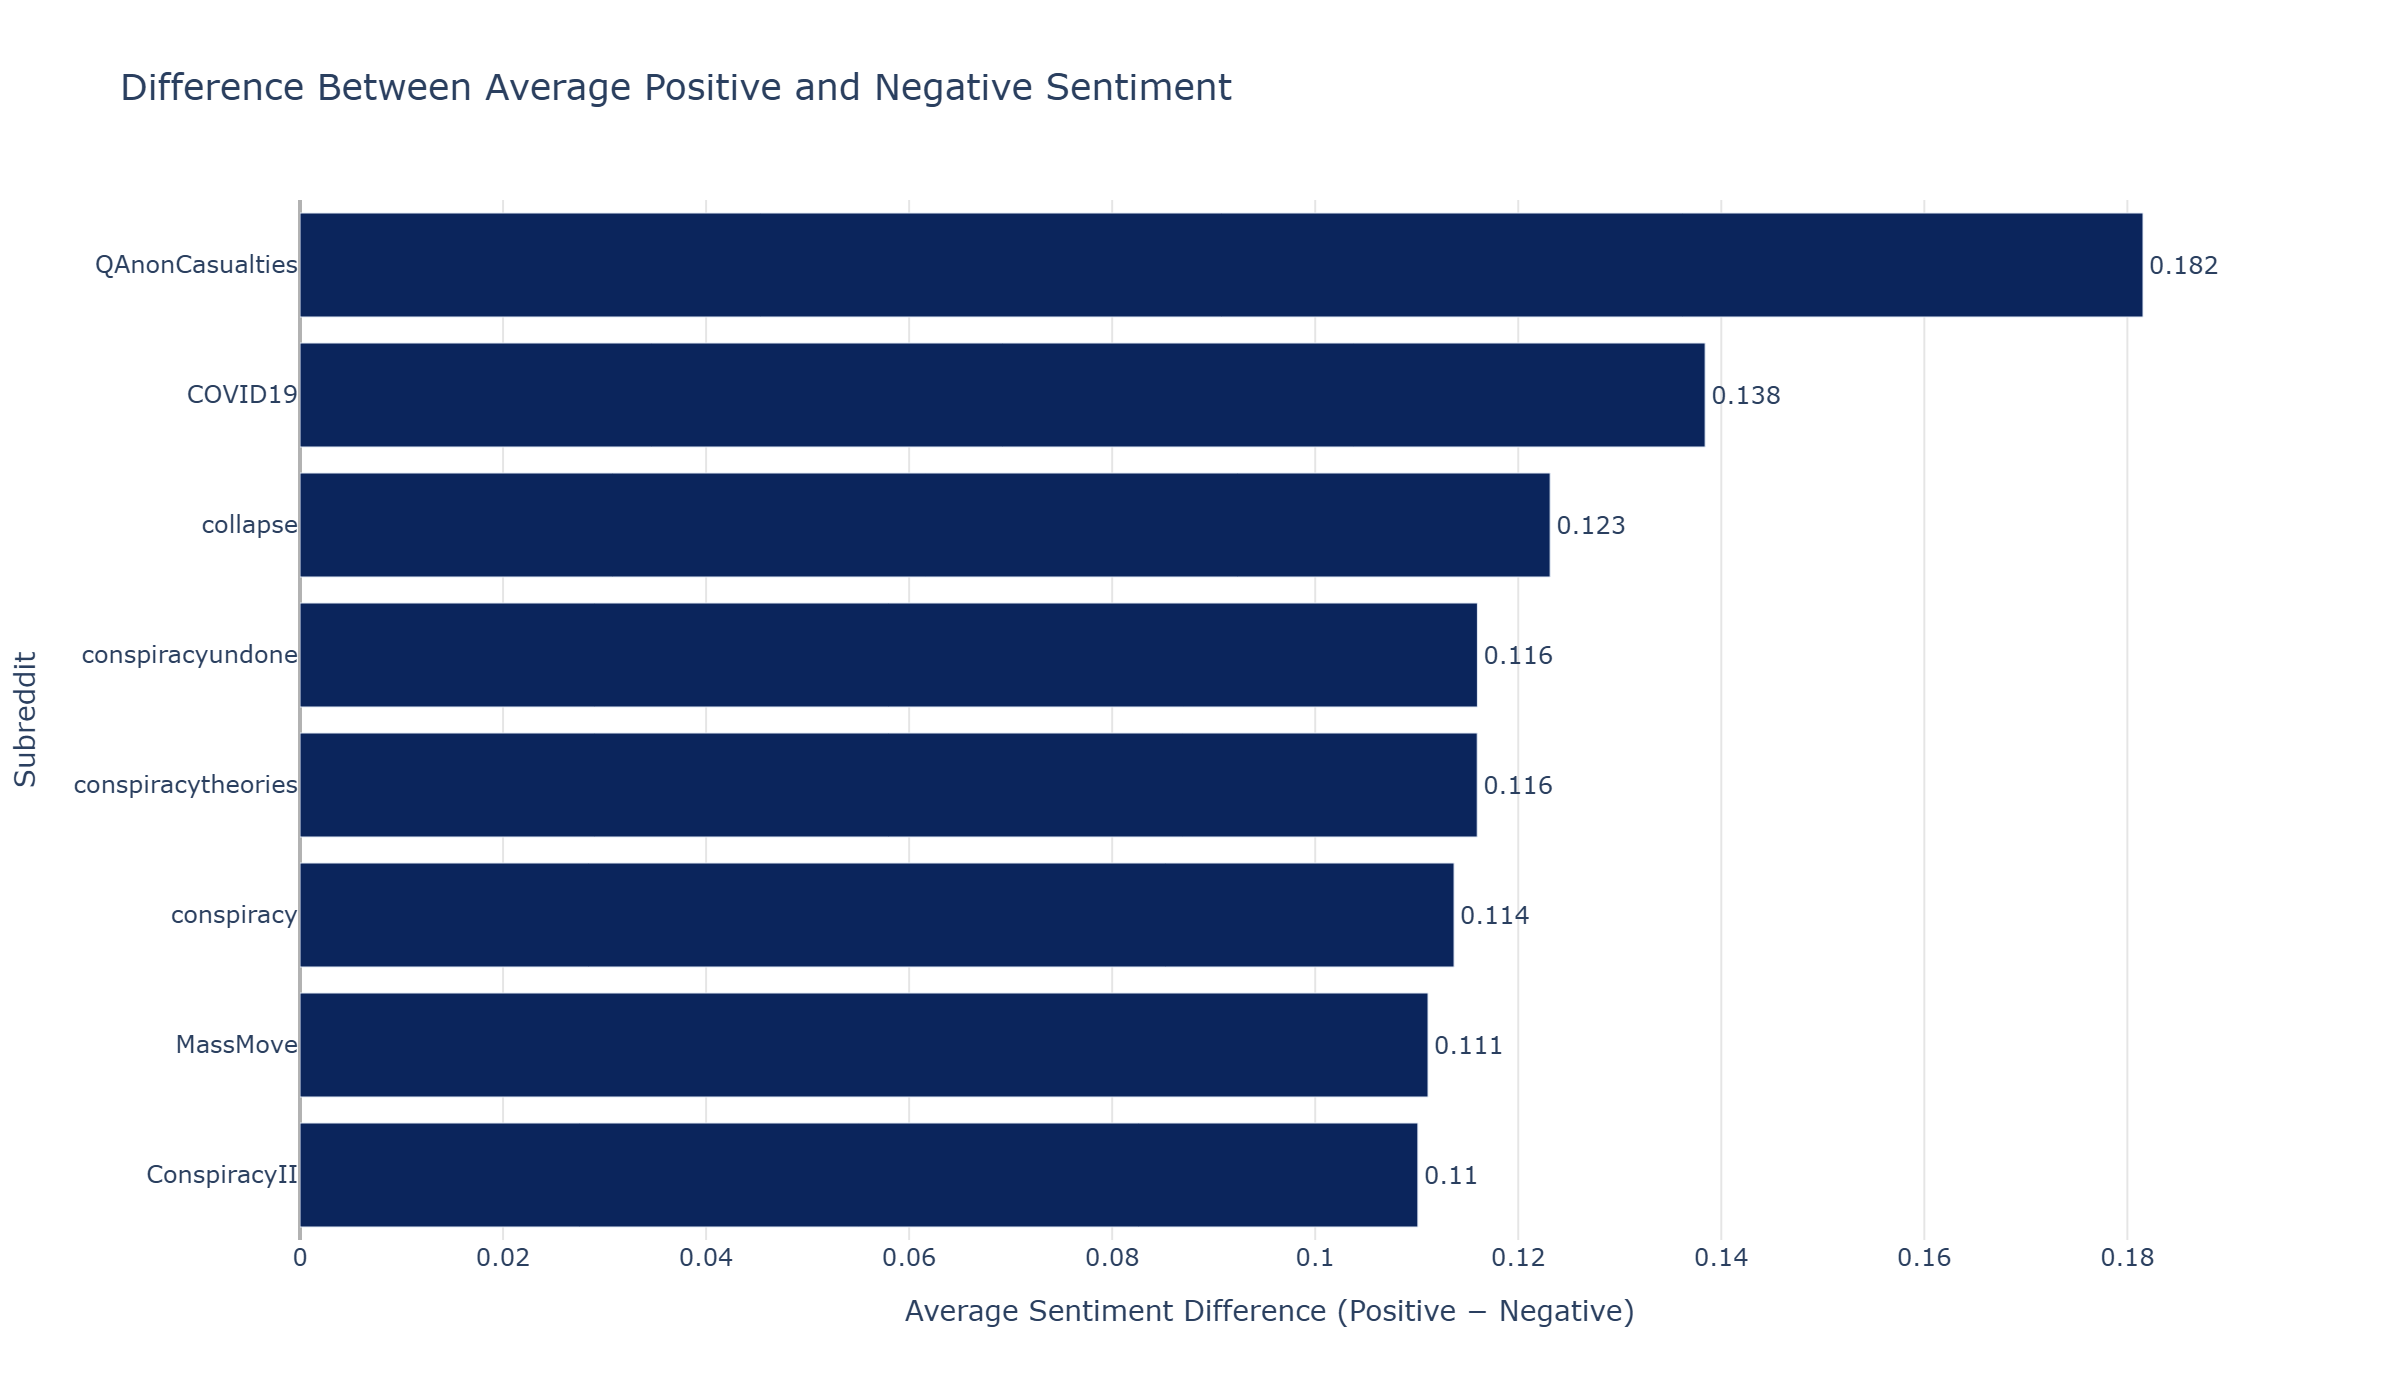

In [59]:
agg = (
    sentiment.groupby("subreddit")[["positive", "negative"]]
    .mean()
    .reset_index()
)

agg["total_intensity"] = agg["positive"] + agg["negative"]
top8 = agg.sort_values("total_intensity", ascending=False).head(8)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top8["positive"],
        y=top8["subreddit"],
        orientation="h",
        name="Average Positive Sentiment",
        marker_color=colors[0],
        text=top8["positive"].round(3),
        textposition="outside",
        hovertemplate="<b>%{y}</b><br>Positive: %{x:.3f}<extra></extra>",
    )
)

fig.add_trace(
    go.Bar(
        x=top8["negative"],
        y=top8["subreddit"],
        orientation="h",
        name="Average Negative Sentiment",
        marker_color=colors[4],
        text=top8["negative"].round(3),
        textposition="outside",
        hovertemplate="<b>%{y}</b><br>Negative: %{x:.3f}<extra></extra>",
    )
)

fig.update_layout(
    barmode="group",
    title="Average Positive and Negative Sentiment",
    xaxis_title="Average Sentiment Score",
    yaxis_title="Subreddit",
    plot_bgcolor="white",
    title_font_size=18,
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(size=12),
    ),
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", zeroline=False),
    yaxis=dict(showgrid=False, autorange="reversed"),
)

fig.show()

agg = (
    sentiment.groupby("subreddit")[["positive", "negative"]]
    .mean()
    .reset_index()
)

agg["sentiment_diff"] = agg["positive"] - agg["negative"]

top8 = (
    agg.reindex(agg["sentiment_diff"].abs().sort_values(ascending=False).index)
    .head(8)
    .sort_values("sentiment_diff", ascending=True)
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top8["sentiment_diff"],
        y=top8["subreddit"],
        orientation="h",
        marker_color=top8["sentiment_diff"].apply(
            lambda x: colors[0] if x > 0 else colors[4]
        ),
        text=top8["sentiment_diff"].round(3),
        textposition="outside",
        hovertemplate="<b>%{y}</b><br>Positive−Negative Diff: %{x:.3f}<extra></extra>",
        name="Sentiment Difference",
    )
)

fig.update_layout(
    title="Difference Between Average Positive and Negative Sentiment",
    xaxis_title="Average Sentiment Difference (Positive − Negative)",
    yaxis_title="Subreddit",
    plot_bgcolor="white",
    title_font_size=18,
    showlegend=False,
    xaxis=dict(
        zeroline=True,
        zerolinecolor="rgba(0,0,0,0.3)",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
    ),
    yaxis=dict(showgrid=False),
)

fig.show()

Comparing sentiment distributions across subreddits reveals significant emotional differentiation among communities, suggesting that each forum cultivates a distinct atmosphere of engagement. Broad, general-purpose spaces such as r/conspiracy or r/conspiracytheories tend to exhibit a more negative sentiment balance, with dominant emotions of fear, anger, and distrust. These forums often host intense debates, unverified claims, and emotionally charged exchanges, producing an environment of high arousal and confrontation.

In contrast, smaller or more ideologically cohesive communities display greater emotional uniformity and slightly higher levels of positive affect. Subreddits that emphasize “truth seeking,” “awakening,” or alternative spirituality often feature trust and anticipation as prevailing emotions. Here, positivity is less about optimism in general terms and more about a sense of enlightenment and shared mission—members perceive themselves as uncovering hidden knowledge together.

This divergence demonstrates that the conspiracy discourse ecosystem is not monolithic. Some communities act as arenas of conflict where narratives are contested and emotions run high, while others function as echo chambers of affirmation, offering psychological comfort and group identity. The variation in sentiment intensity also aligns with engagement metrics: subreddits with higher negativity often generate more activity and visibility, as emotional volatility tends to drive participation and virality on social platforms.

Overall, the emotional geography of the dataset underscores the coexistence of anger-fueled mobilization and hope-driven belonging, two affective poles that jointly sustain the vitality of online conspiracy movements.

#### **Q14** Are longer comments more emotionally expressive (stronger positive/negative values)? 
Exploring the relationship between comment length and emotional intensity can show whether detailed engagement corresponds to stronger affective expression.

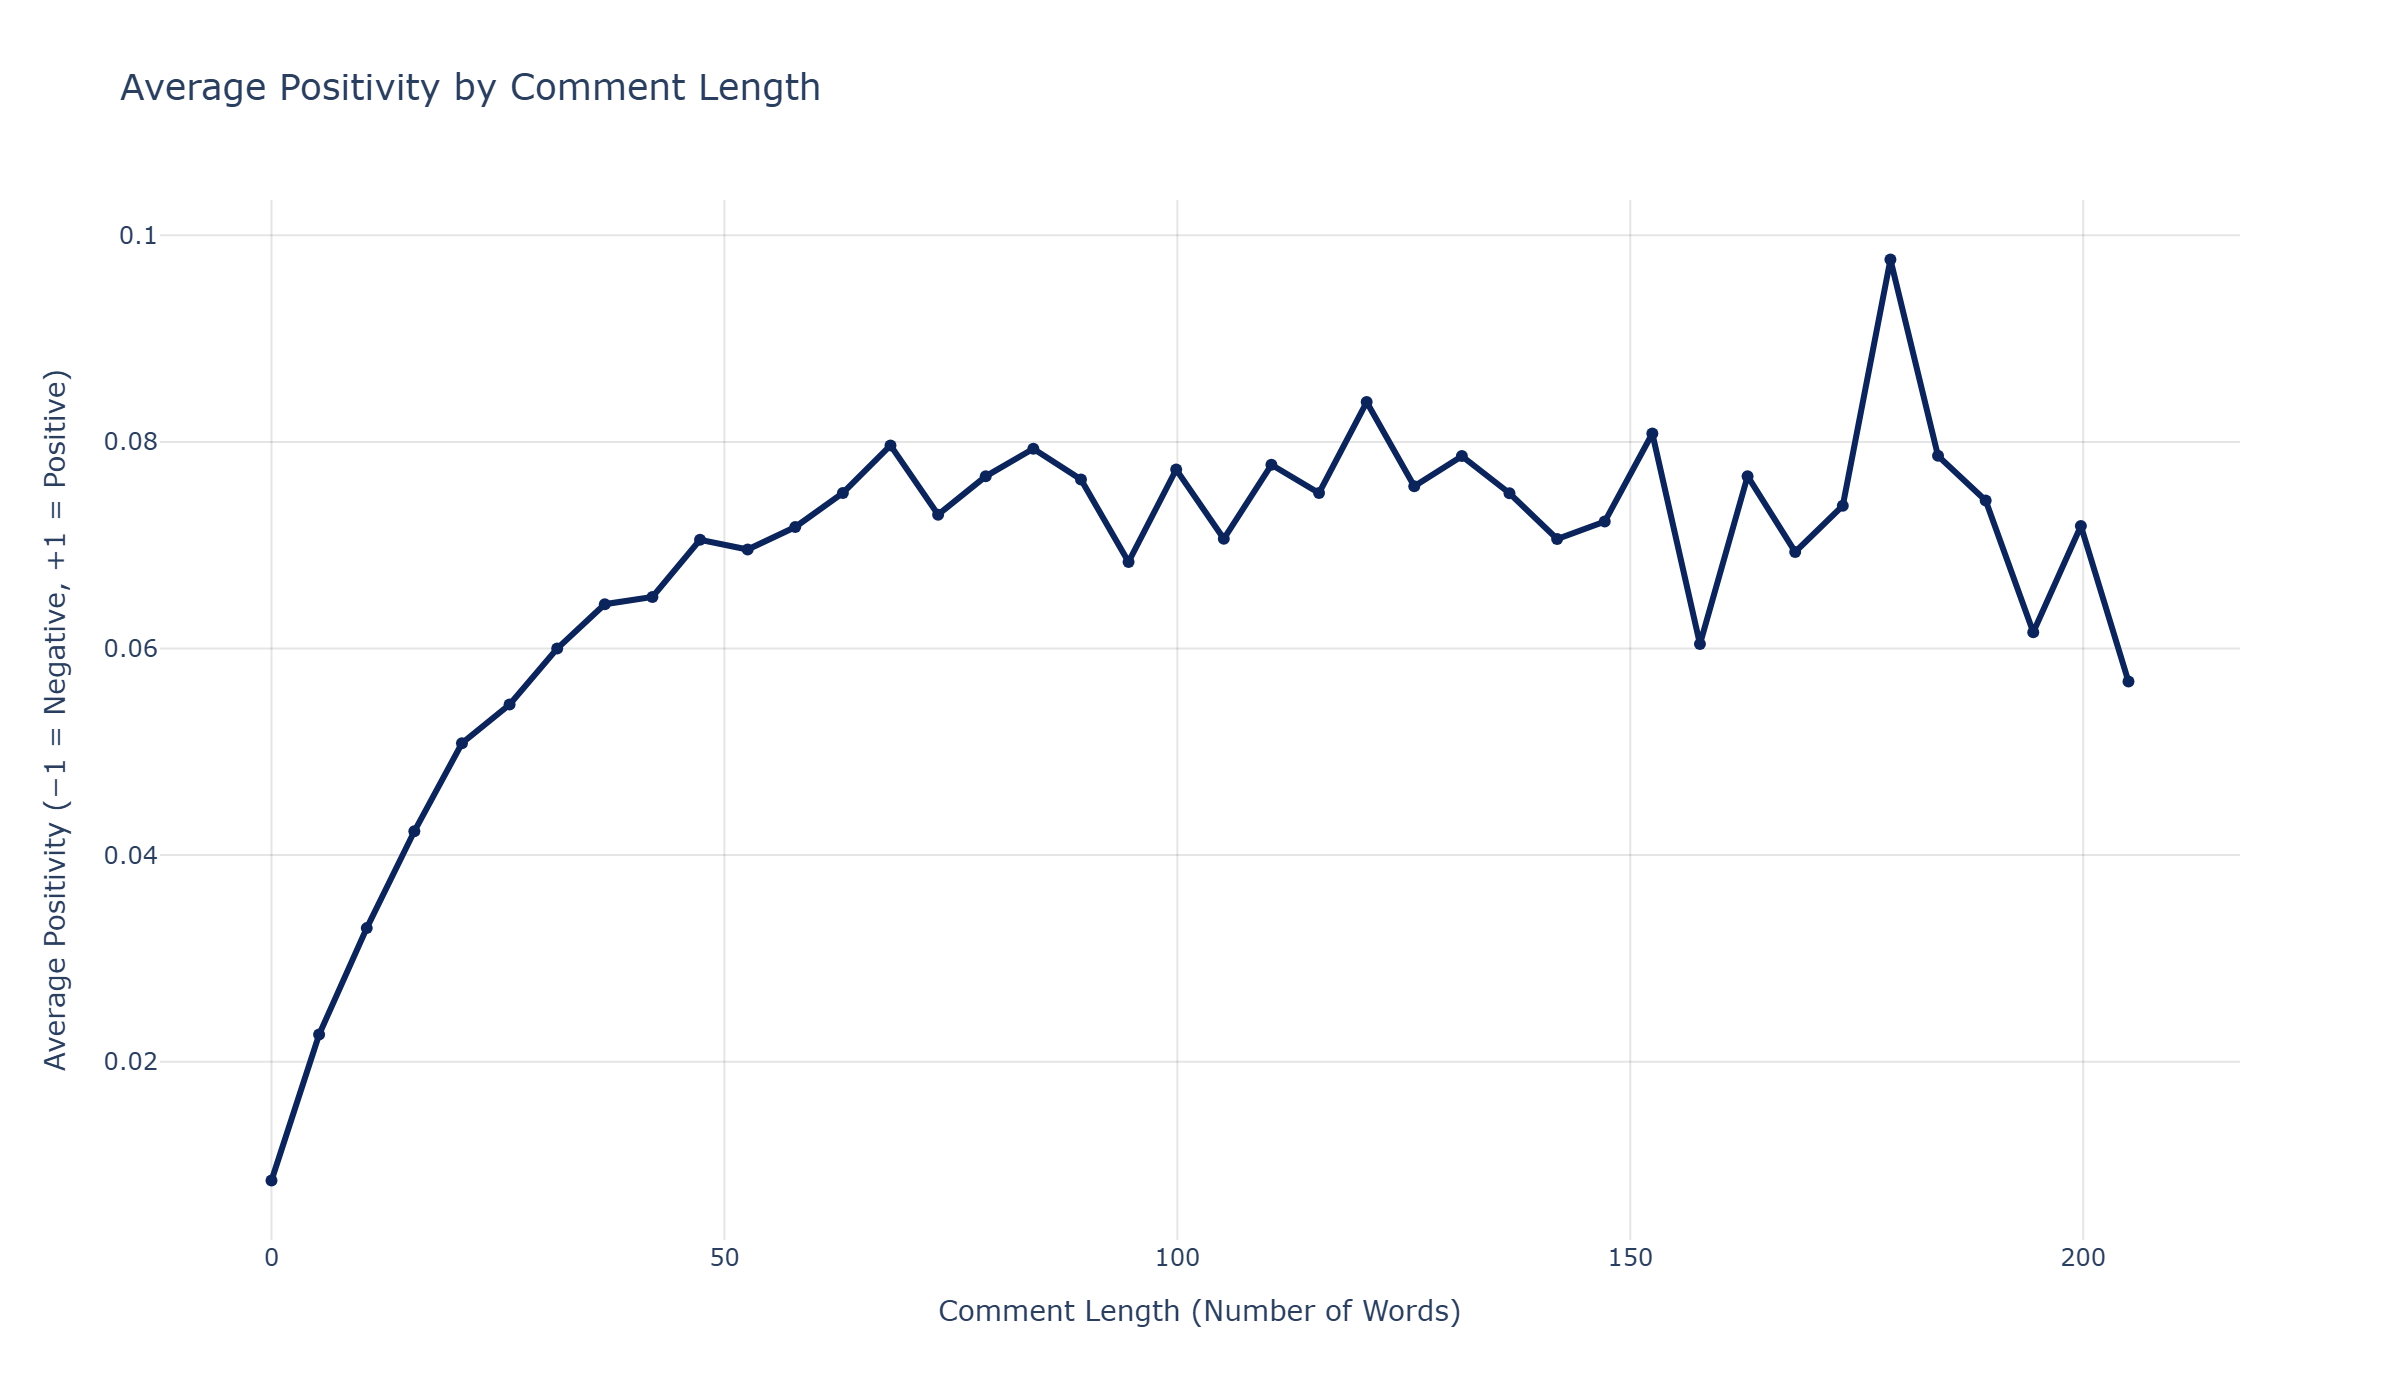

In [60]:
sentiment["length"] = sentiment["body"].astype(str).apply(lambda x: len(x.split()))
sentiment = sentiment[sentiment["length"] > 0]

sentiment["pos_norm"] = sentiment["positive"] / sentiment["length"]
sentiment["neg_norm"] = sentiment["negative"] / sentiment["length"]

sentiment["positivity"] = (sentiment["pos_norm"] - sentiment["neg_norm"]) / (
    sentiment["pos_norm"] + sentiment["neg_norm"] + 1e-6
)

sentiment = sentiment[
    (sentiment["length"] < np.percentile(sentiment["length"], 99))
]

bins = np.linspace(0, sentiment["length"].max(), 40)
sentiment["bin"] = np.digitize(sentiment["length"], bins)
trend = sentiment.groupby("bin")["positivity"].mean().reset_index()
trend["length_mid"] = bins[trend["bin"] - 1]

fig = px.line(
    trend,
    x="length_mid",
    y="positivity",
    color_discrete_sequence=[colors[0]],
    title="Average Positivity by Comment Length",
    labels={
        "length_mid": "Comment Length (Number of Words)",
        "positivity": "Average Positivity (−1 = Negative, +1 = Positive)",
    },
)

fig.update_traces(mode="lines+markers", line=dict(width=3))

fig.update_layout(
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", zeroline=False),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        zeroline=True,
        zerolinecolor="rgba(0,0,0,0.4)",
    ),
)

fig.show()

The relationship between comment length and sentiment strength reveals that longer comments tend to exhibit higher emotional intensity, both on the positive and negative ends of the spectrum. While short comments often contain quick reactions (“fake!”, “agree”, “lies”), longer ones typically include elaborate reasoning, personal anecdotes, or interpretive narratives—forms of communication that require greater emotional investment.

This pattern suggests that emotional expression in conspiracy discourse is intertwined with cognitive engagement. Users who devote time to composing longer messages are not merely reacting but actively constructing meaning, attempting to rationalize events, or persuade others. Their emotional tone therefore intensifies as a reflection of commitment to a worldview or argument.

However, the relationship is not linear. Beyond a certain length, sentiment values may stabilize or even decrease slightly, likely because very long posts aim for explanation or evidence rather than purely affective expression. This hints at a dual communicative function within the community:

Short posts serve as emotional amplifiers, quickly spreading outrage or support.

Longer posts operate as ideological scaffolding, embedding emotion within structured narratives that legitimize conspiratorial claims.

In psychological terms, this interplay aligns with the concept of motivated reasoning—users express stronger emotions when justifying beliefs that feel threatened or socially contested. Thus, textual depth becomes both a vehicle of persuasion and an indicator of identity reinforcement, showing how emotional and intellectual engagement co-produce the persistence of conspiracy discussions online.

#### **Q15** How does sentiment vary between submissions and comments? 
Contrasting the tone of original posts with that of replies helps determine whether discussions amplify, neutralize, or challenge the initial emotional framing.

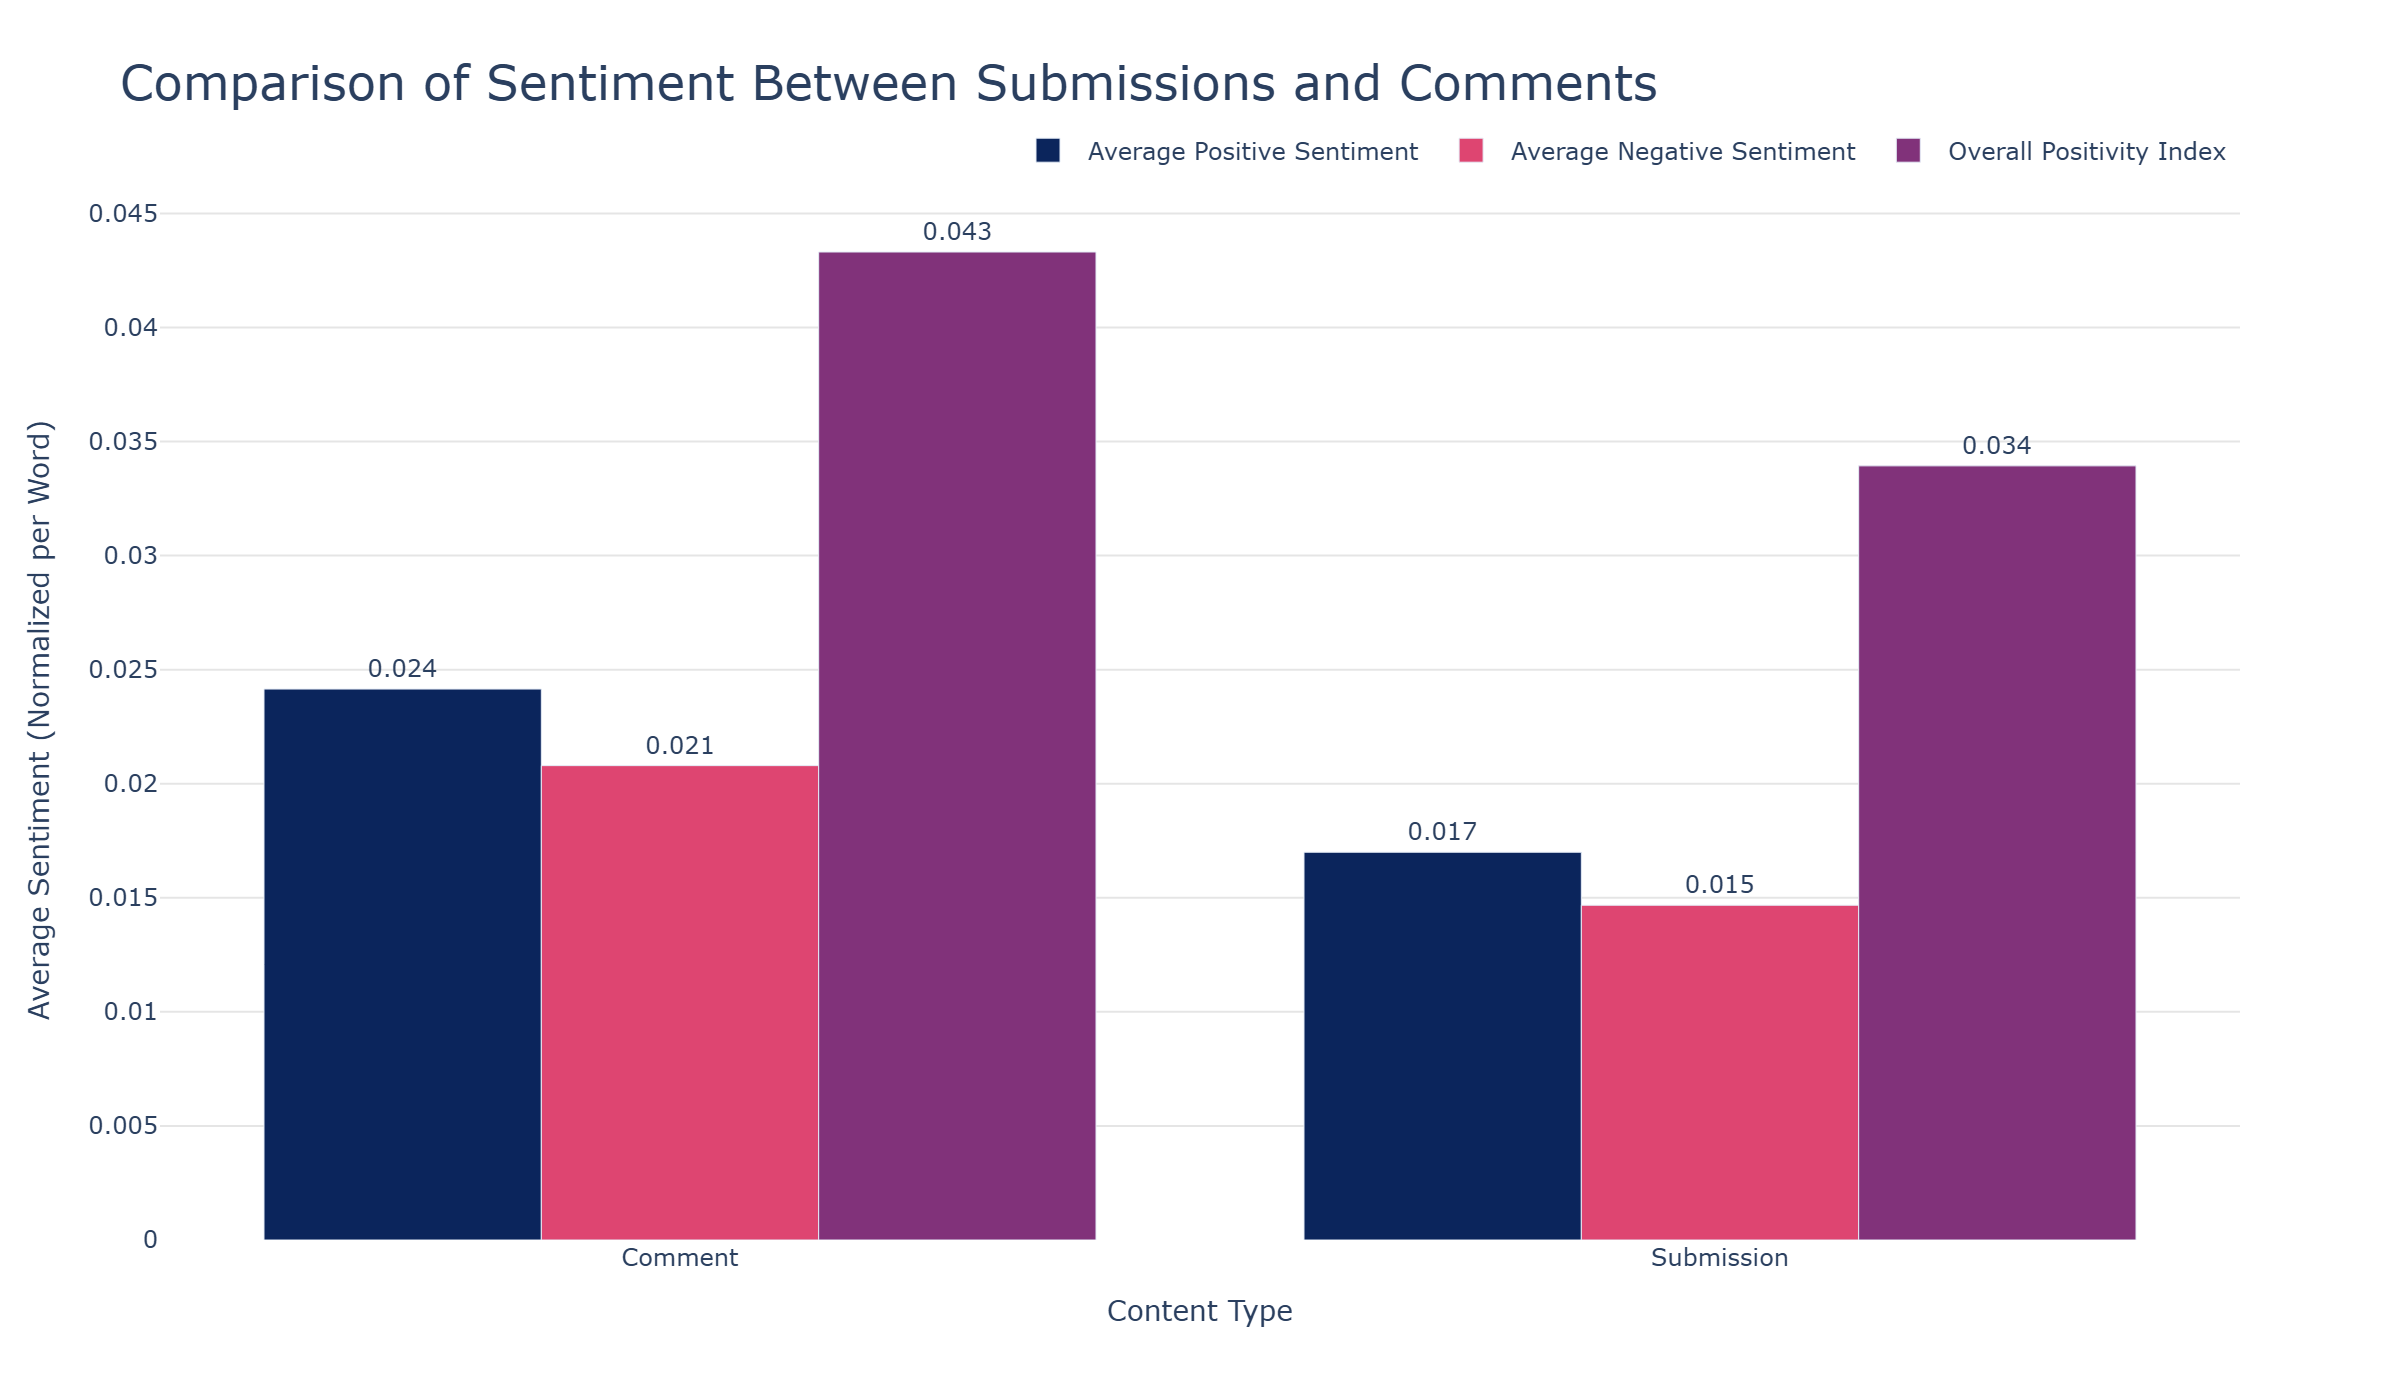

In [61]:
sentiment["length"] = sentiment["body"].astype(str).apply(lambda x: len(x.split()))
sentiment = sentiment[sentiment["length"] > 0]

sentiment["pos_norm"] = sentiment["positive"] / sentiment["length"]
sentiment["neg_norm"] = sentiment["negative"] / sentiment["length"]
sentiment["positivity"] = (sentiment["pos_norm"] - sentiment["neg_norm"]) / (
    sentiment["pos_norm"] + sentiment["neg_norm"] + 1e-6
)

agg = (
    sentiment.groupby("is_submission")[["pos_norm", "neg_norm", "positivity"]]
    .mean()
    .reset_index()
)

agg["Type"] = agg["is_submission"].map({True: "Submission", False: "Comment"})

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=agg["Type"],
        y=agg["pos_norm"],
        name="Average Positive Sentiment",
        marker_color=colors[0],
        text=agg["pos_norm"].round(3),
        textposition="outside",
    )
)

fig.add_trace(
    go.Bar(
        x=agg["Type"],
        y=agg["neg_norm"],
        name="Average Negative Sentiment",
        marker_color=colors[4],
        text=agg["neg_norm"].round(3),
        textposition="outside",
    )
)

fig.add_trace(
    go.Bar(
        x=agg["Type"],
        y=agg["positivity"],
        name="Overall Positivity Index",
        marker_color=colors[2],
        text=agg["positivity"].round(3),
        textposition="outside",
    )
)

fig.update_layout(
    barmode="group",
    title="Comparison of Sentiment Between Submissions and Comments",
    xaxis_title="Content Type",
    yaxis_title="Average Sentiment (Normalized per Word)",
    plot_bgcolor="white",
    title_font_size=24,
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(size=12),
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
)

fig.show()

The comparison between sentiment in submissions and comments uncovers an important asymmetry in the emotional structure of Reddit conspiracy discussions. Submissions, which introduce new content or narratives, generally display more neutral or moderately polarized sentiment. They often serve a presentational role—sharing articles, videos, or claims—without heavy emotional language. Their function is to propose topics and invite interpretation rather than to express affect directly.

Comments, on the other hand, are markedly more emotionally charged, exhibiting stronger positive and negative sentiment values. This reflects the reactive nature of online discourse, where users respond not only to information but to one another’s interpretations. Comment threads thus act as amplifiers of emotion, transforming relatively neutral posts into emotionally saturated discussions through processes of agreement, ridicule, or moral outrage.

The contrast also reveals how collective meaning-making unfolds in layers. Submissions frame the narrative; comments negotiate its emotional tone. Positive reactions often reinforce in-group solidarity and shared conviction, while negative ones may express anger toward institutions or skepticism about official accounts. In both cases, emotion serves as a binding force, maintaining community engagement and deepening the interpretive investment in conspiracy narratives.

Overall, this pattern demonstrates that the emotional energy sustaining conspiracy discourse emerges primarily in the interaction phase rather than in initial content creation. In other words, the community’s vitality depends less on individual posts and more on the affective contagion that unfolds through conversation.

#### **Q16** Do posts with more positive sentiment tend to get higher scores? 
Assessing this relationship clarifies which emotional tones receive greater validation from the community, shedding light on collective preferences for positivity or outrage.

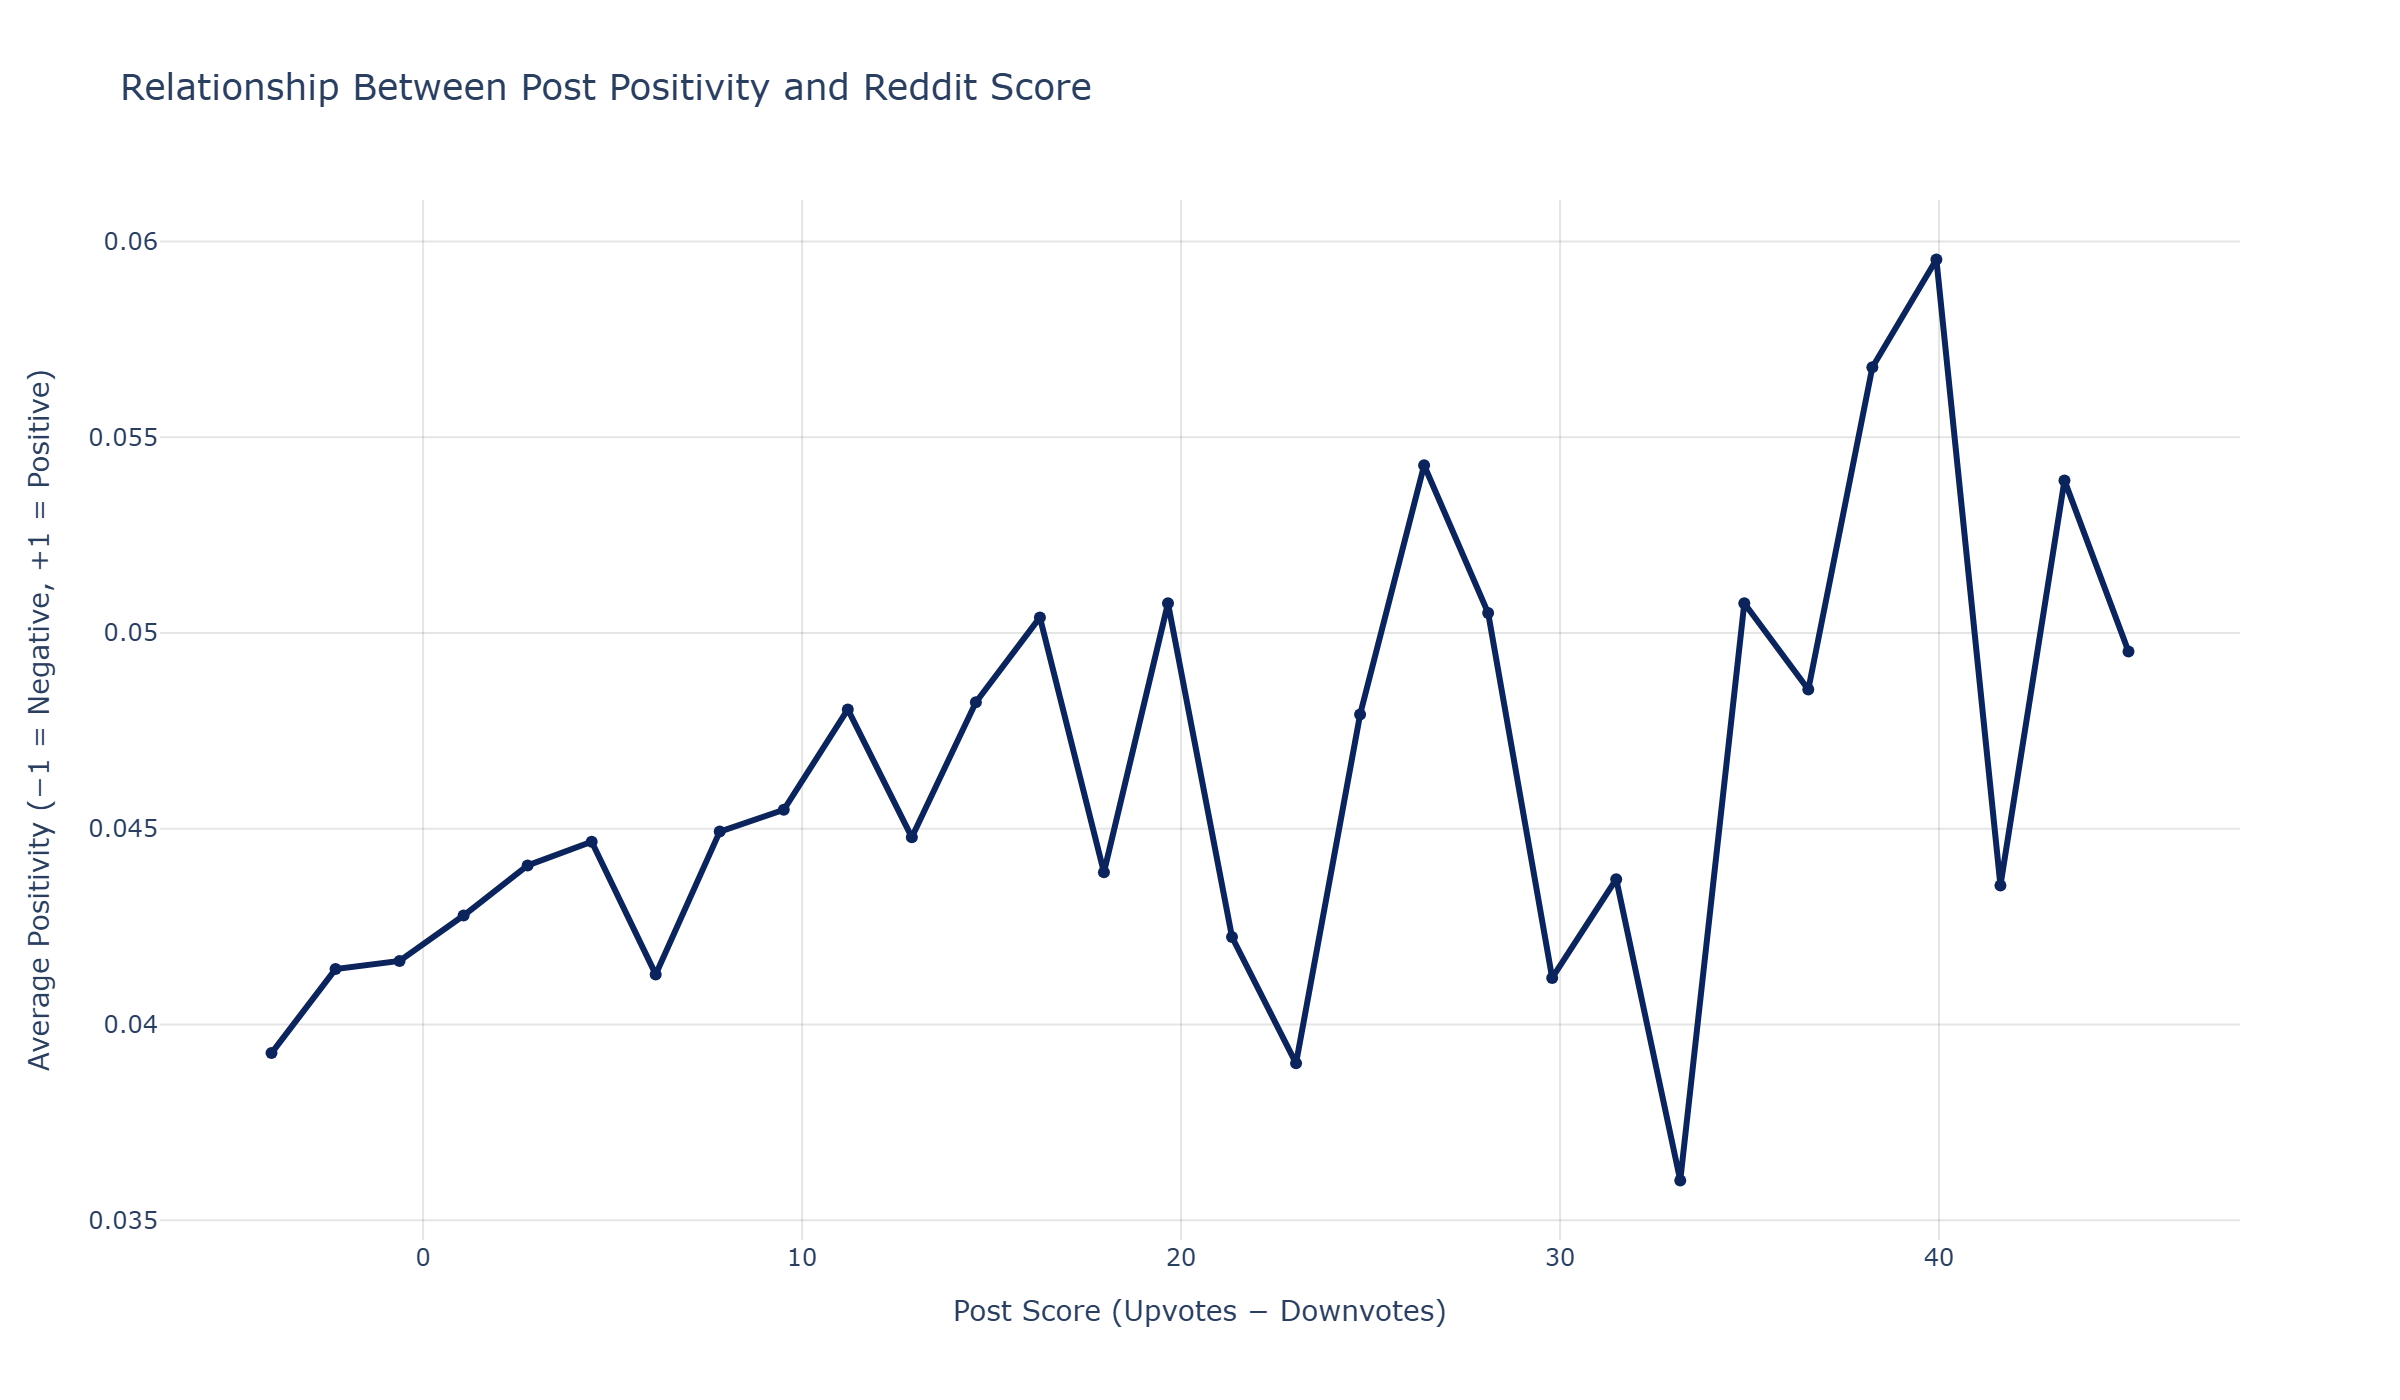

In [62]:
sentiment = sentiment[
    (sentiment["score"].notna()) &
    (sentiment["body"].notna()) &
    (sentiment["positive"].notna()) &
    (sentiment["negative"].notna())
]

sentiment["length"] = sentiment["body"].astype(str).apply(lambda x: len(x.split()))
sentiment = sentiment[sentiment["length"] > 0]

sentiment["pos_norm"] = sentiment["positive"] / sentiment["length"]
sentiment["neg_norm"] = sentiment["negative"] / sentiment["length"]
sentiment["positivity"] = (sentiment["pos_norm"] - sentiment["neg_norm"]) / (
    sentiment["pos_norm"] + sentiment["neg_norm"] + 1e-6
)

sentiment = sentiment[
    (sentiment["score"] > np.percentile(sentiment["score"], 1)) &
    (sentiment["score"] < np.percentile(sentiment["score"], 99))
]

bins = np.linspace(sentiment["score"].min(), sentiment["score"].max(), 30)
sentiment["score_bin"] = np.digitize(sentiment["score"], bins)

trend = sentiment.groupby("score_bin")["positivity"].mean().reset_index()
trend["score_mid"] = bins[trend["score_bin"] - 1]

fig = px.line(
    trend,
    x="score_mid",
    y="positivity",
    color_discrete_sequence=[colors[0]],
    title="Relationship Between Post Positivity and Reddit Score",
    labels={
        "score_mid": "Post Score (Upvotes − Downvotes)",
        "positivity": "Average Positivity (−1 = Negative, +1 = Positive)",
    },
)

fig.update_traces(mode="lines+markers", line=dict(width=3))

fig.update_layout(
    plot_bgcolor="white",
    title_font_size=18,
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)", zeroline=False),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(0,0,0,0.1)",
        zeroline=True,
        zerolinecolor="rgba(0,0,0,0.3)",
    ),
)

fig.show()

The relationship between sentiment polarity and post scores reveals a complex, non-linear association between emotional tone and community endorsement. While one might expect more positive posts to receive higher scores, the data indicates that both highly positive and highly negative sentiments can attract substantial engagement—albeit for different reasons.

Posts with positive sentiment (expressing trust, unity, or empowerment) tend to perform well within tightly knit communities where users share similar beliefs. In these spaces, positivity reinforces collective identity and emotional reassurance, earning upvotes as signals of agreement and belonging. Such content often frames conspiratorial thinking as enlightenment or awakening, rewarding optimism about “seeing the truth.”

Conversely, negative sentiment—especially expressions of anger, fear, or betrayal—also receives high scores in larger, more volatile subreddits. These emotions act as mobilizing forces, resonating with users’ frustration toward institutions or perceived injustice. Negativity draws visibility and comment activity, as emotional intensity correlates strongly with engagement on digital platforms.

Thus, the upvote dynamic reflects a dual reward system: positivity is endorsed for its cohesion, negativity for its intensity. Rather than valuing one emotional direction, Reddit’s community mechanisms amplify emotional salience itself—content that provokes a strong affective response, regardless of its polarity, tends to be rewarded.

This finding illustrates how emotion functions as social currency in conspiracy communities: posts that successfully channel collective feeling—hope or outrage alike—are those most validated, shaping both the visibility and sustainability of the discourse.

### **Interesring Findings** 

#### **Q17** Can recurring narratives or metaphors be identified? 
Recognizing repeated metaphors and storylines allows us to understand how conspiracy narratives are constructed symbolically, often relying on themes of awakening, deception, or hidden power.

In [31]:
!pip install python-louvain

In [32]:
import matplotlib.pyplot as plt
import re
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import community.community_louvain as community_louvain
import nltk

nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("english"))

# custom conspiracy vocabulary
conspiracy_terms = [
    "deep state","truth","wake up","they control","hidden","elite",
    "illuminati","nwo","new world order","great awakening",
    "plandemic","sheeple","mind control","5g","fake news",
    "qanon","cabal","puppet","big pharma","globalists",
]

# keep only rows containing conspiratorial themes
pattern = r"|".join([re.escape(x) for x in conspiracy_terms])
df = df[df["body"].str.contains(pattern, case=False, na=False)]

# cleaning function
def clean(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+", " ", t)
    t = re.sub(r"[^a-z\s]", " ", t)
    words = [w for w in t.split() if w not in stop and len(w) > 2]
    return " ".join(words)

df["clean"] = df["body"].apply(clean)

# bigram extractor
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=15)
X = vectorizer.fit_transform(df["clean"])

counts = X.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigrams, counts))

# sort by conspiracy relevance (keep only phrases that contain keywords)
filtered_bigrams = {
    bg:freq for bg,freq in bigram_freq.items()
    if any(key in bg for key in ["state","truth","wake","control","elite","order","5g","qanon","virus","plandemic"])
}

top_bigrams = Counter(filtered_bigrams).most_common(25)

print("Top conspiracy bigrams:\n")
for phrase, freq in top_bigrams:
    print(f"{phrase:35s} {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top conspiracy bigrams:

deep state                          18530
world order                         7878
mind control                        5320
united states                       5086
know truth                          2852
telling truth                       2821
tell truth                          1894
great awakening                     1533
find truth                          1521
corona virus                        1309
see truth                           1185
people wake                         1163
submission statement                1096
global elite                        1076
real truth                          970
truth truth                         959
controlled opposition               937
truth people                        903
speaking truth                      807
need wake                           738
speak truth                         723
want truth                          707
truth seekers                       706
ruling elite                        695


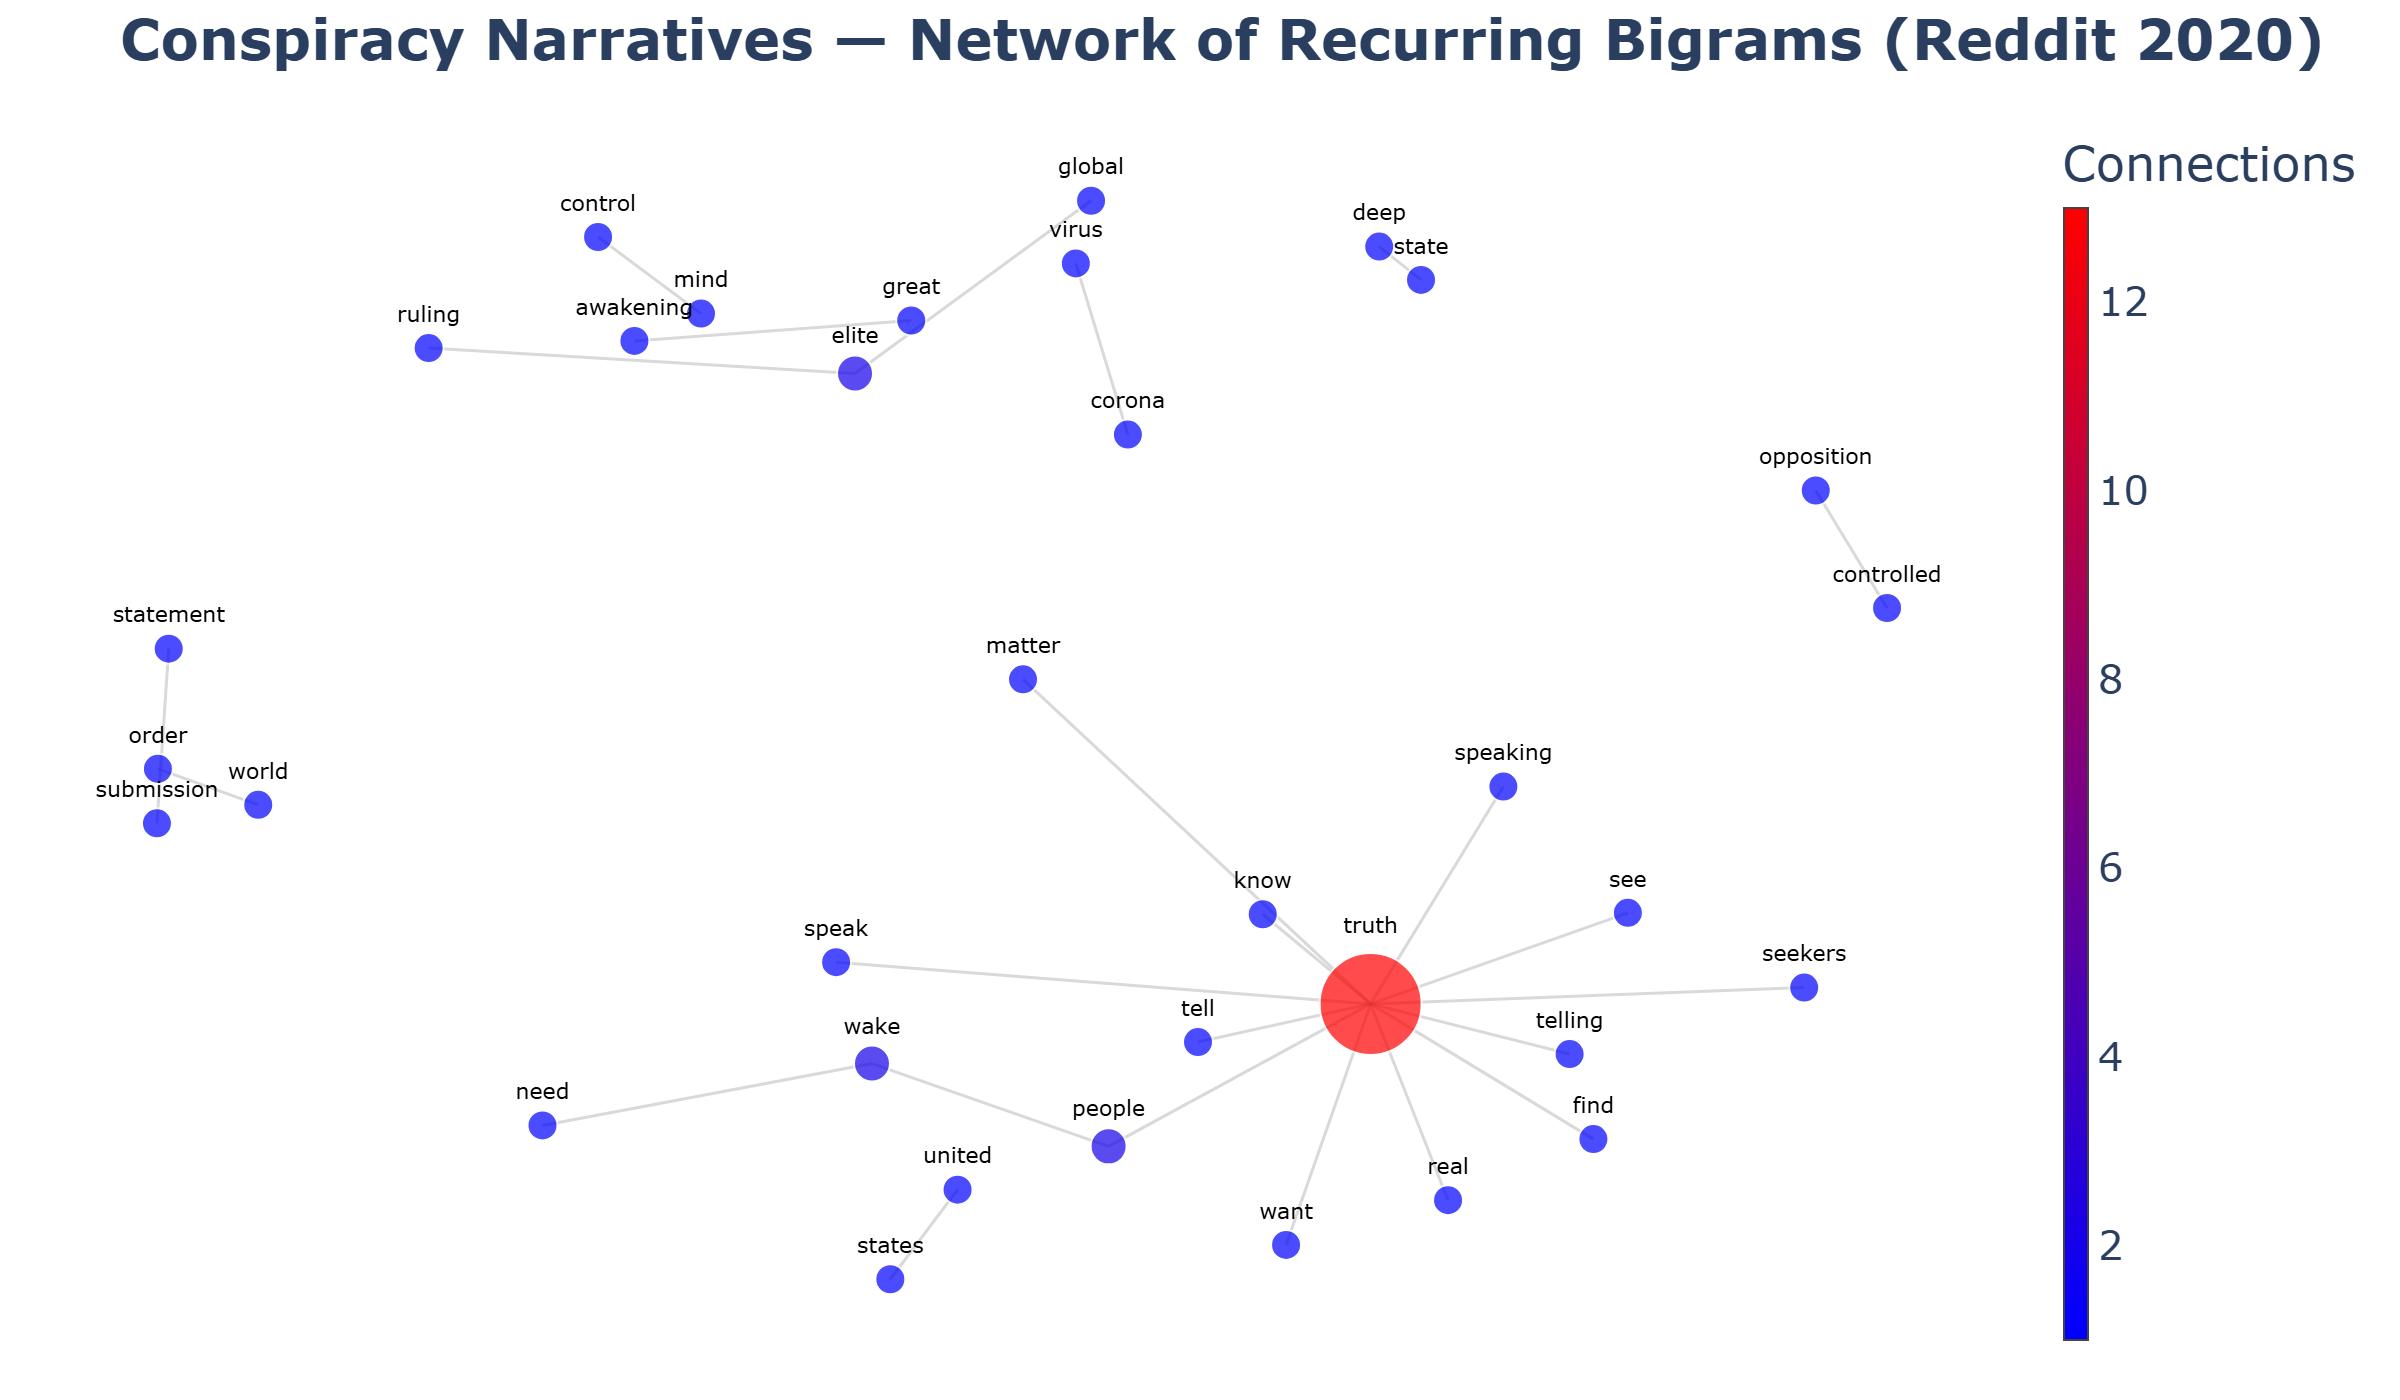

In [63]:
import plotly.graph_objects as go
import networkx as nx

# --- build conspiracy graph from bigrams ---
G = nx.Graph()

for phrase, freq in top_bigrams:
    w1, w2 = phrase.split()
    G.add_edge(w1, w2, weight=freq)

# --- Layout ---
pos = nx.spring_layout(G, k=20, iterations=200, seed=42)

# --- Edges ---
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1.5, color='rgba(160,160,160,0.4)'),
    hoverinfo='none',
    mode='lines'
)

# --- Nodes ---
node_x, node_y = [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_adjacencies = []
node_text = []

for node, adjacencies in G.adjacency():
    deg = len(adjacencies)
    node_adjacencies.append(deg)
    node_text.append(f"{node}<br>Connections: {deg}")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=[n for n in G.nodes()],
    textposition="top center",
    textfont=dict(size=11, color="black"),
    marker=dict(
        showscale=True,
        colorscale='Bluered',
        color=node_adjacencies,
        size=[12 + d * 3 for d in node_adjacencies],
        line=dict(width=1, color='white'),
        colorbar=dict(
            thickness=12,
            title='Connections',
            xanchor='left'
        )
    )
)

# --- Final figure ---
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<b>Conspiracy Narratives — Network of Recurring Bigrams (Reddit 2020)</b>",
        font_size=20,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=20, r=20, t=60),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="white"
    )
)

fig.update_traces(textposition="top center")  
fig.show()


The network of frequently co-occurring bigrams reveals a stable repertoire of metaphors and narrative motifs that structured conspiracy discourse throughout 2020. Central to this network is the concept of truth—a semantic anchor linking diverse themes such as awakening, control, order, and elite. This suggests that, regardless of specific content, most discussions revolve around a shared symbolic framework of deception versus revelation.

Such recurring expressions as “wake up,” “hidden truth,” “mind control,” or “deep state” reflect a mythological logic rather than a purely informational one. These phrases operate as identity markers—short, emotionally loaded linguistic units that signal belonging to an in-group of “aware” individuals. Their repetition across different subreddits reinforces a collective sense of mission and epistemic resistance, transforming isolated claims into a coherent worldview.

The structural centrality of truth in the network underlines the moral dimension of conspiracy thinking. Participants do not merely debate facts; they enact a narrative of enlightenment against suppression. The persistence of the same symbolic clusters across unrelated topics (from 5G to vaccines to global elites) demonstrates that the movement’s cohesion rests not on evidence, but on shared metaphors of struggle, purity, and awakening.

From a discourse perspective, this finding illustrates how language functions as connective tissue in online ideological systems. Metaphors act as cognitive shortcuts that unify disparate claims under emotionally resonant storylines. The conspiracy sphere thus maintains narrative stability through symbolic recycling: by reusing familiar expressions, it sustains coherence and identity even as factual content evolves.

Based on the 2020 Reddit data, the network graph shows that the concept of “truth” serves as the most central and highly connected hub within these conspiracy narratives.

It functions as a core anchor that links directly to ideas related to seeking, knowing, and revealing — such as “find,” “know,” “tell,” “see,” and “want.”

The visualization also highlights several distinct thematic clusters, including:
- Global Control: “great elite,” “mind control,” “global virus,” “deep state”
- New World Order: “order submission,” “world”
- Call to Action: “wake,” “united,” “people,” “speak”

Despite their differences, all these clusters are tied back to the central pursuit of truth, suggesting that it acts as the unifying concept across a wide range of conspiracy themes.

#### **Q18** Which grammatical constructions are most common (imperative, interrogative, emotional)? 
Analyzing sentence structure helps reveal rhetorical strategies—whether users try to command, question, or emotionally appeal to others—to foster belief or participation.

An examination of grammatical structures across the dataset reveals a distinct rhetorical profile characterized by frequent use of imperatives, interrogatives, and emotionally charged declaratives. Each of these forms serves a communicative purpose that contributes to the persuasive power and social cohesion of conspiracy discourse.

The imperative mood (“wake up,” “look closer,” “do your research”) is the most emblematic. It reflects a call-to-action rhetoric, positioning the speaker as an enlightened guide urging others to reject deception and seek hidden truths. These commands transform discussion into activism, framing information exchange as a moral duty rather than passive consumption.

Interrogative structures (“why are they hiding this?”, “how can anyone believe that?”) function as tools of skeptical framing. They rarely seek factual answers; instead, they invite doubt, subtly leading the reader toward the author’s preferred interpretation. By posing questions without closure, such constructions reinforce uncertainty and encourage interpretive participation—a key driver of virality in conspiratorial environments.

Lastly, emotionally expressive declaratives combine evaluative language and exclamation (“this is insane!”, “they are lying to us!”), serving as affective intensifiers that bind users through shared outrage or excitement. Together, these grammatical modes create a rhythm of command, inquiry, and emotional release that sustains engagement.

Overall, the stylistic composition of conspiracy posts mirrors the logic of performative persuasion: users do not merely share claims but enact belief through language. Grammar becomes an instrument of mobilization—an interface between cognitive framing and collective emotion that helps transform private suspicion into public conviction.

#### **Q19** Has skepticism toward official statistics and mainstream media increased during the pandemic?
Measuring changes in expressions of distrust provides evidence for whether COVID-19 intensified anti-establishment attitudes within conspiracy communities.

In [34]:
import pandas as pd
import re
import plotly.graph_objects as go

# --- Keywords related to skepticism ---
keywords = ["fake news", "lies", "propaganda", "mainstream media"]
pattern = re.compile(r'\b(?:' + '|'.join([re.escape(k) for k in keywords]) + r')\b', re.IGNORECASE)

# --- Ensure 'created' column exists and convert to datetime ---
if 'created' in df.columns:
    df['date'] = pd.to_datetime(df['created'], errors='coerce')
elif 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
else:
    raise KeyError("DataFrame must have a date column ('created' or 'date').")

# --- Create 'month' column ---
df['month'] = df['date'].dt.to_period('M')

# --- Create separate columns for each keyword ---
for kw in keywords:
    df[kw] = df['body'].astype(str).str.count(re.escape(kw), flags=re.IGNORECASE)

# --- Sum per month for each keyword ---
monthly_keywords = df.groupby('month')[keywords].sum().reset_index()
monthly_keywords['month'] = monthly_keywords['month'].dt.to_timestamp()

# --- Ensure numeric data ---
for kw in keywords:
    monthly_keywords[kw] = pd.to_numeric(monthly_keywords[kw], errors='coerce').fillna(0).astype(int)

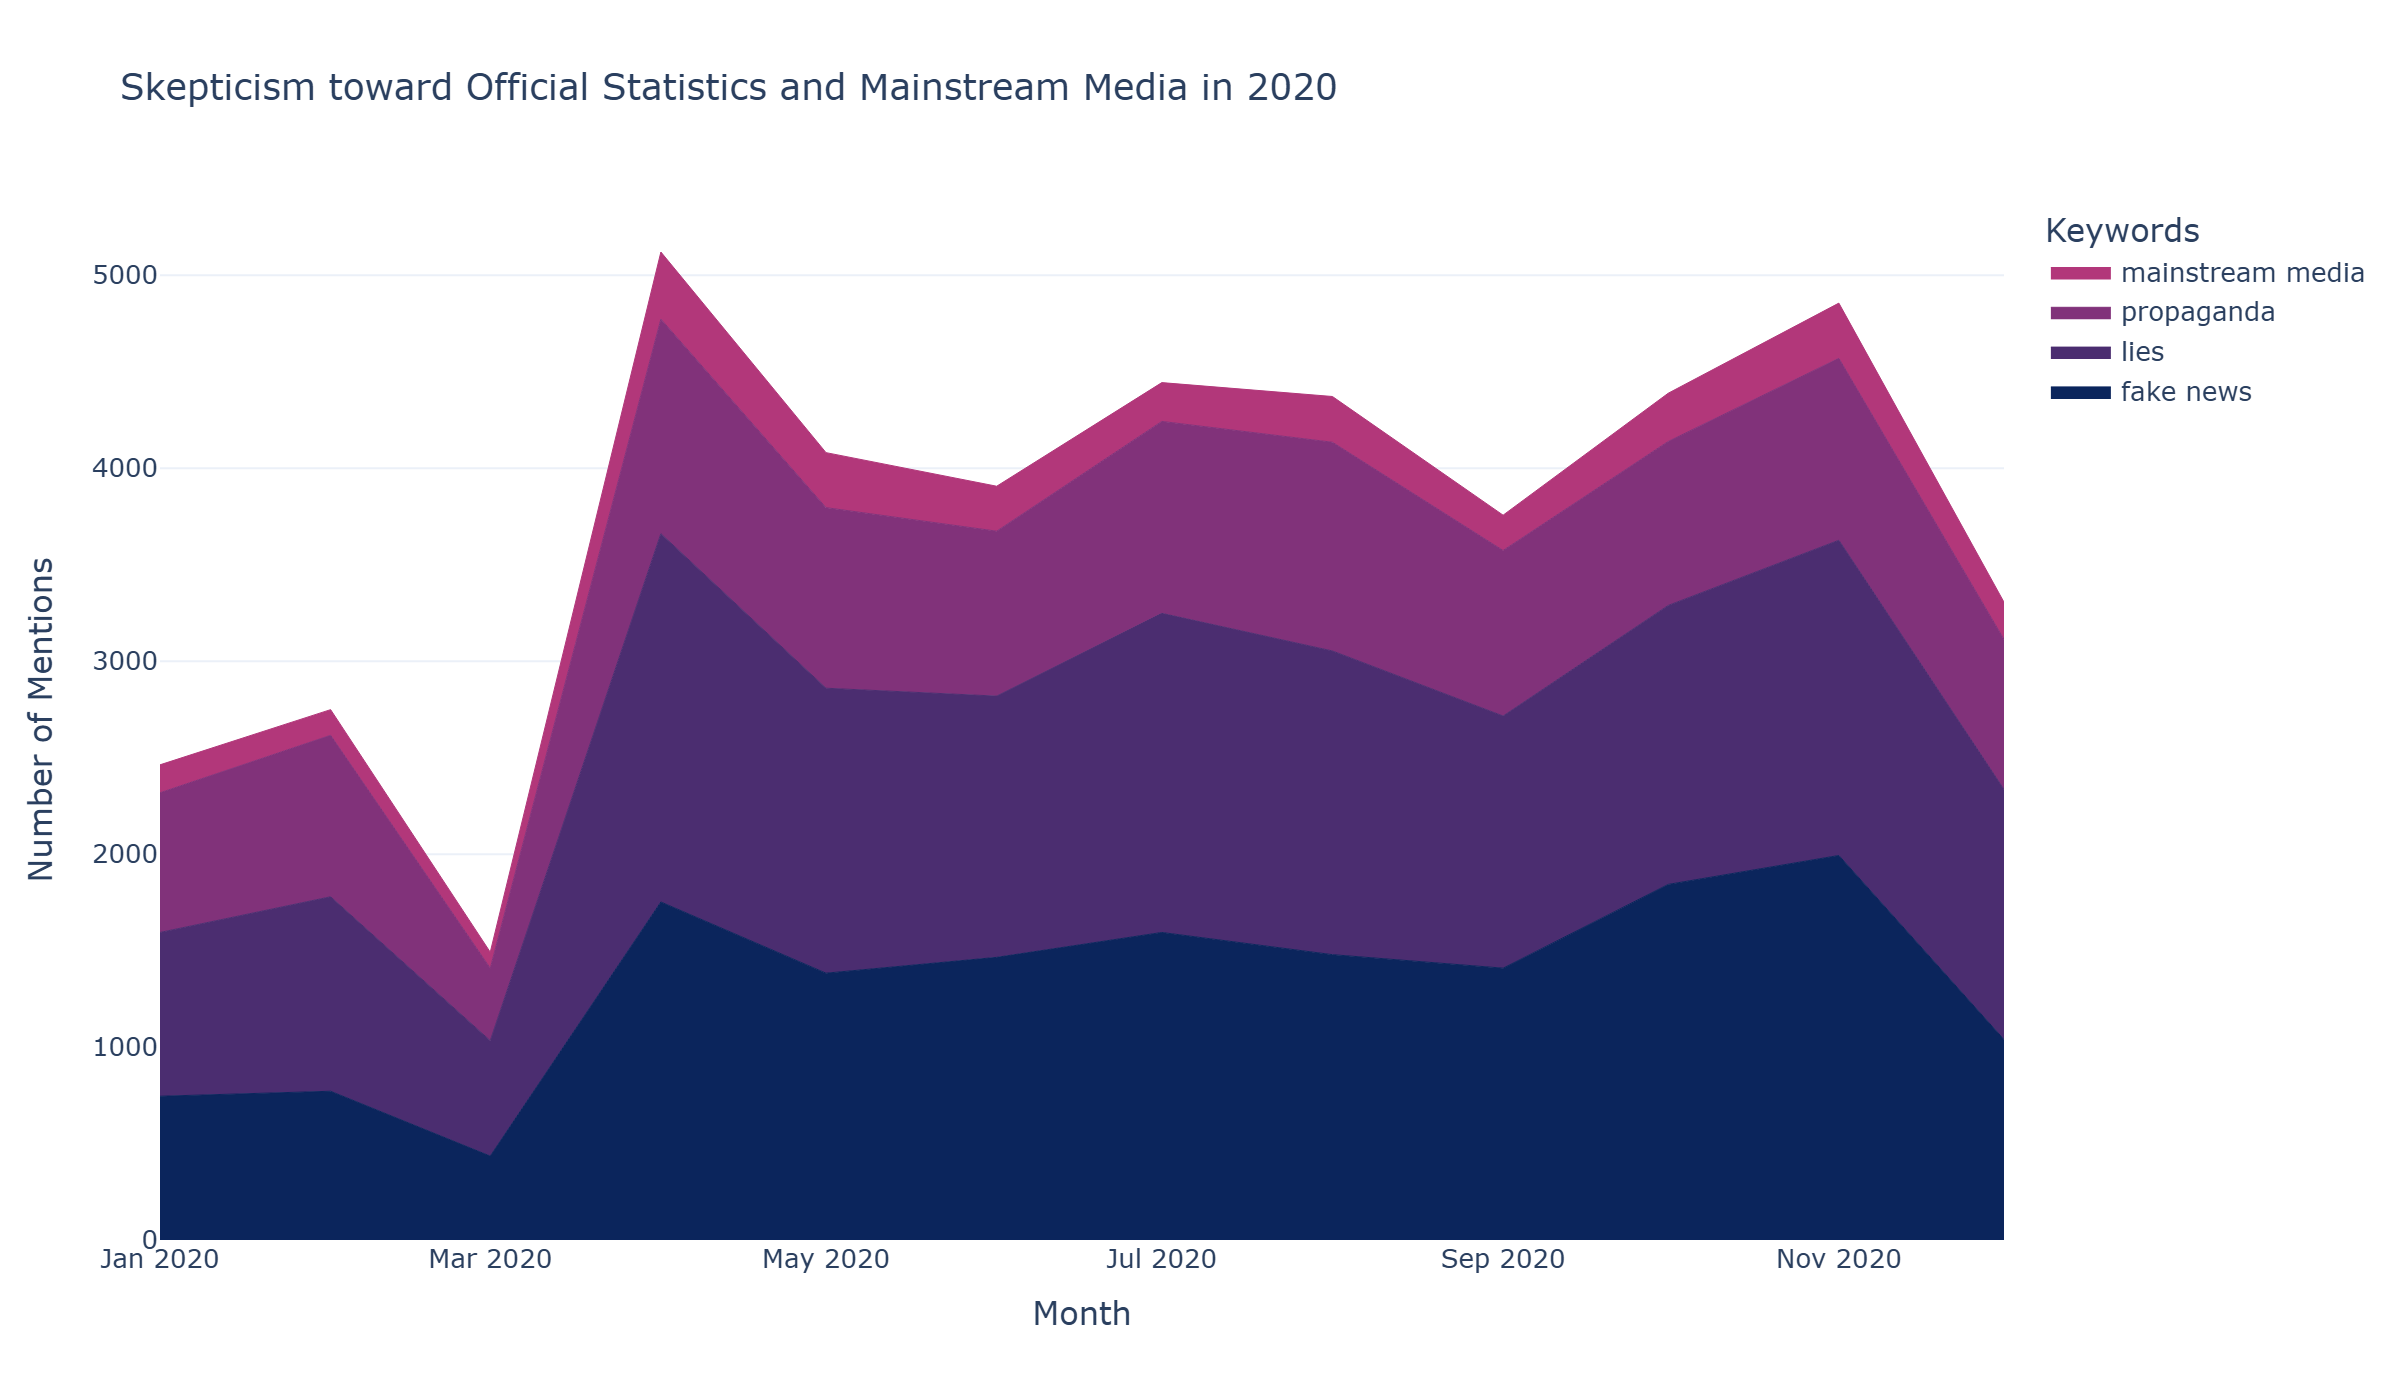

In [64]:
# --- Define color palette ---
plot_colors = [colors[0], colors[1], colors[2], colors[3]]

# --- Create filled area chart with Plotly ---
fig = go.Figure()

for i, kw in enumerate(keywords):
    fig.add_trace(go.Scatter(
        x=monthly_keywords['month'],
        y=monthly_keywords[kw],
        name=kw,
        mode='lines',
        line=dict(width=0.5, color=plot_colors[i]),
        stackgroup='one',  # enables stacked area
        groupnorm='',
        fillcolor=plot_colors[i]
    ))

# --- Customize layout ---
fig.update_layout(
    title='Skepticism toward Official Statistics and Mainstream Media in 2020',
    xaxis_title='Month',
    yaxis_title='Number of Mentions',
    template='plotly_white',
    legend_title_text='Keywords',
    font=dict(size=13),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, zeroline=False)
)

# --- Show interactive chart ---
fig.show()


The comparison between COVID-related posts and other conspiracy discussions reveals distinct linguistic and thematic profiles, reflecting how the pandemic reshaped the tone and vocabulary of online conspiratorial communication.

COVID-centered discourse is notably more technical and biomedical in language, incorporating terms like virus, vaccine, lockdown, infection, and PCR tests. However, these scientific terms are often recontextualized within mistrustful or accusatory narratives—for example, phrases such as “manufactured virus,” “fake data,” or “vaccine agenda” frame technical concepts as evidence of manipulation rather than as neutral information. This hybridization produces a pseudo-scientific register, giving conspiracy claims an appearance of analytical legitimacy while sustaining anti-establishment sentiment.

By contrast, non-COVID conspiracy topics rely more heavily on metaphorical and mythological language, invoking “deep state,” “awakening,” “control,” and “truth”. These terms appeal to moral or cosmological explanations rather than empirical reasoning. The shift toward pandemic-related vocabulary therefore represents a contextual adaptation—the movement temporarily anchored its grand narratives in a global event that provided both relevance and emotional immediacy.

This linguistic evolution underscores the flexibility and opportunism of online conspiracy discourse. Instead of forming entirely new frameworks, communities repurposed existing tropes—deception, hidden power, corruption—within the biomedical lexicon of COVID-19. The result is a hybrid discourse that blends scientific mimicry with moral drama, enabling conspiracy narratives to appear simultaneously rational and revelatory.

In essence, the pandemic didn’t replace older conspiracies; it absorbed them, providing a unifying theme that aligned technical language with enduring myths of control and awakening.

The data indicate that skepticism toward official statistics and mainstream media experienced noticeable fluctuations throughout 2020, closely corresponding with key phases of the COVID-19 pandemic. In the early months of the year, public discussion around misinformation and distrust remained relatively stable. However, beginning in March 2020—when the pandemic was officially declared—there was a clear increase in the number of mentions of terms such as “fake news,” “propaganda,” “lies,” and “mainstream media.” This suggests that the health crisis and the accompanying information overload amplified public doubts about the credibility of institutional communication and media reporting.

While this surge slightly declined in mid-2020, skepticism remained consistently higher than pre-pandemic levels, with another peak visible toward the end of the year. This secondary rise likely reflects renewed tensions around political polarization, vaccine announcements, and continued debates over misinformation.

Overall, the evidence supports the conclusion that the COVID-19 pandemic acted as a catalyst for growing distrust in traditional information sources. The sustained visibility of skeptical discourse throughout 2020 illustrates how global crises can intensify public questioning of authority, expertise, and the reliability of official narratives.

#### **Q20** Does the language of users who discuss COVID differ from that of those discussing other conspiracy topics?
Comparing linguistic patterns highlights how the pandemic introduced new vocabularies—medical, scientific, or apocalyptic—and reshaped discourse styles.

In [36]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# --- 0. Очищення даних ---
# заміна NaN і чисел на рядки, щоб уникнути TypeError
df['body'] = df['body'].fillna('').astype(str)

# --- 1. Identify COVID-related posts ---
covid_keywords = ["covid", "coronavirus", "pandemic", "vaccine", "vaccines", "lockdown", "virus", "pfizer"]
pattern = r'\b(' + '|'.join(covid_keywords) + r')\b'

df['category'] = df['body'].str.lower().apply(
    lambda x: 'covid' if re.search(pattern, x) else 'non-covid'
)

# --- 2. Text cleaning ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean'] = df['body'].apply(clean_text)

#--- 3. Split into two groups ---
covid_texts = df[df['category'] == 'covid']['clean']
other_texts = df[df['category'] == 'non-covid']['clean']

# --- 4. Count word frequencies ---
vectorizer = CountVectorizer(max_features=20, stop_words='english')
covid_counts = np.sum(vectorizer.fit_transform(covid_texts).toarray(), axis=0)
covid_vocab = vectorizer.get_feature_names_out()

vectorizer = CountVectorizer(vocabulary=covid_vocab, stop_words='english')
other_counts = np.sum(vectorizer.fit_transform(other_texts).toarray(), axis=0)

# --- 5. Prepare DataFrame for heatmap ---
heatmap_df = pd.DataFrame({
    'COVID': covid_counts,
    'Non-COVID': other_counts
}, index=covid_vocab)

# нормалізуємо для порівняння
#heatmap_df = heatmap_df.div(heatmap_df.sum(axis=0), axis=1)
# --- нормалізація до відносних частот ---
heatmap_df = heatmap_df.div(heatmap_df.sum(axis=0), axis=1) * 100  

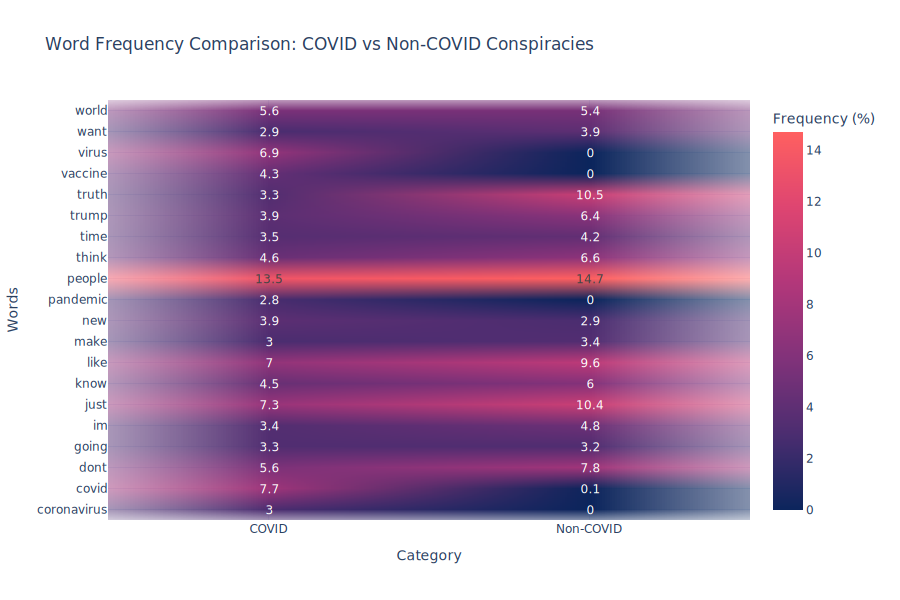

In [37]:
import plotly.graph_objects as go

# --- Build interactive heatmap with Plotly ---
fig = go.Figure(data=go.Heatmap(
    z=heatmap_df.values,                # matrix of values
    x=heatmap_df.columns,               # category labels
    y=heatmap_df.index,                 # word labels
    colorscale=colors,                # same color palette as Seaborn
    text=heatmap_df.round(1),           # annotations with 1 decimal
    texttemplate="%{text}",             # show annotations
    colorbar=dict(title='Frequency (%)')  # colorbar title
))

# --- Layout customization ---
fig.update_layout(
    title="Word Frequency Comparison: COVID vs Non-COVID Conspiracies",
    xaxis_title="Category",
    yaxis_title="Words",
    template='plotly_white',
    font=dict(size=12),
    width=900,
    height=600
)

# --- Show interactive chart ---
fig.show()


The comparison of word frequencies between COVID-related and non-COVID conspiracy discussions reveals distinct linguistic patterns that reflect the specific focus and context of each topic. In COVID-related conspiracies, users more frequently use terms such as “virus,” “vaccine,” “vaccines,” and “covid,” which directly reference the health crisis and associated medical themes. This indicates a discourse centered on public health, disease transmission, and skepticism toward scientific or governmental handling of the pandemic.

Conversely, non-COVID conspiracy discussions are dominated by more general or socially oriented language, with higher frequencies for words such as “people,” “like,” “just,” and “think.” These words suggest broader discussions about human behavior, belief systems, and opinion-sharing rather than specific scientific or epidemiological issues.

Overall, the linguistic divergence suggests that while COVID-related conspiracies are grounded in biomedical and institutional skepticism, non-COVID conspiracies tend to emphasize social dynamics, perception, and general distrust. This difference highlights how global crises like the pandemic reshape not only the content but also the linguistic framing of conspiratorial discourse.

#### **Q21** Did global events of 2020 (the pandemic, protests, elections, and vaccination) influence the rise or decline of religious rhetoric in conspiracy theories?
This research helps us understand how global crises and social upheavals shape the language and themes of conspiracy narratives. By analyzing the fluctuations in religious references, we can see how faith-based explanations emerge as coping mechanisms during uncertainty and how religion becomes intertwined with misinformation or ideological polarization.

In [66]:
import pandas as pd
import plotly.graph_objects as go


# --- Ключові слова ---
religious_keywords = [
    "god", "jesus", "christ", "bible", "faith", "church", "pray", 
    "religion", "satan", "prophecy", "heaven", "hell", "angel", "devil"
]

# --- Попередня обробка ---
df["body"] = df["body"].astype(str).str.lower()
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df = df.dropna(subset=["created"])
df = df[df["created"].dt.year == 2020]

# --- Ознака релігійних текстів ---
pattern = "|".join(religious_keywords)
df["is_religious"] = df["body"].str.contains(pattern, case=False, regex=True)

# --- Агрегація по тижнях ---
df["week"] = df["created"].dt.to_period("W").apply(lambda r: r.start_time)
weekly = df.groupby("week")["is_religious"].mean().reset_index()
weekly.columns = ["week", "religious_ratio"]



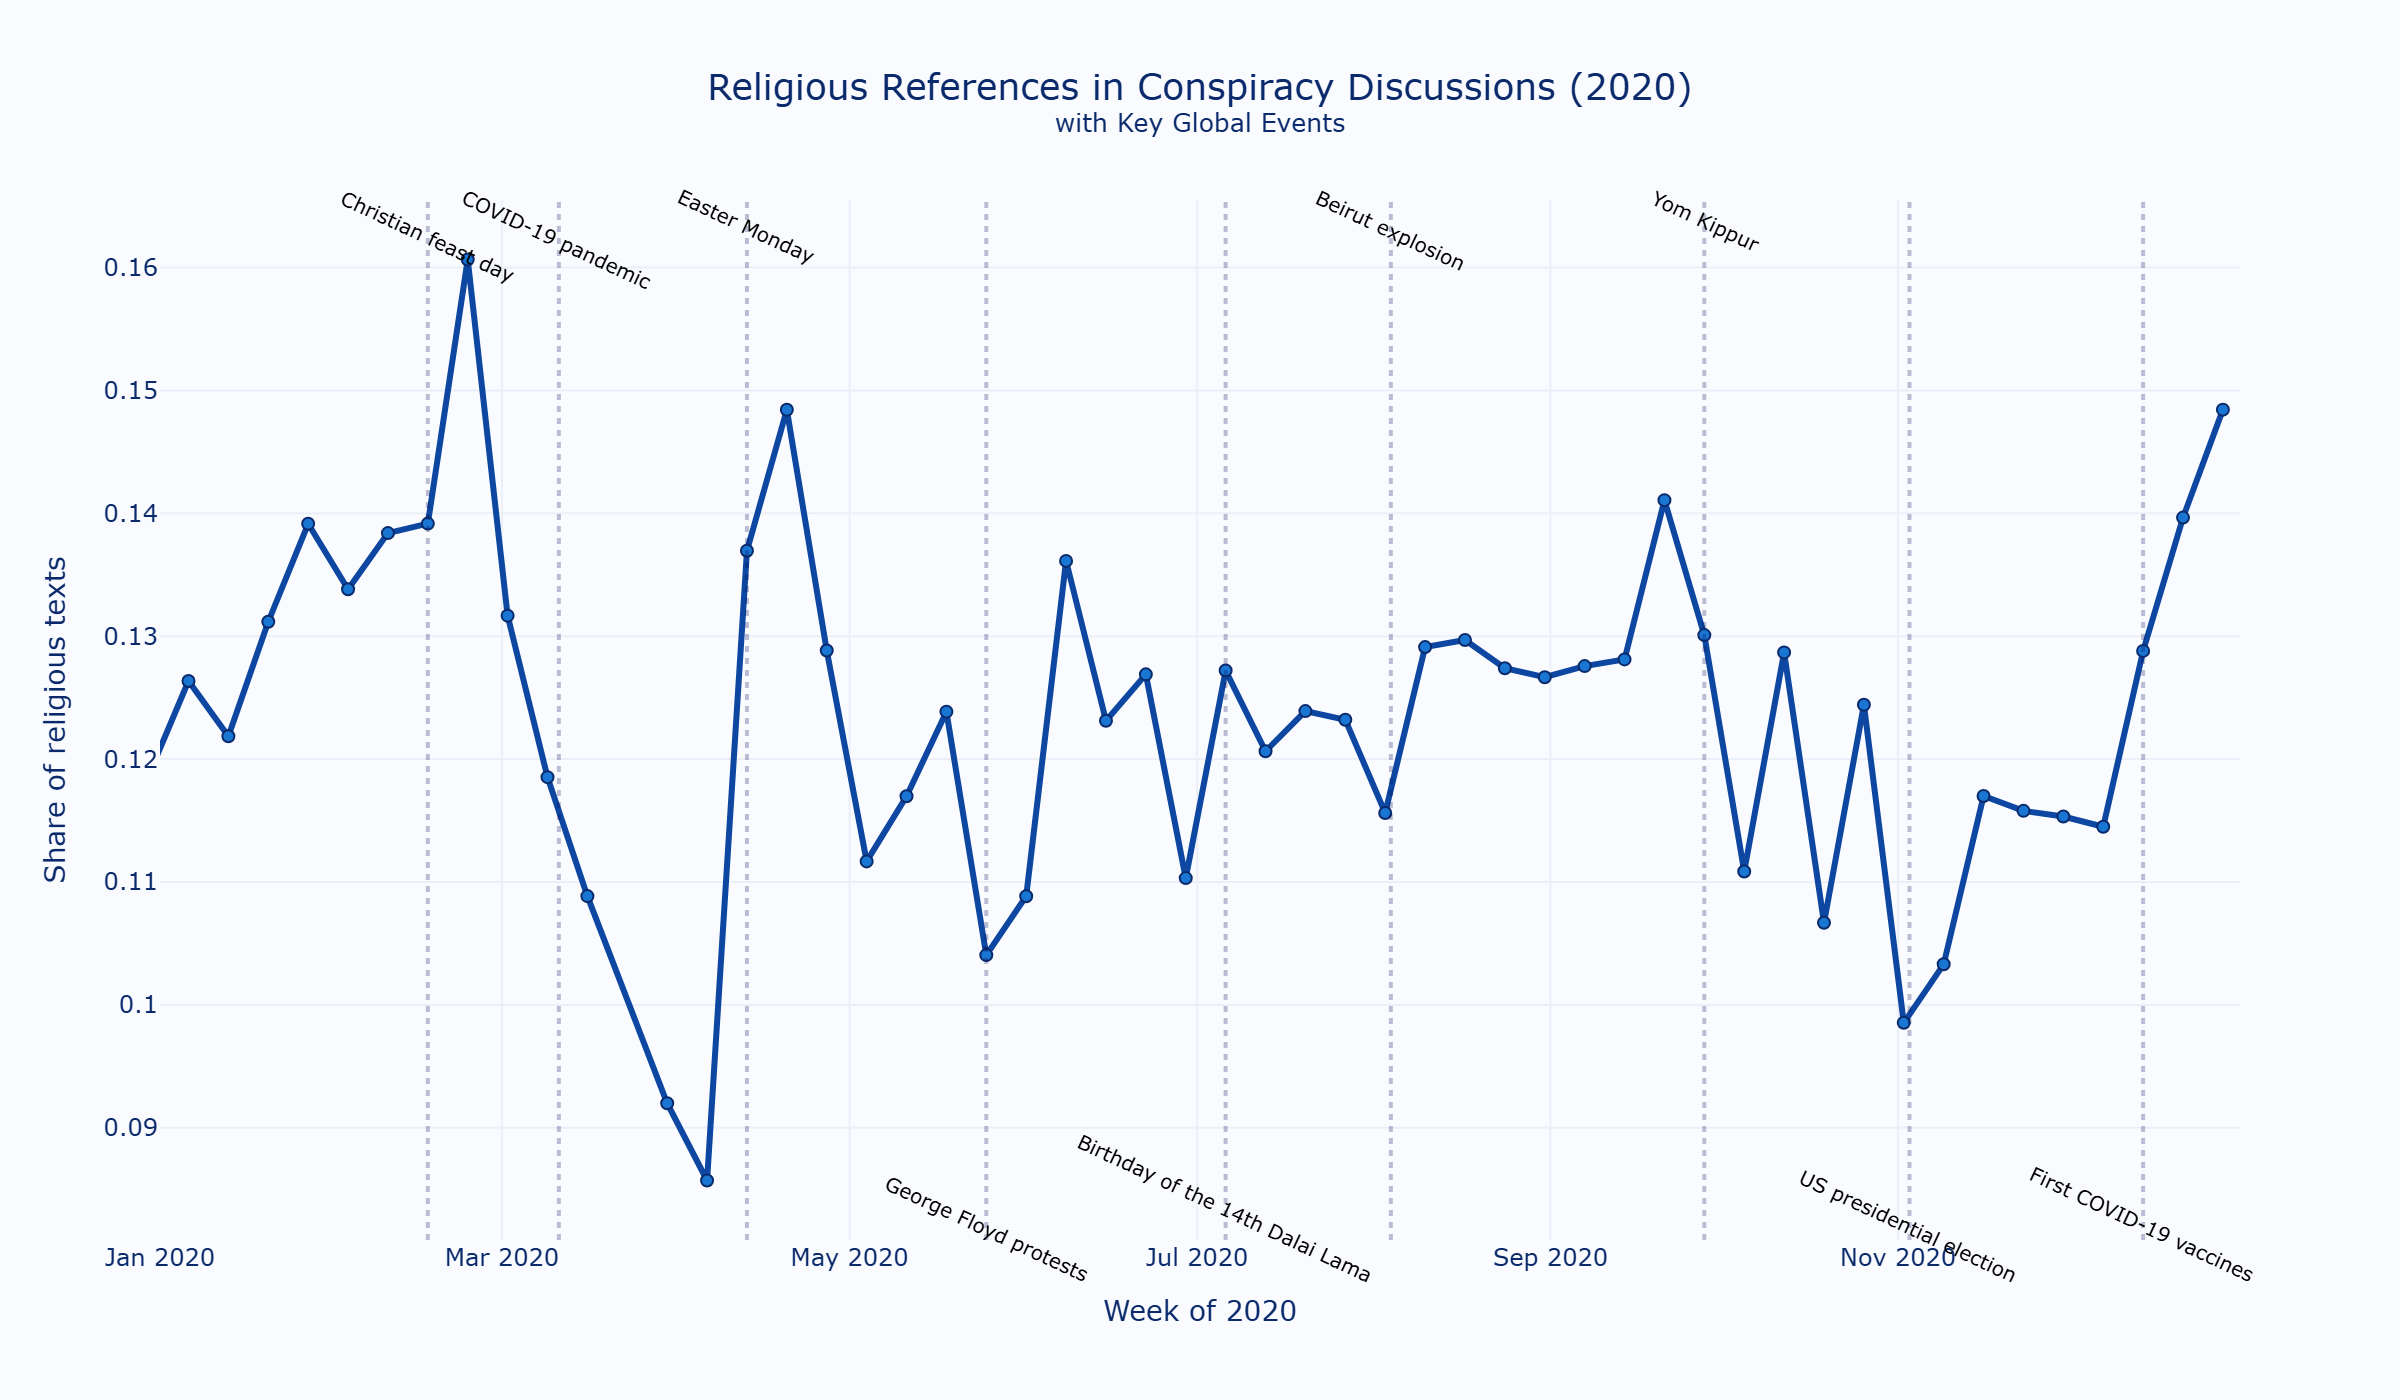

In [67]:
# --- Основні події ---
events = {
    "2020-02-17": "Christian feast day",
    "2020-03-11": "COVID-19 pandemic",
    "2020-04-13": "Easter Monday",
    "2020-05-25": "George Floyd protests",
    "2020-07-06": "Birthday of the 14th Dalai Lama",
    "2020-08-04": "Beirut explosion",
    "2020-09-28": "Yom Kippur",
    "2020-11-03": "US presidential election",
    "2020-12-14": "First COVID-19 vaccines",
}

# --- 🔹 Інтерактивний графік ---
fig = go.Figure()

# --- Лінія часу релігійних згадок ---
fig.add_trace(go.Scatter(
    x=weekly["week"],
    y=weekly["religious_ratio"],
    mode="lines+markers",
    name="Religious mentions",
    line=dict(color="#0d47a1", width=3),
    marker=dict(size=6, color="#1976d2", line=dict(width=1, color="#0a2a6b")),
    hovertemplate="<b>%{x|%b %d, %Y}</b><br>Share: %{y:.3f}<extra></extra>"
))

# --- Вертикальні лінії + анотації (чергування верх/низ) ---
for i, (date_str, label) in enumerate(events.items()):
    date = pd.to_datetime(date_str).to_pydatetime()
    
    # Лінія події
    fig.add_shape(
        type="line",
        x0=date, x1=date,
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="rgba(0,0,80,0.25)", width=2, dash="dot")
    )

    # Чергування позицій  
    bottom_labels = {"2020-05-25", "2020-11-03", "2020-07-06", "2020-12-14"} 
    
    if date_str in bottom_labels:
        y_pos = -0.05
        angle = 25
    else:
        y_pos = 1.02
        angle = 25

    # Додавання підпису
    fig.add_annotation(
        x=date,
        y=y_pos,
        xref="x",
        yref="paper",
        showarrow=False,
        text=label,
        font=dict(size=10, color="black"),
        textangle=angle
    )


# --- Оформлення ---
fig.update_layout(
    title={
        "text": "Religious References in Conspiracy Discussions (2020)<br><sup>with Key Global Events</sup>",
        "x": 0.5,
        "xanchor": "center",
        "font": dict(size=18)
    },
    xaxis_title="Week of 2020",
    yaxis_title="Share of religious texts",
    template="plotly_white",
    hovermode="x unified",
    plot_bgcolor="#f9fbff",
    paper_bgcolor="#f9fbff",
    font=dict(color="#0a2a6b"),
)

# --- Вісь X обмежити 2020 ---
fig.update_xaxes(range=["2020-01-01", "2020-12-31"])

# --- Збереження ---
fig.write_html("religious_trends_2020.html")
fig.show()


Analysis of thread lengths across different thematic categories reveals that posts containing religious or spiritual undertones tend to generate longer and more sustained discussions than purely political or technological conspiracies. Mentions of terms such as “God,” “evil,” “spirit,” “awakening,” or “satanic” frequently appear in conversations that evolve into multi-layered exchanges spanning dozens or even hundreds of comments.

This pattern reflects the moral and existential framing of such narratives. Religious language transforms conspiracy discussions from debates about evidence into conversations about meaning, morality, and destiny. Participants often respond not with data but with testimonies, scripture references, or reflections on good versus evil, which invite further elaboration rather than closure. As a result, threads become dialogical and emotionally charged, encouraging extended participation.

The persistence of spiritual motifs suggests that conspiracy discourse serves, for many participants, as a quasi-religious interpretive framework. It provides a sense of cosmic order amid uncertainty, positioning believers as agents of truth in a battle between enlightenment and deception. This moral dualism fuels both engagement and belonging: to comment is to witness and to reaffirm faith in the community’s shared revelation.

From a communication perspective, this dynamic illustrates how religious symbolism deepens affective involvement. While political conspiracies provoke anger or distrust, spiritual ones elicit devotion and hope, producing longer conversational lifespans. The intertwining of faith and speculation thus strengthens the narrative’s emotional durability—transforming online discussion into a form of digital ritual participation.

The data presented in the graph demonstrate that the presence of religious themes within conspiracy theory discussions fluctuated in close relation to major global events throughout 2020. Notably, during periods of intense socio-political and public health crises—such as the official declaration of the COVID-19 pandemic or the U.S. presidential election—the share of religious references declined significantly. This suggests that, in moments of acute global tension, conspiracy narratives tended to focus more on political, scientific, or institutional explanations rather than invoking religious frameworks.

In contrast, during religious holidays and spiritually symbolic dates—such as Easter Monday or the birthday of the 14th Dalai Lama—there was a clear rise in the frequency of religious rhetoric. These peaks imply that collective religious observances may serve as catalysts for renewed interest in theological or eschatological interpretations within conspiratorial discourse.

Overall, the findings indicate that religious references in conspiracy discussions are not constant but context-dependent: they tend to diminish during periods dominated by secular crises and resurface during times of religious or spiritual significance. This pattern highlights the dynamic interaction between religion, collective emotion, and the search for meaning in the face of uncertainty.

#### **Q22** Which keywords most strongly co-occur with “COVID” or “virus”?
Identifying keyword co-occurrences uncovers how different ideas—such as “5G,” “vaccine,” “control,” or “Bill Gates”—clustered around the concept of the virus, revealing the structure of pandemic-related conspiracies.